CSL2050: PRML

**MINOR PROJECT: PROJECT 5**


**Unsupervised Learning on Country Data**


by


**Narkhede Kartik Sanjay (B21EE041)**


**Neel Aniruddha Barve (B21EE042)**

#Abstract

The aim of this report is to categorize the countries using some socio-economic and health factors that determine the overall development of the country, to finally suggest the countries which the CEO needs to focus on the most. HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities. HELP International has been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. So, the CEO has to make a decision to choose the countries that are in the direst need of aid. In order to achieve this, we use multiple methods for clustering the data into the categories such as ‘Help needed’, ‘Might need help’ and ‘No help needed’.

#Importing required libraries

In [ ]:
import os
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import statistics
from sklearn.cluster import Birch
import time
from collections import Counter
from sklearn.cluster import DBSCAN
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from random import sample
import plotly.io as pio
!pip install -U kaleido
import kaleido
pio.renderers

from sklearn import metrics

import scipy.cluster.hierarchy as hcluster
from sklearn.cluster import AgglomerativeClustering

!pip install kneed
!pip install tensorflow

import warnings
warnings.filterwarnings("ignore")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 11.2 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#Original Dataset

In [ ]:
# df=pd.read_csv('Country-data.csv')
# df

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
df=pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Country_data _Copy.csv',header=None)
df.columns=['country','child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp']

In [ ]:
df

country  child_mort  exports  health  imports  income  \
0            Afghanistan        90.2     10.0    7.58     44.9    1610   
1                Albania        16.6     28.0    6.55     48.6    9930   
2                Algeria        27.3     38.4    4.17     31.4   12900   
3                 Angola       119.0     62.3    2.85     42.9    5900   
4    Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   
..                   ...         ...      ...     ...      ...     ...   
162              Vanuatu        29.2     46.6    5.25     52.7    2950   
163            Venezuela        17.1     28.5    4.91     17.6   16500   
164              Vietnam        23.3     72.0    6.84     80.2    4490   
165                Yemen        56.3     30.0    5.18     34.4    4480   
166               Zambia        83.1     37.0    5.89     30.9    3280   

     inflation  life_expec  total_fer   gdpp  
0         9.44        56.2       5.82    553  
1         4.49        76.3       1.65   4090  
2        16.10        76.5       2.89   4460  
3        22.40        60.1       6.16   3530  
4         1.44        76.8       2.13  12200  
..         ...         ...        ...    ...  
162       2.62        63.0       3.50   2970  
163      45.90        75.4       2.47  13500  
164      12.10        73.1       1.95   1310  
165      23.60        67.5       4.67   1310  
166      14.00        52.0       5.40   1460  

[167 rows x 10 columns]

#Original Dataset preprocessing ,visualization and analysis

In [ ]:
df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

Using this , we checked whether there is any missing value or not

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


Using this, we checked datatype of each parameter/feature .Here there is no string datatype , so no need of label encoding

In [ ]:
df.describe()

child_mort     exports      health     imports         income  \
count  167.000000  167.000000  167.000000  167.000000     167.000000   
mean    38.270060   41.108976    6.815689   46.890215   17144.688623   
std     40.328931   27.412010    2.746837   24.209589   19278.067698   
min      2.600000    0.109000    1.810000    0.065900     609.000000   
25%      8.250000   23.800000    4.920000   30.200000    3355.000000   
50%     19.300000   35.000000    6.320000   43.300000    9960.000000   
75%     62.100000   51.350000    8.600000   58.750000   22800.000000   
max    208.000000  200.000000   17.900000  174.000000  125000.000000   

        inflation  life_expec   total_fer           gdpp  
count  167.000000  167.000000  167.000000     167.000000  
mean     7.781832   70.555689    2.947964   12964.155689  
std     10.570704    8.893172    1.513848   18328.704809  
min     -4.210000   32.100000    1.150000     231.000000  
25%      1.810000   65.300000    1.795000    1330.000000  
50%      5.390000   73.100000    2.410000    4660.000000  
75%     10.750000   76.800000    3.880000   14050.000000  
max    104.000000   82.800000    7.490000  105000.000000

Using this , we got idea about mean values of each parameter corresponding to specific country

In [ ]:
#number of unique countries
df['country'].nunique()

167

Using this, we got unique count of number of countries

In [ ]:
#drop country column
data=df.drop(['country'],axis=1)
data.head()

child_mort  exports  health  imports  income  inflation  life_expec  \
0        90.2     10.0    7.58     44.9    1610       9.44        56.2   
1        16.6     28.0    6.55     48.6    9930       4.49        76.3   
2        27.3     38.4    4.17     31.4   12900      16.10        76.5   
3       119.0     62.3    2.85     42.9    5900      22.40        60.1   
4        10.3     45.5    6.03     58.9   19100       1.44        76.8   

   total_fer   gdpp  
0       5.82    553  
1       1.65   4090  
2       2.89   4460  
3       6.16   3530  
4       2.13  12200

We dropped column named "countries" as it is not useful for further analysis of data.We will get information about countries using index number of dataframe

Heatmap

<Axes: >

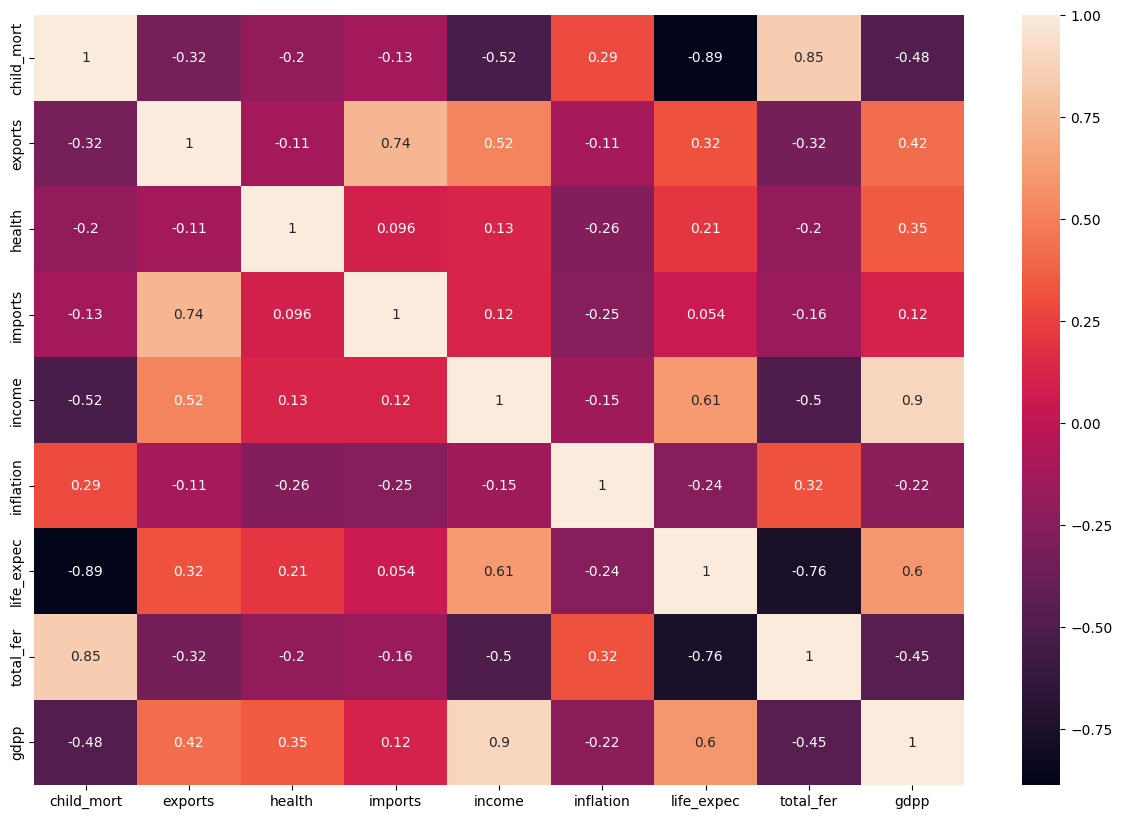

In [ ]:
# pearson
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(method='pearson', min_periods=1),annot=True)

Are there feature(s) that we could do without due to having high correlation with another feature?

After looking it , we can see that there is high positive correlation between some features and for some featurs , there is negative correlation

Positive Correlation shows high dependency between two features and vice versa

life_expect, due to high correlation with child mortality
total_fertility, due to high correlation with child mortality
income, due to high correlation with gdpp


Findings-->


1)High GDP => Low child mortality rate, High total fertility=> high child mortality


2)High child mortality => Low life expectancy


3)Low Life Expectation => High Total Fertility  


In [ ]:
import matplotlib.pyplot as plt
plt.close("all")

In [ ]:
columns=['country','child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp']

In [ ]:
print(df)

                 country  child_mort  exports  health  imports  income  \
0            Afghanistan        90.2     10.0    7.58     44.9    1610   
1                Albania        16.6     28.0    6.55     48.6    9930   
2                Algeria        27.3     38.4    4.17     31.4   12900   
3                 Angola       119.0     62.3    2.85     42.9    5900   
4    Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   
..                   ...         ...      ...     ...      ...     ...   
162              Vanuatu        29.2     46.6    5.25     52.7    2950   
163            Venezuela        17.1     28.5    4.91     17.6   16500   
164              Vietnam        23.3     72.0    6.84     80.2    4490   
165                Yemen        56.3     30.0    5.18     34.4    4480   
166               Zambia        83.1     37.0    5.89     30.9    3280   

     inflation  life_expec  total_fer   gdpp  
0         9.44        56.2       5.82    553  
1         4.49   

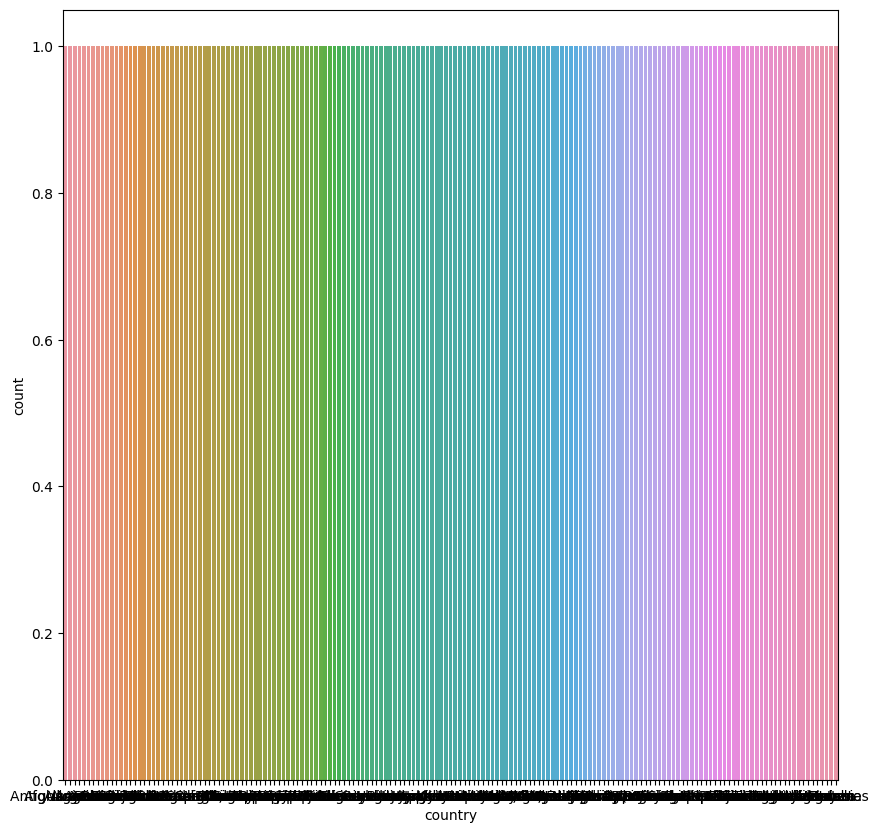

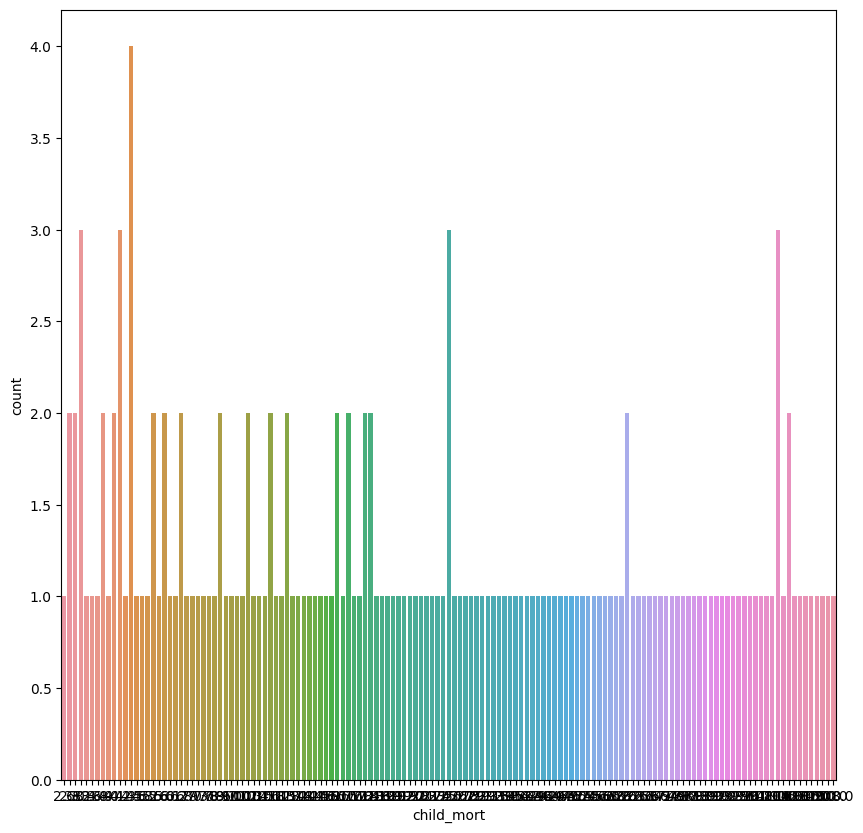

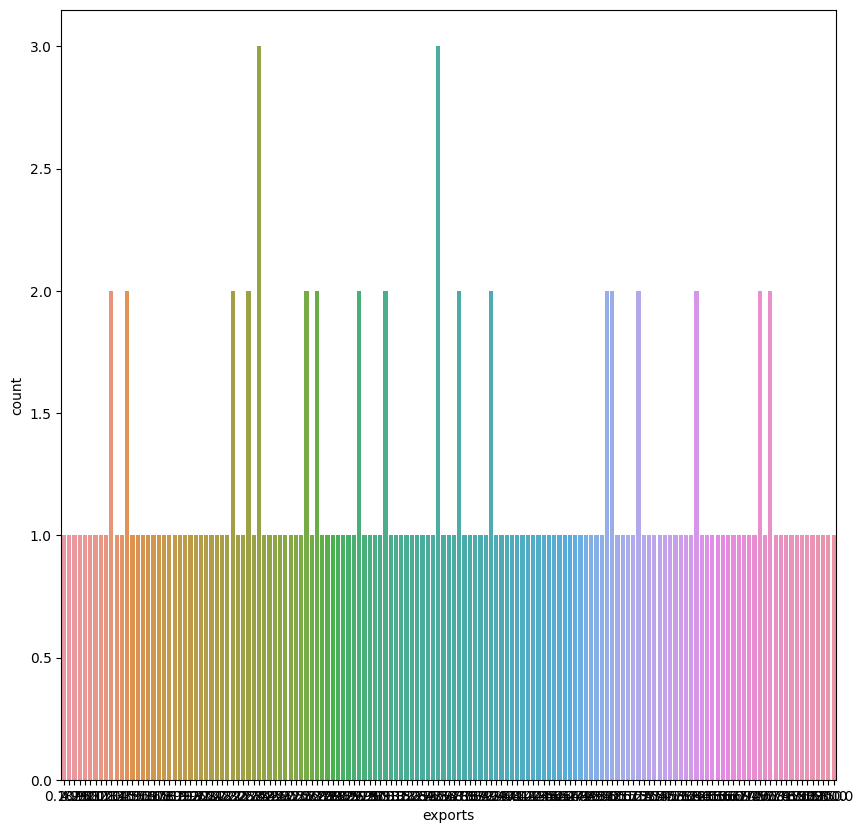

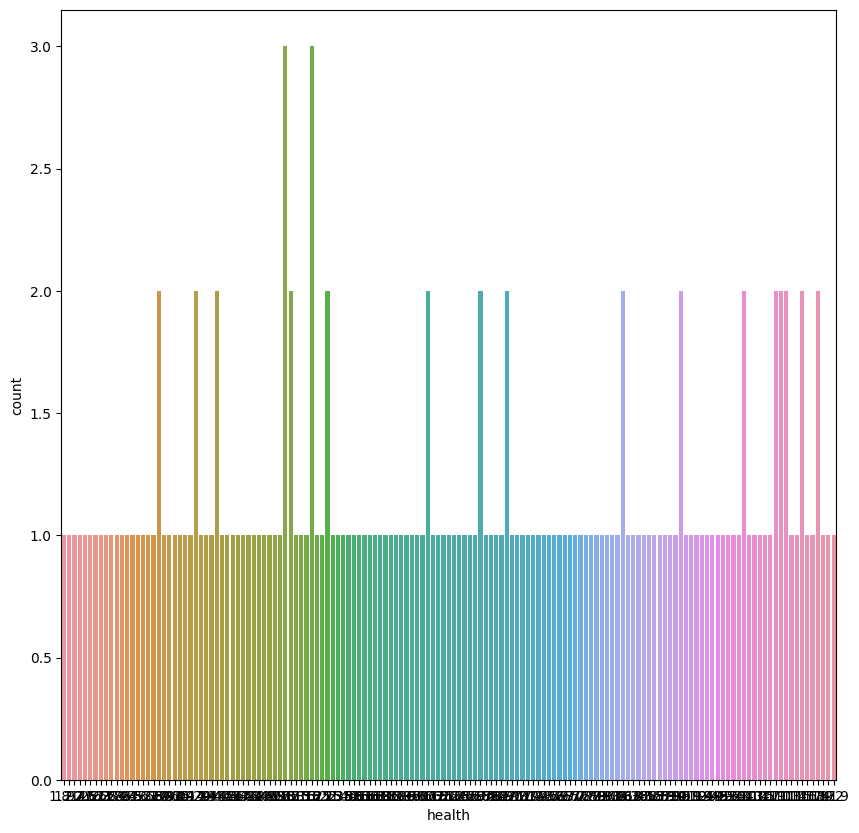

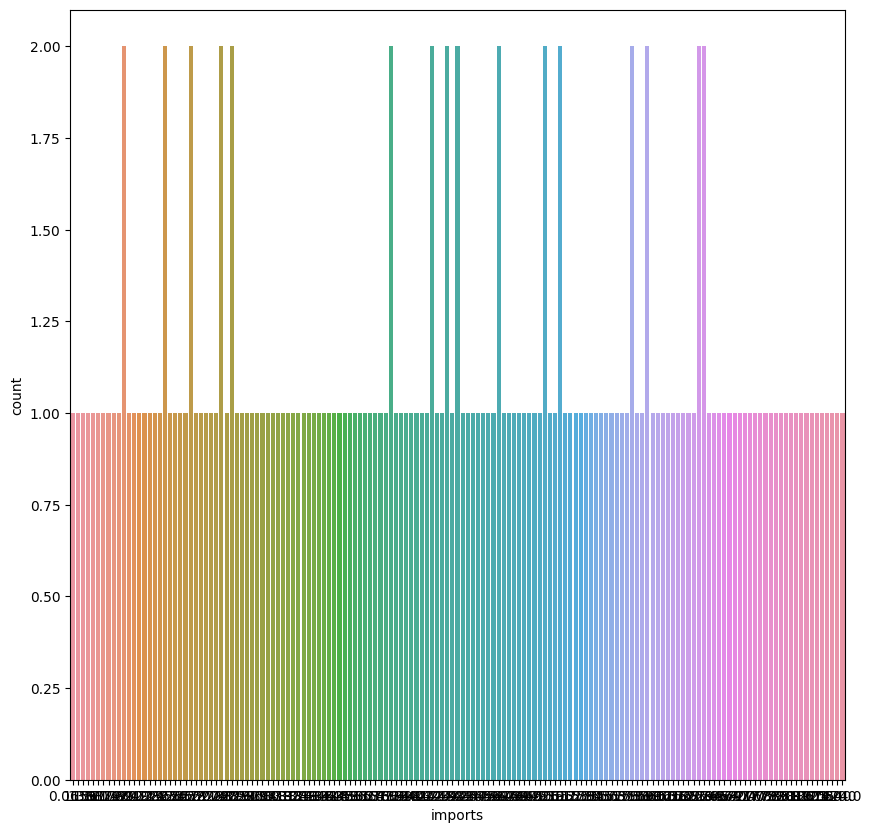

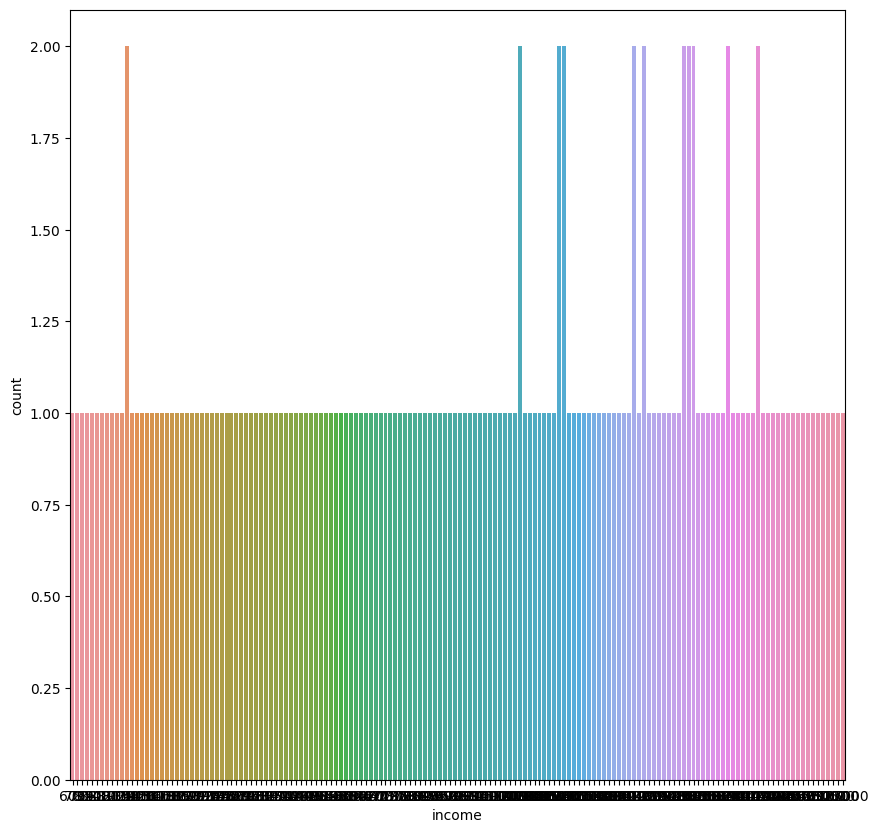

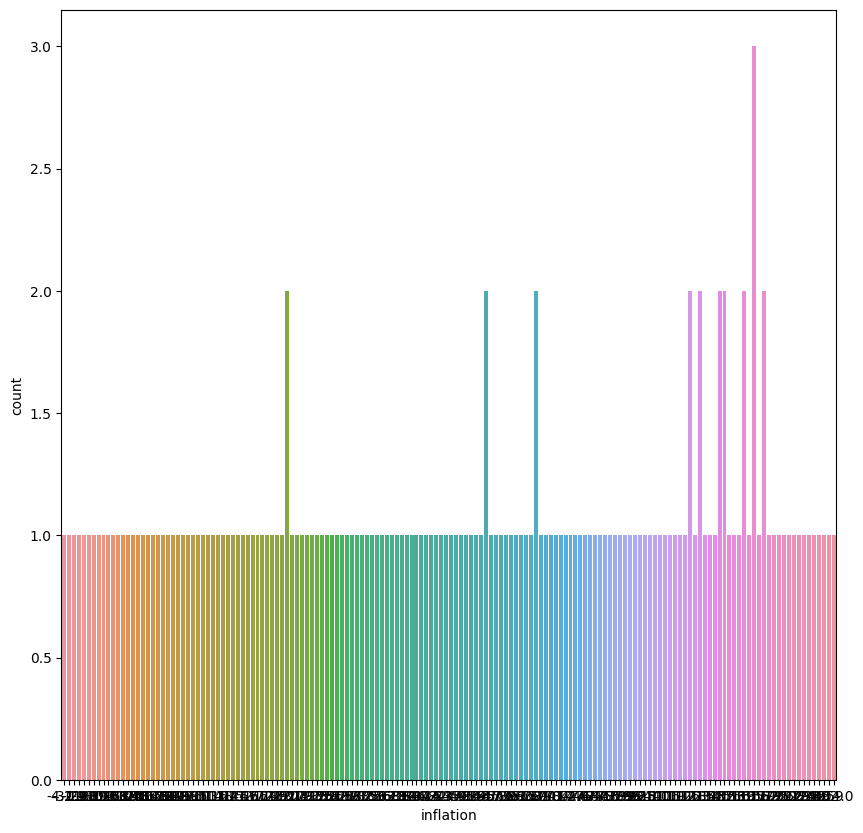

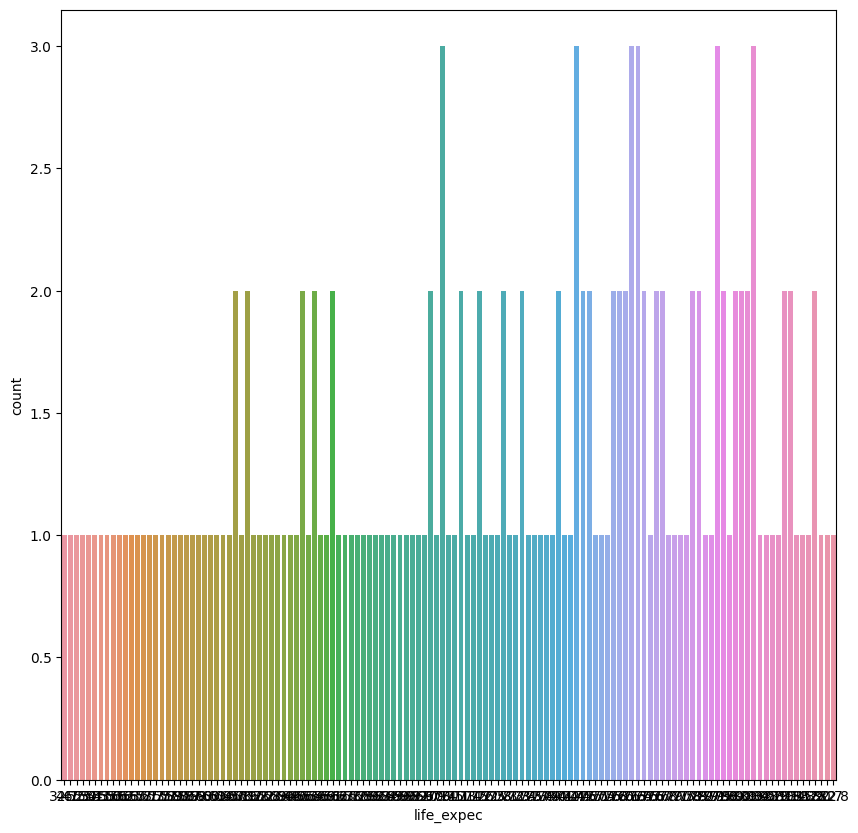

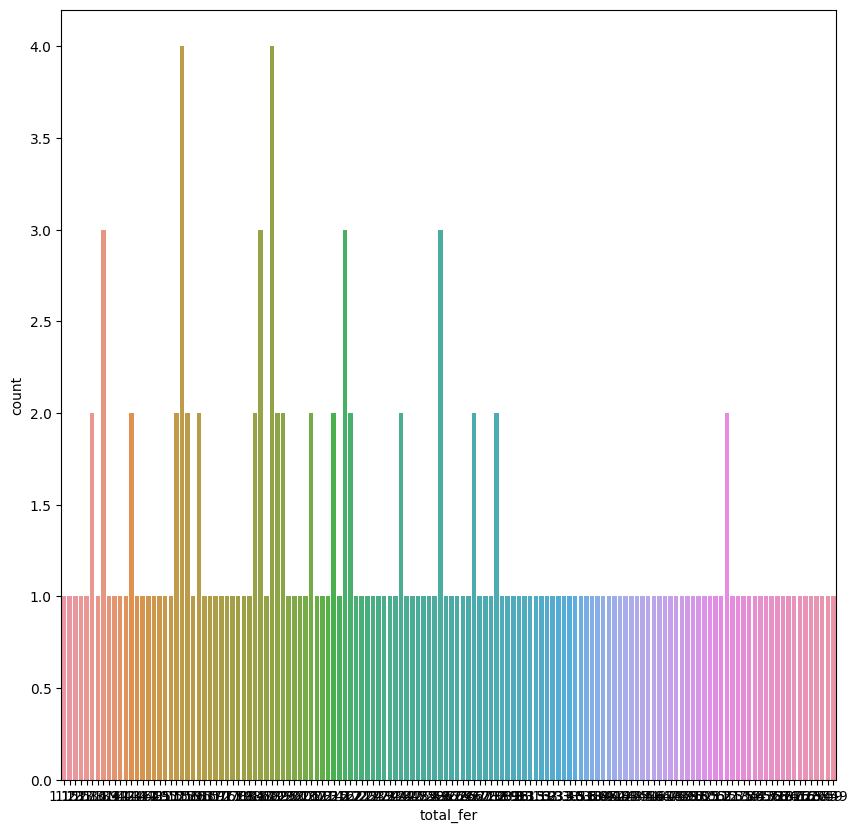

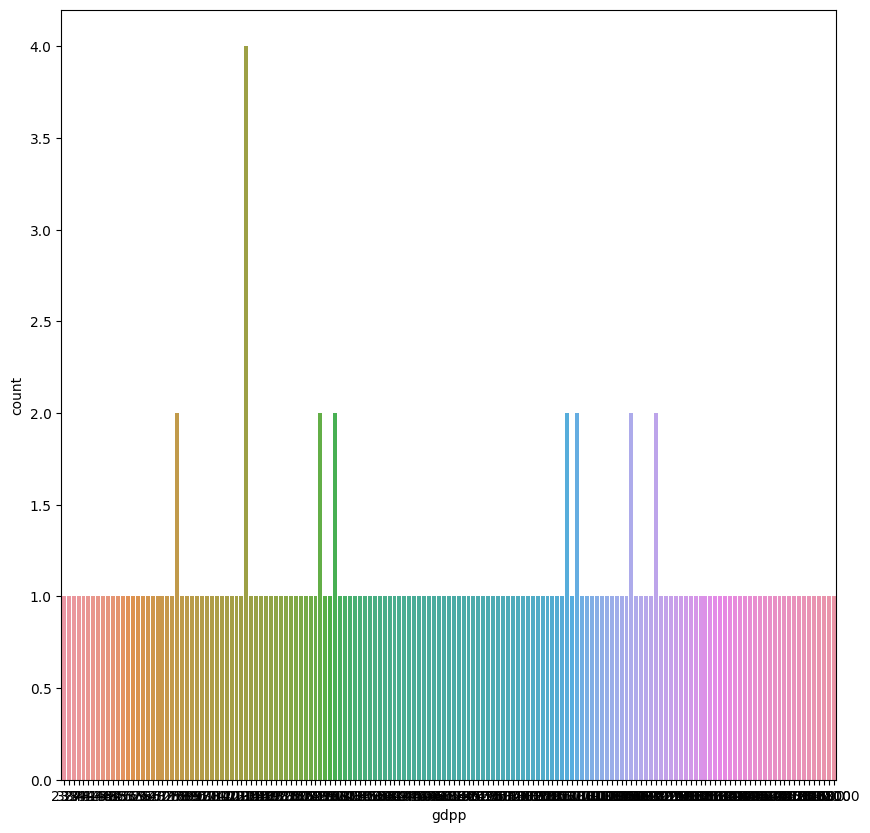

In [ ]:
# Set the figure size
for i in columns:
  fig, ax = plt.subplots(figsize=(10, 10))

# Create the countplot
  sns.countplot(data=df, x=i, ax=ax)


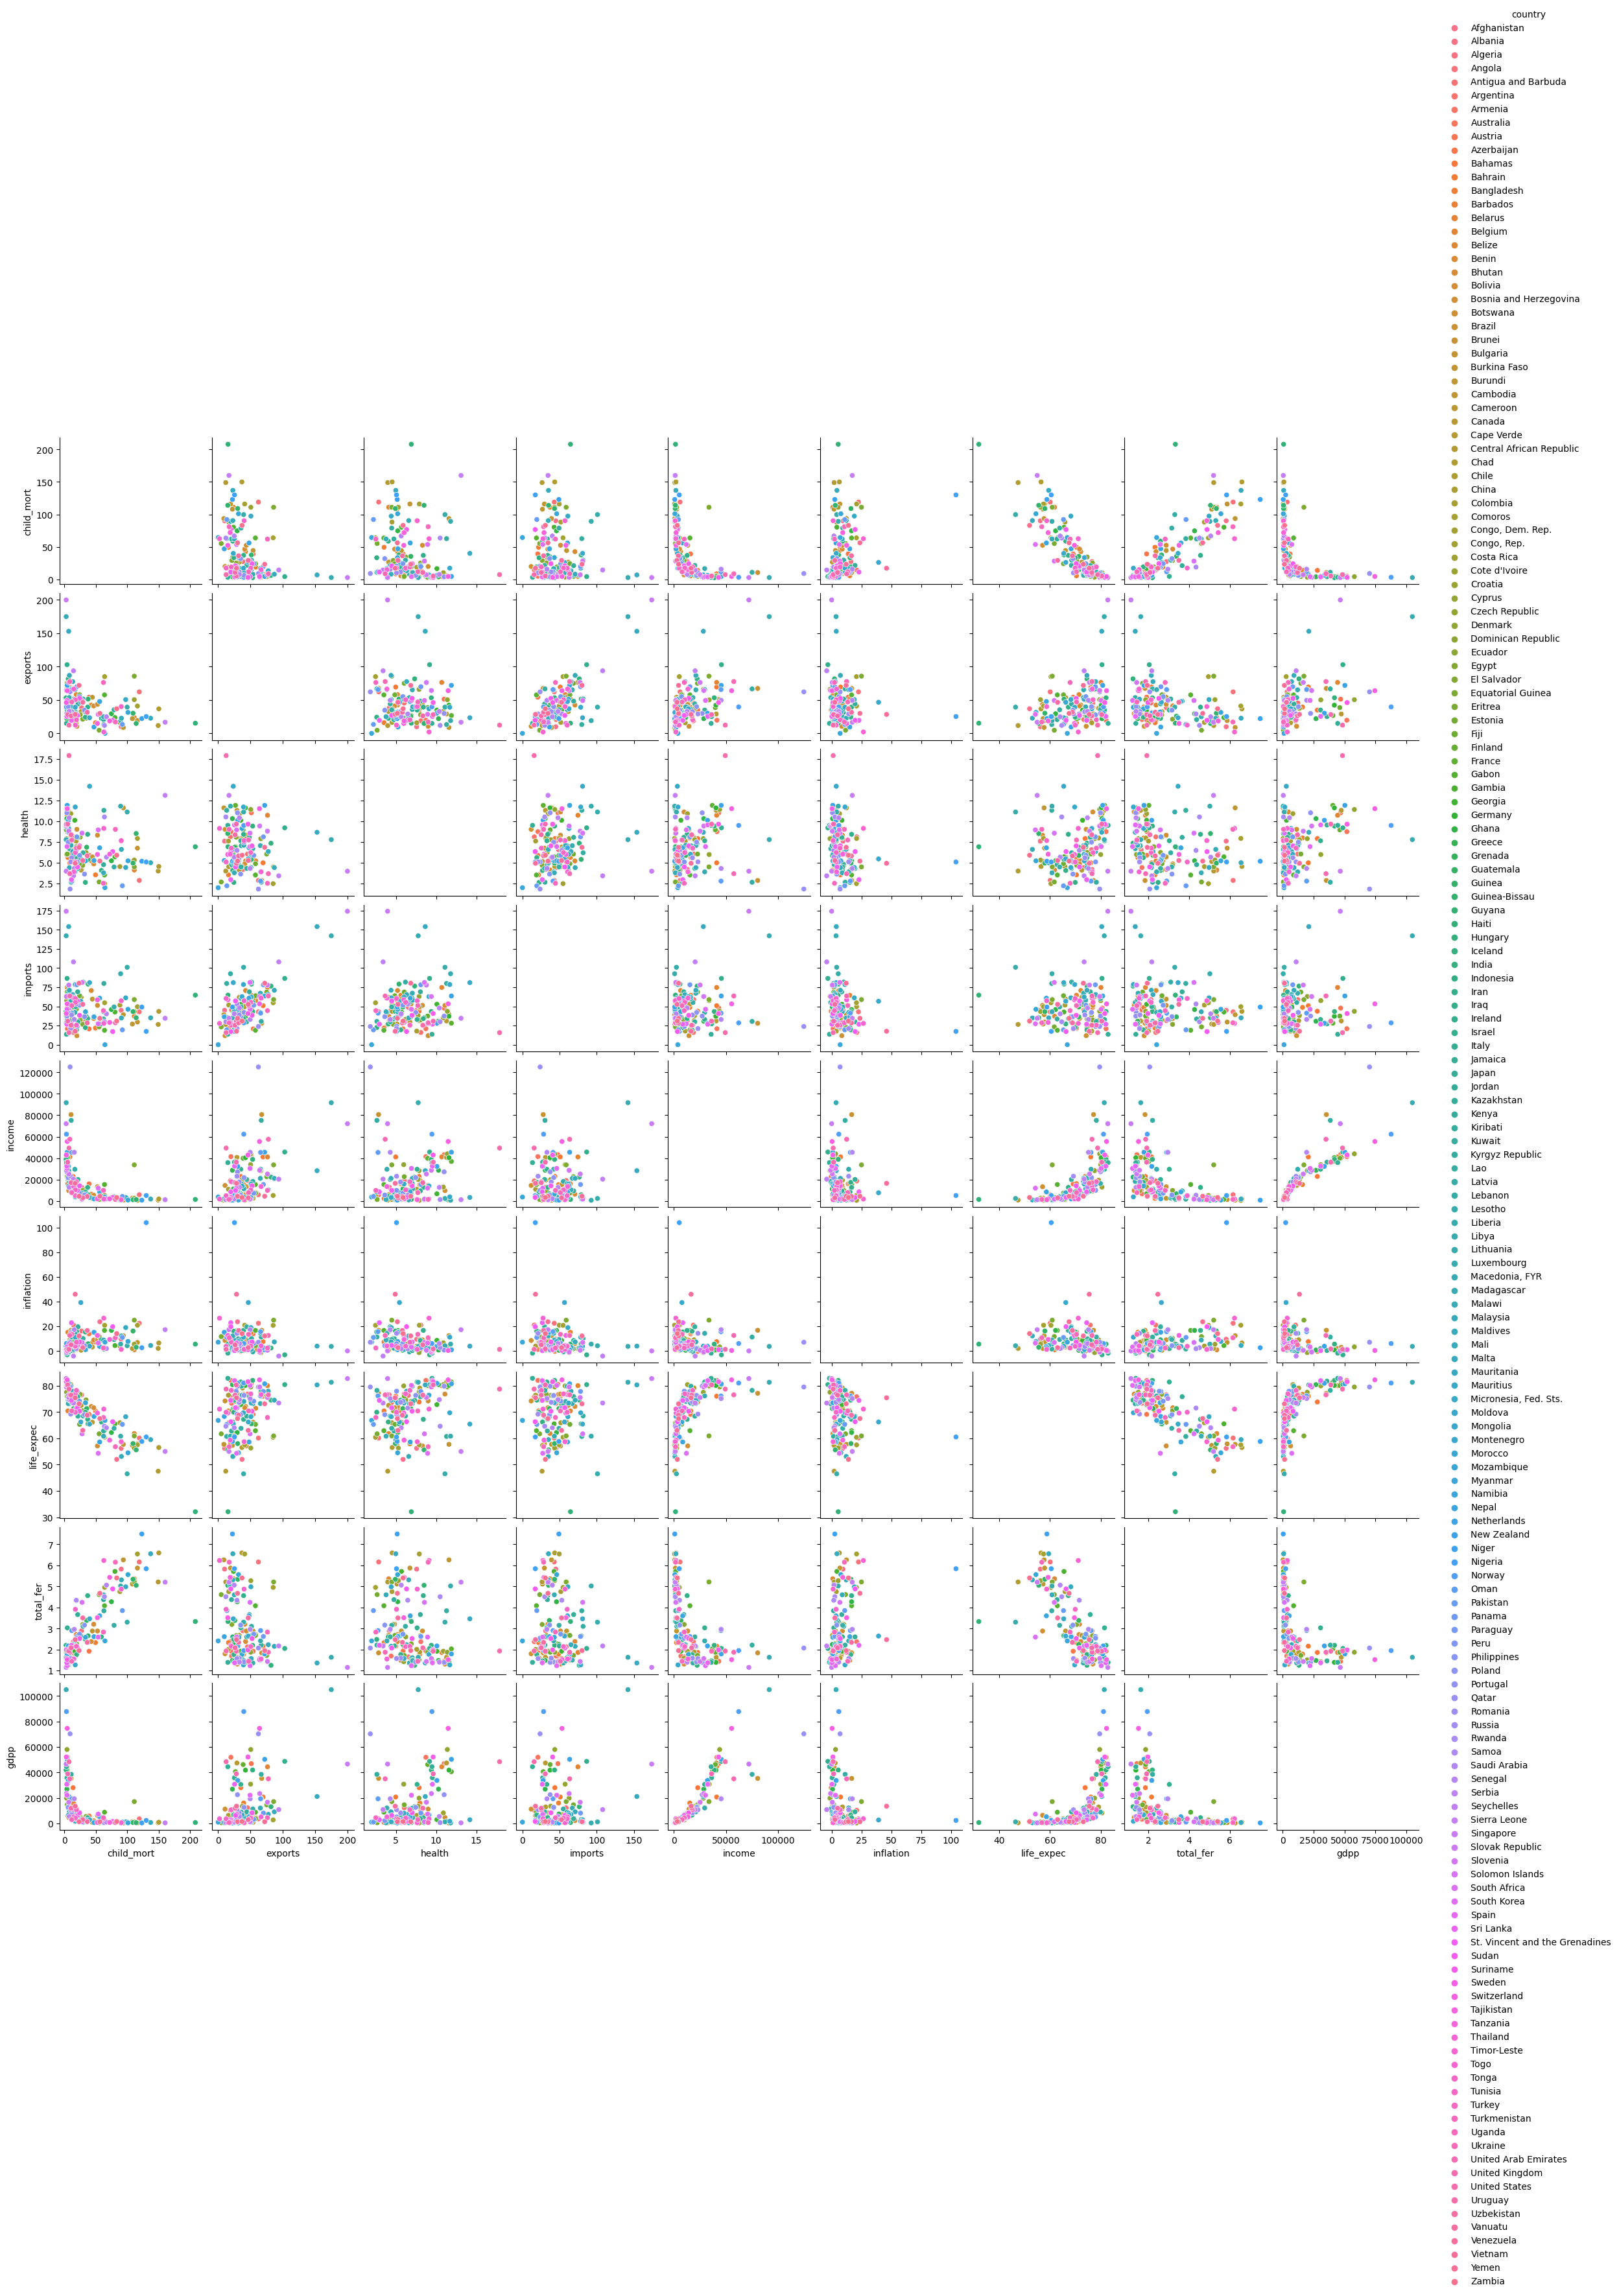

In [ ]:
sns.pairplot(df, hue='country')

**Using this , we can see the relationship between two quantitative variables measured for the same individuals data with respect to each feature.**

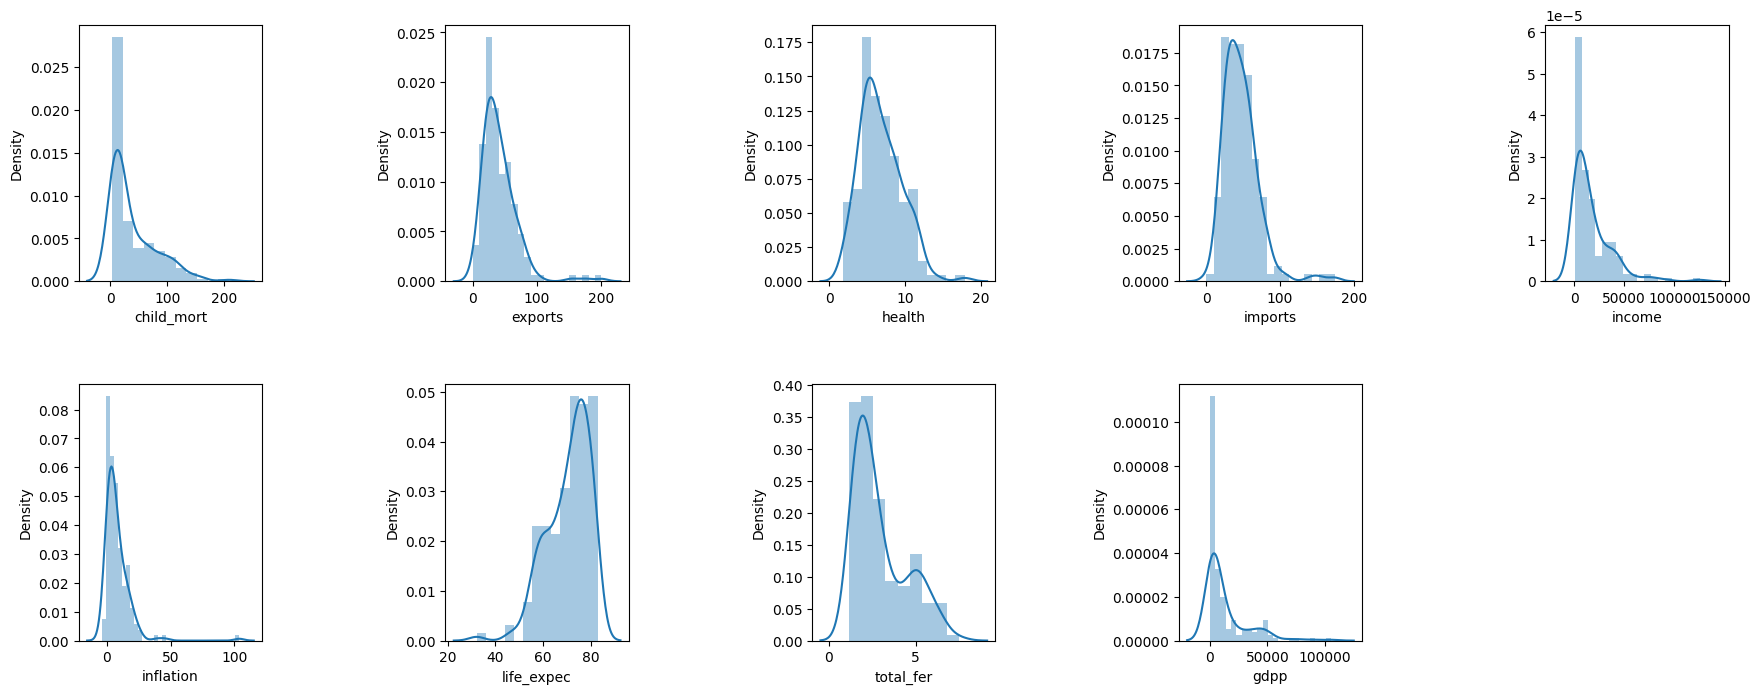

In [ ]:
plt.subplots(figsize=(15, 8))
index = 1

for i in range(1,len(columns)):
    plt.subplots_adjust(left=0, bottom=None, right=1.1, top=None, wspace=1, hspace=0.4)
    plt.subplot(2 ,5, index)
    sns.distplot(df[columns[i]])
    index += 1

**Using this , we visualize the density distribution of each feature**

In [ ]:
for i in df.drop(columns ='country').columns:
    fig = px.choropleth(data_frame = df, locationmode = 'country names',
               locations = 'country', color = i, title = f'{i} rate by countries')
    fig.show()

**Using this , we visualize value of feature on world map**

array([[<Axes: title={'center': 'child_mort'}>,
        <Axes: title={'center': 'exports'}>,
        <Axes: title={'center': 'health'}>],
       [<Axes: title={'center': 'imports'}>,
        <Axes: title={'center': 'income'}>,
        <Axes: title={'center': 'inflation'}>],
       [<Axes: title={'center': 'life_expec'}>,
        <Axes: title={'center': 'total_fer'}>,
        <Axes: title={'center': 'gdpp'}>]], dtype=object)

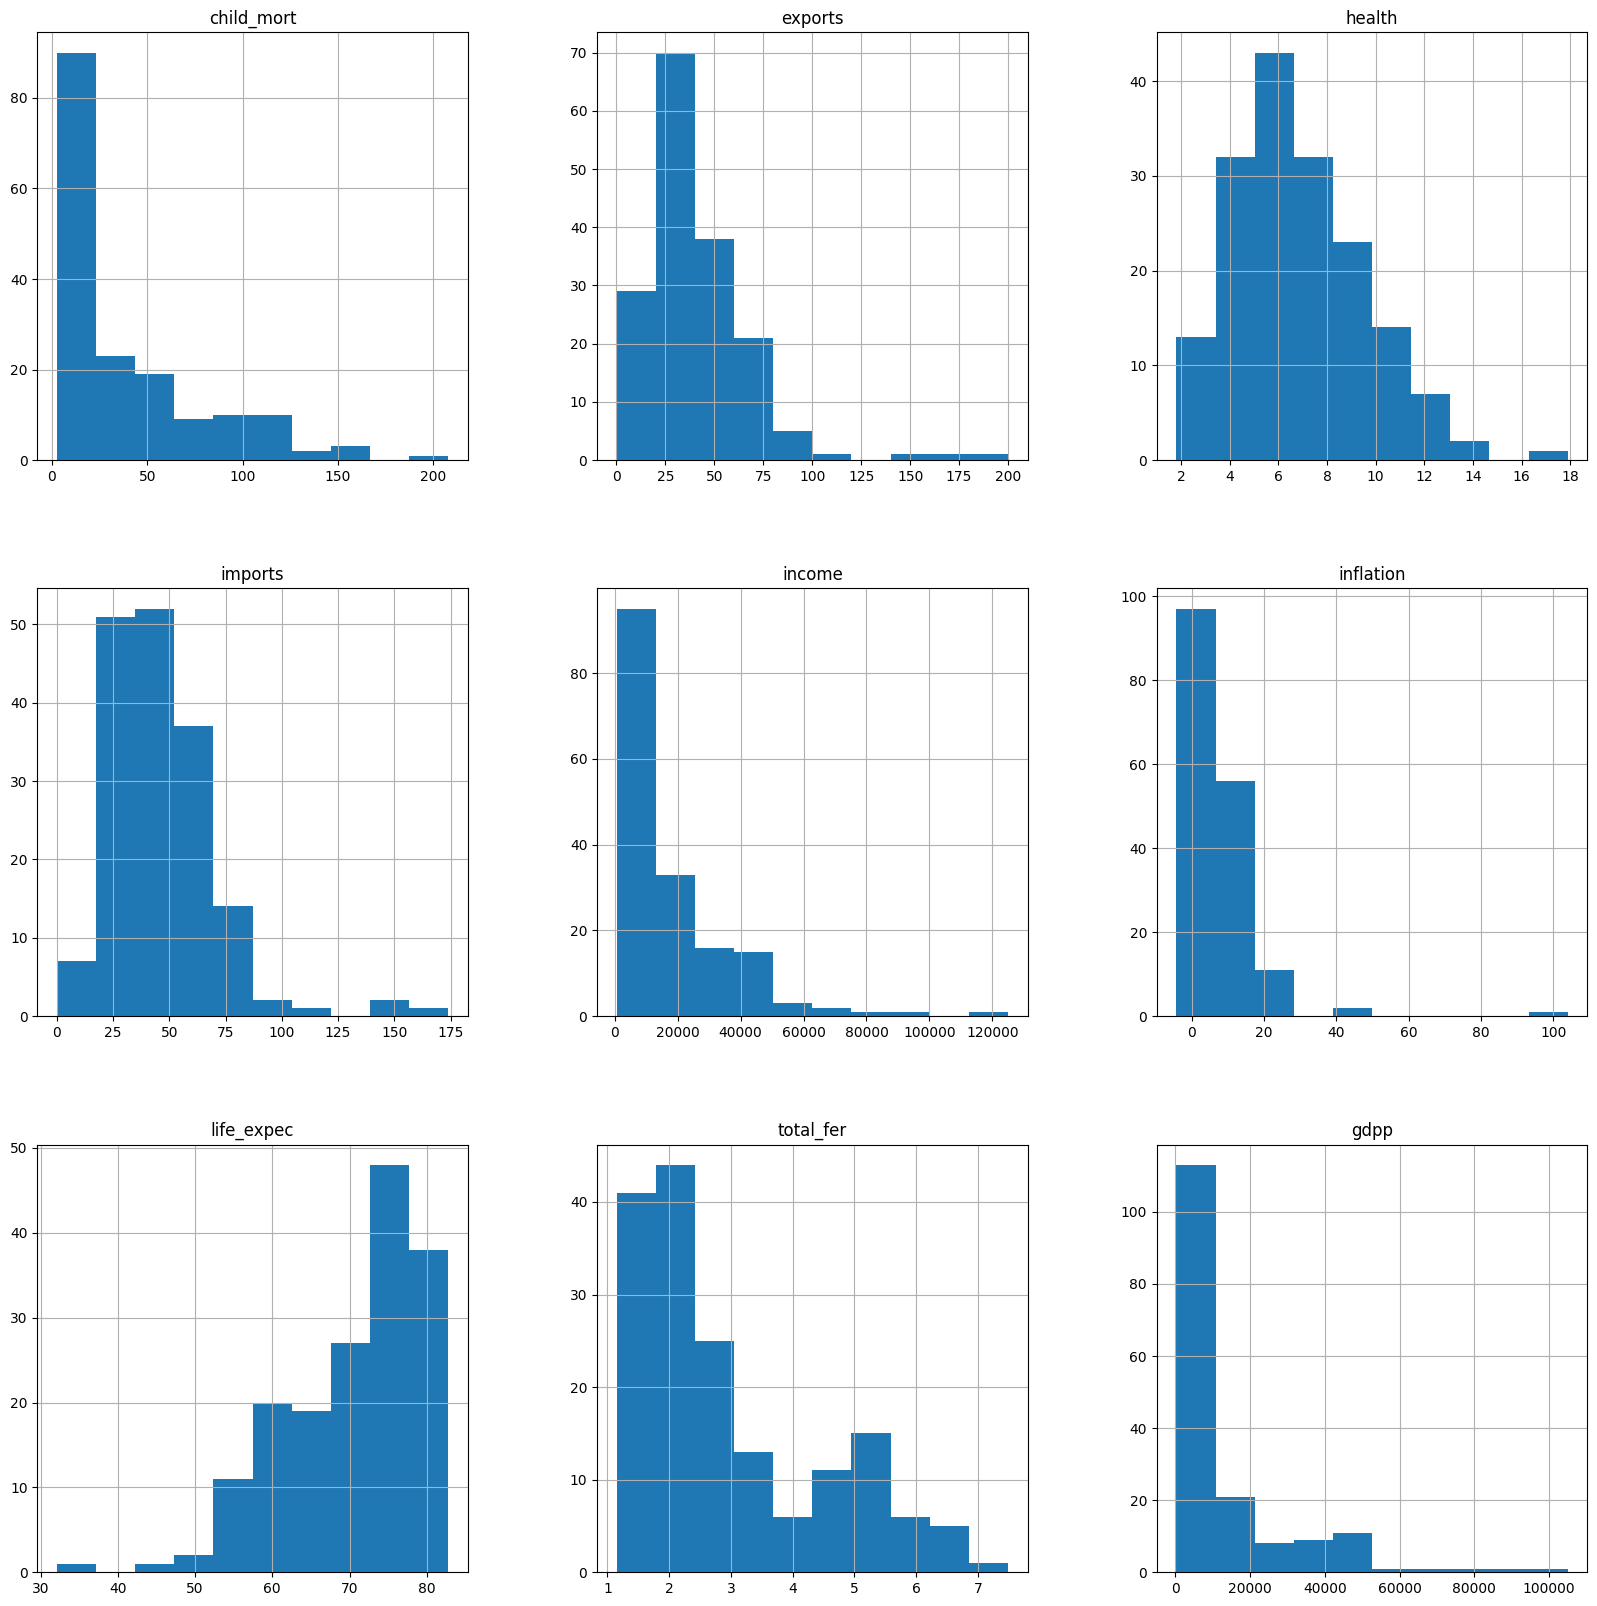

In [ ]:
# Set the figure size
fig, ax = plt.subplots(figsize=(20, 20))

# Create the histogram
df.hist(ax=ax, bins=10)


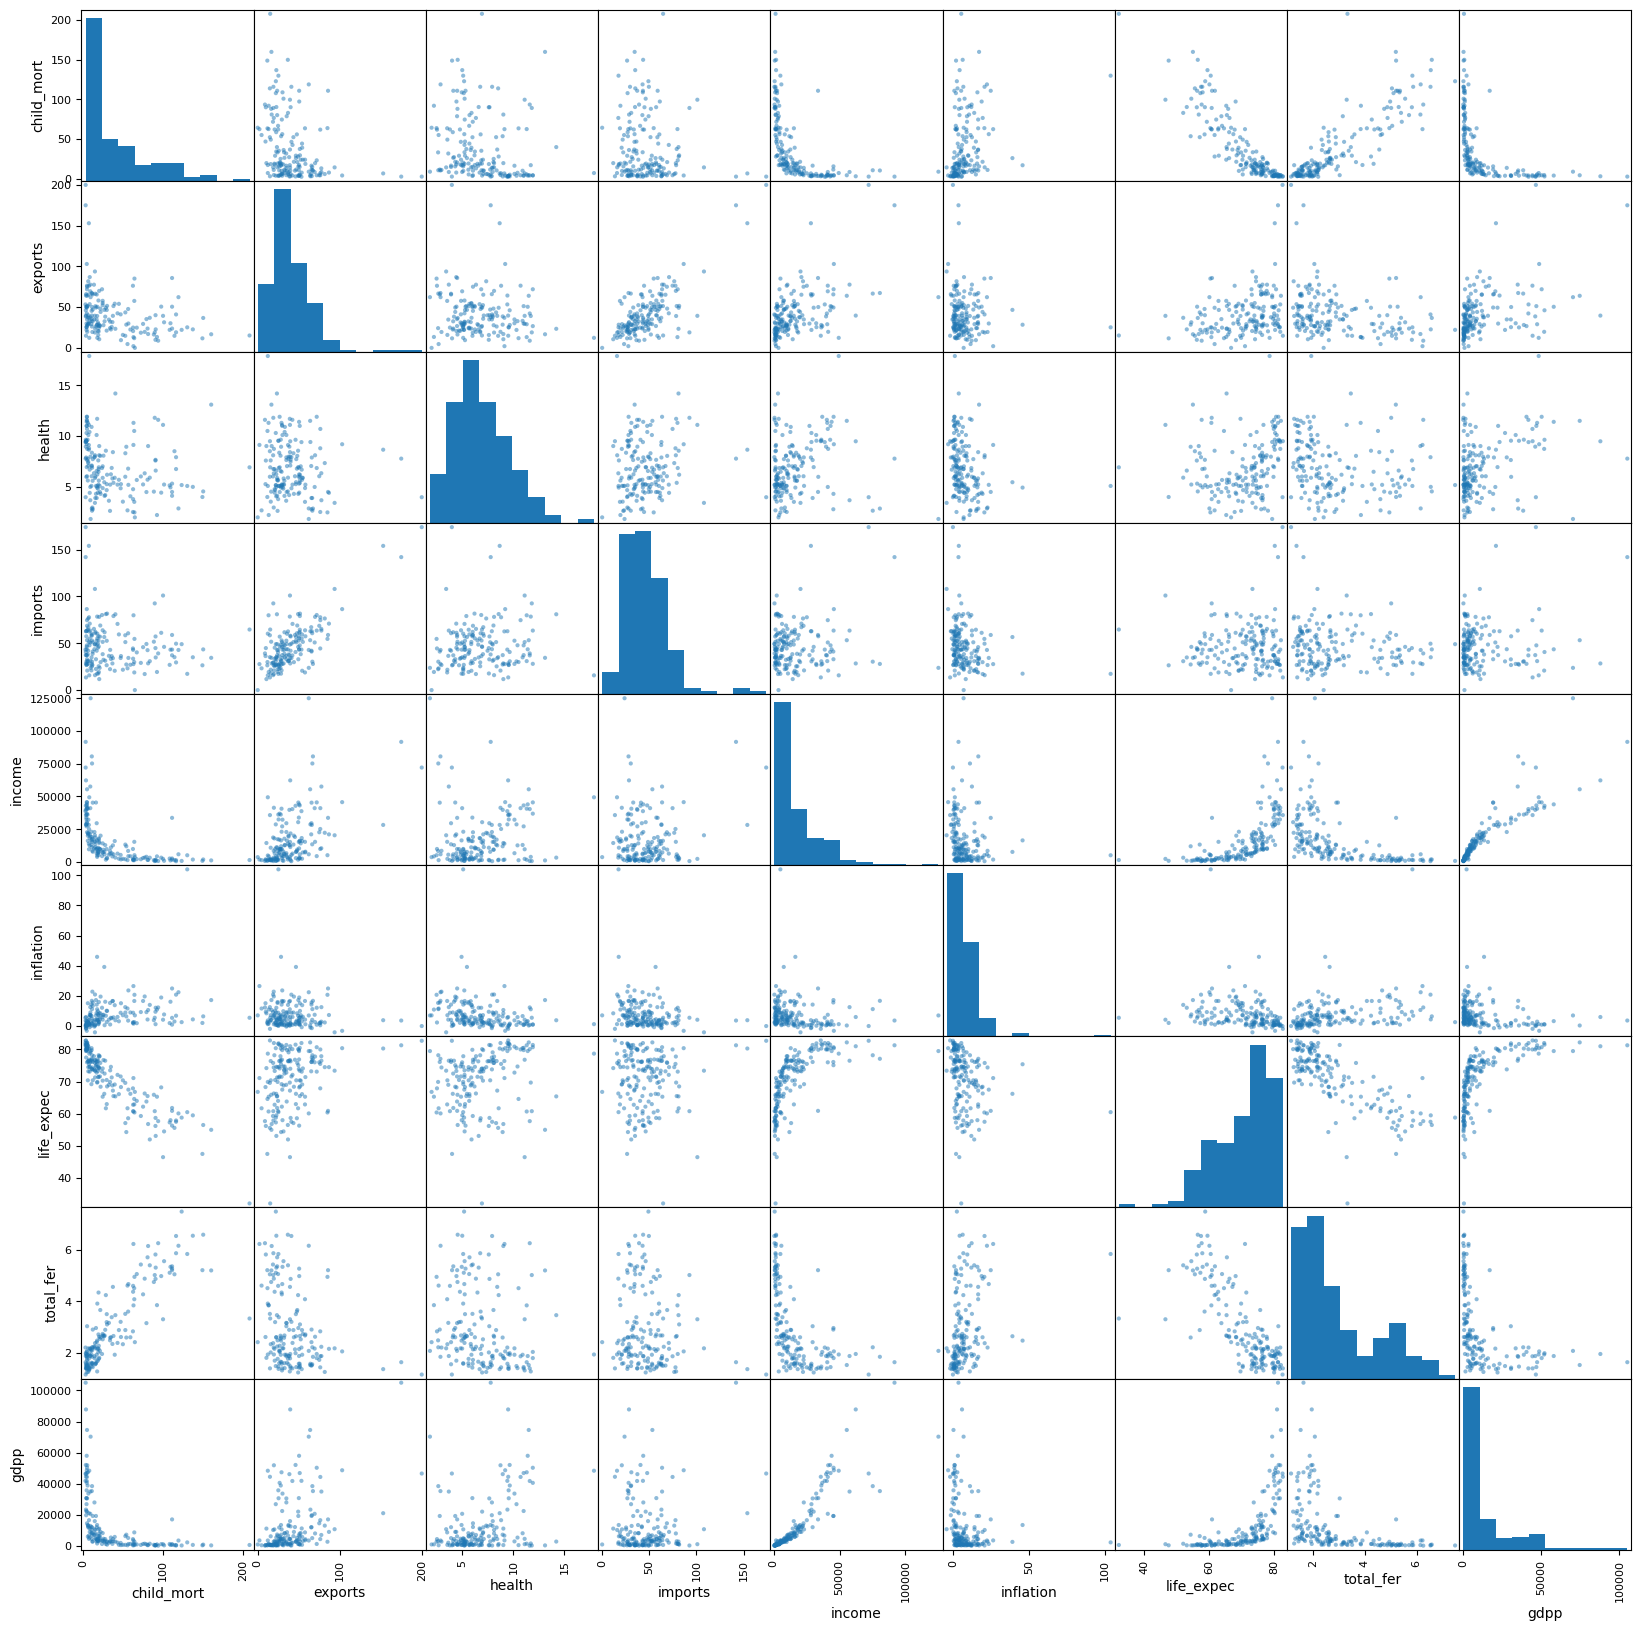

In [ ]:
# Set the figure size
fig, ax = plt.subplots(figsize=(20, 20))
# Create the scatter matrix
scatter_matrix = pd.plotting.scatter_matrix(df, ax=ax)

#Scaling given data and applying pca on it

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(data), columns = data.columns)
df_scaled

child_mort   exports    health   imports    income  inflation  \
0      1.291532 -1.138280  0.279088 -0.082455 -0.808245   0.157336   
1     -0.538949 -0.479658 -0.097016  0.070837 -0.375369  -0.312347   
2     -0.272833 -0.099122 -0.966073 -0.641762 -0.220844   0.789274   
3      2.007808  0.775381 -1.448071 -0.165315 -0.585043   1.387054   
4     -0.695634  0.160668 -0.286894  0.497568  0.101732  -0.601749   
..          ...       ...       ...       ...       ...        ...   
162   -0.225578  0.200917 -0.571711  0.240700 -0.738527  -0.489784   
163   -0.526514 -0.461363 -0.695862 -1.213499 -0.033542   3.616865   
164   -0.372315  1.130305  0.008877  1.380030 -0.658404   0.409732   
165    0.448417 -0.406478 -0.597272 -0.517472 -0.658924   1.500916   
166    1.114951 -0.150348 -0.338015 -0.662477 -0.721358   0.590015   

     life_expec  total_fer      gdpp  
0     -1.619092   1.902882 -0.679180  
1      0.647866  -0.859973 -0.485623  
2      0.670423  -0.038404 -0.465376  
3     -1.179234   2.128151 -0.516268  
4      0.704258  -0.541946 -0.041817  
..          ...        ...       ...  
162   -0.852161   0.365754 -0.546913  
163    0.546361  -0.316678  0.029323  
164    0.286958  -0.661206 -0.637754  
165   -0.344633   1.140944 -0.637754  
166   -2.092785   1.624609 -0.629546  

[167 rows x 9 columns]

**Reason behind using pca**-->

1) Prevents the dominance of one feature

2)Standardization makes the model more robust to outliers and small changes in the input data. This is because the scale of the data is the same for all features, and outliers are scaled down to be similar in magnitude to the rest of the data.

3) helps improve the performance

Selecting the features with highest variability using principal component analysis:-

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
#Using for loop to finding the best number of components for our pca model
variances = []
[variances.append(PCA(n_components=i).fit(df_scaled).explained_variance_ratio_.sum()) for i in range(0, len(df.columns))]
print(variances)


[0.0, 0.45951739786095946, 0.6313336543771413, 0.7613762433466718, 0.871907861402391, 0.9453099756439513, 0.9701523224082288, 0.982756626389879, 0.9925694437691406, 1.0]


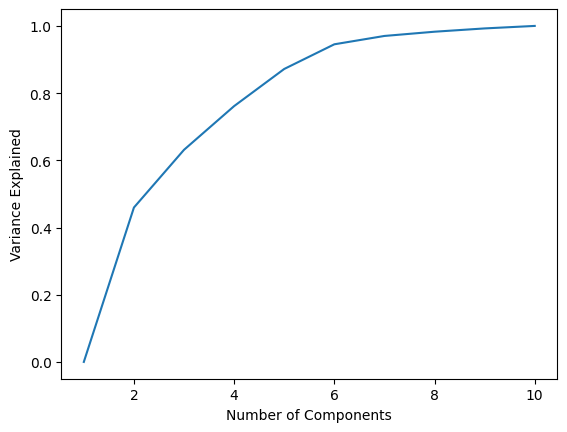

In [ ]:
plt.plot(range(1, len(df.columns)+1), variances)
plt.xlabel("Number of Components")
plt.ylabel("Variance Explained");

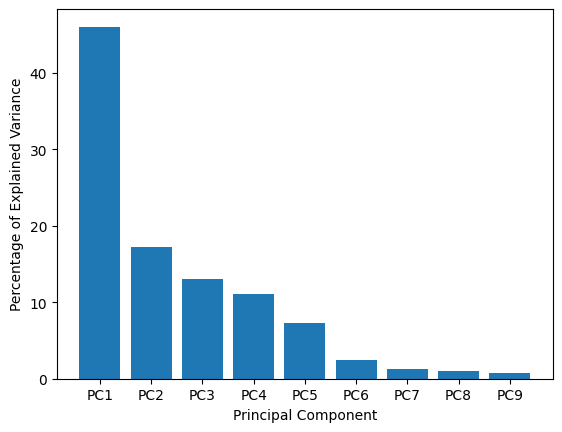

Text(0, 0.5, 'PC2 - 17.2%')

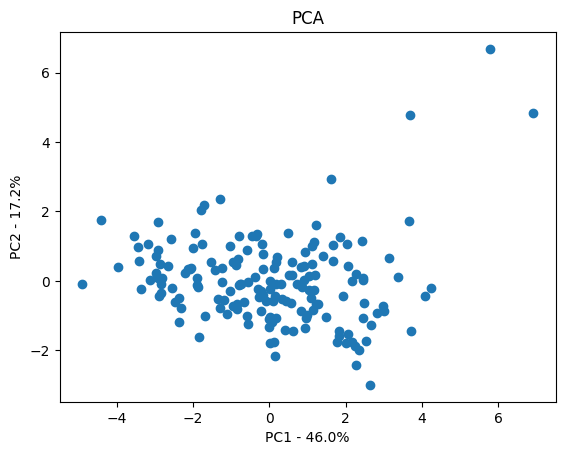

In [ ]:
from sklearn.decomposition import PCA

# fit and transform
pca = PCA()
pca.fit(df_scaled)
pca_data_standard = pca.transform(df_scaled)

# percentage variation
per_var = np.round(pca.explained_variance_ratio_*100, decimals =1)
labels = ['PC' + str(x) for x in range (1, len(per_var)+1)]

# plot the percentage of explained variance by principal component
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label = labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')

plt.show()

# plot pca
pca_df_standard = pd.DataFrame(pca_data_standard, columns = labels)
plt.scatter(pca_df_standard.PC1, pca_df_standard.PC2)
plt.title('PCA')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))

In [ ]:
# dataframe with PC1, PC2, P3, PC4
data_pca_selected = pca_df_standard.drop(['PC5','PC6','PC7','PC8','PC9'], axis = 1)
data_pca_selected

PC1       PC2       PC3       PC4
0   -2.913025  0.095621 -0.718118  1.005255
1    0.429911 -0.588156 -0.333486 -1.161059
2   -0.285225 -0.455174  1.221505 -0.868115
3   -2.932423  1.695555  1.525044  0.839625
4    1.033576  0.136659 -0.225721 -0.847063
..        ...       ...       ...       ...
162 -0.820631  0.639570 -0.389923 -0.706595
163 -0.551036 -1.233886  3.101350 -0.115311
164  0.498524  1.390744 -0.238526 -1.074098
165 -1.887451 -0.109453  1.109752  0.056257
166 -2.864064  0.485998  0.223167  0.816364

[167 rows x 4 columns]

Findings -->

After doing PCA with standardised dataset, we can see that there are 4 principal components can explain about 90% of the distribution of the original data.


It reduces the complexity of the model , also it removes redundant features . Also PCA reduces the number of features, making it easier to interpret the relationship between the features and the target variable.




# Best cluster number selection methods on PCA  data

k hyperparameter : It defines the number of clusters or groups the data is to be divided into. For the selection of values of k, we use 2 statistical tests :


Elbow Method : It is a method that plots the sum of squared error for a range of values of k. If this plot looks like an arm, then k is the value that resembles an elbow is selected. From this elbow value, sum of squared values (inertia) starts decreasing in a linear fashion and thus is considered as an optimal value.


Silhouette Score Method : It is a method that evaluates the quality of clusters in terms of how well data points are clustered with other data points that are similar to each other. This score is calculated using the distance formula and the k value with highest score is selected for modeling.


Using Davies Bouldin Score : The minimum score is zero, with lower values indicating better clustering.

i) Elbow Method On PCA Data

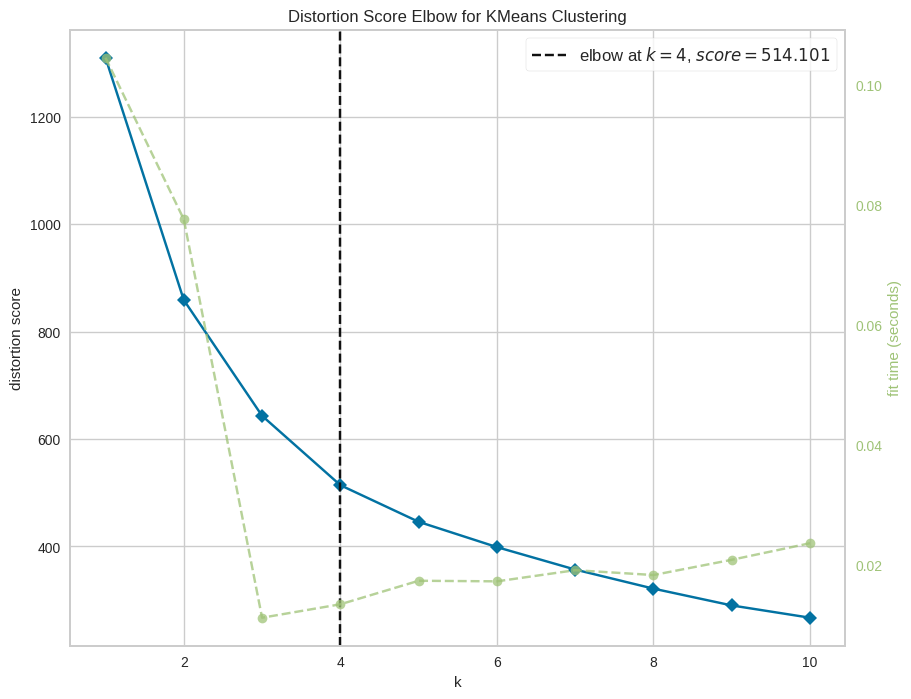

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

plt.rcParams['figure.figsize'] = 10, 8
visualizer = KElbowVisualizer(KMeans(), k = (1, 11))
visualizer.fit(data_pca_selected)
visualizer.poof()

ii)Silhouette score for pca data

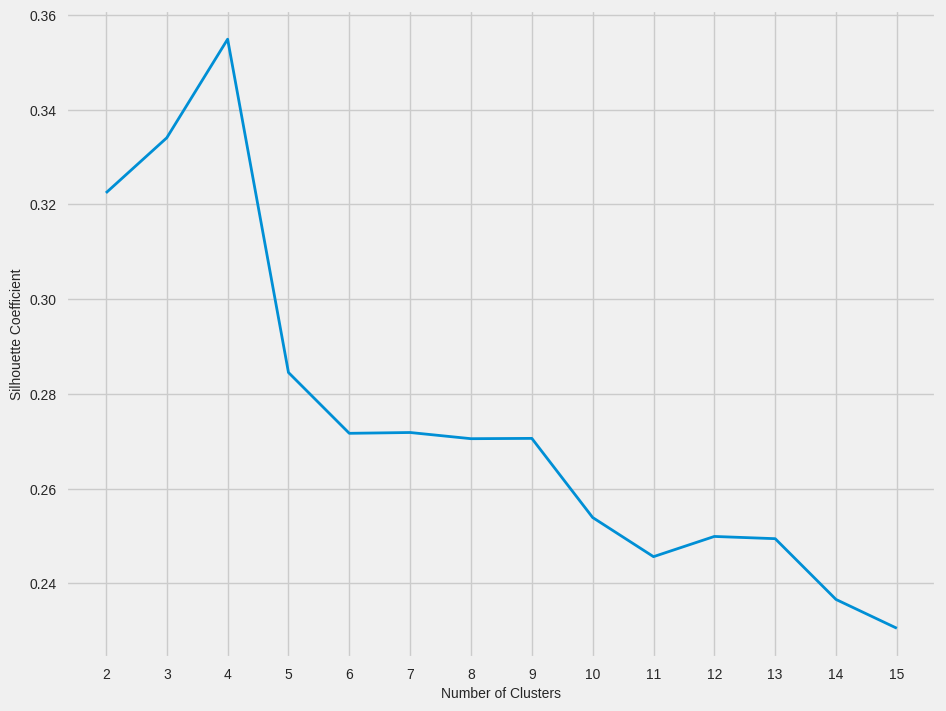

In [ ]:
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 16):
    kmeans = KMeans(n_clusters=k, max_iter = 500,  init = 'random', random_state = 42)
    kmeans.fit(data_pca_selected)
    score = silhouette_score(data_pca_selected, kmeans.labels_)
    silhouette_coefficients.append(score)

plt.style.use("fivethirtyeight")
plt.plot(range(2, 16), silhouette_coefficients, linewidth=2)
plt.xticks(range(2, 16), fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel("Number of Clusters", fontsize = 10)
plt.ylabel("Silhouette Coefficient", fontsize = 10)
plt.show()

Finding optimal number of clusters using Davis Bouldin Score:

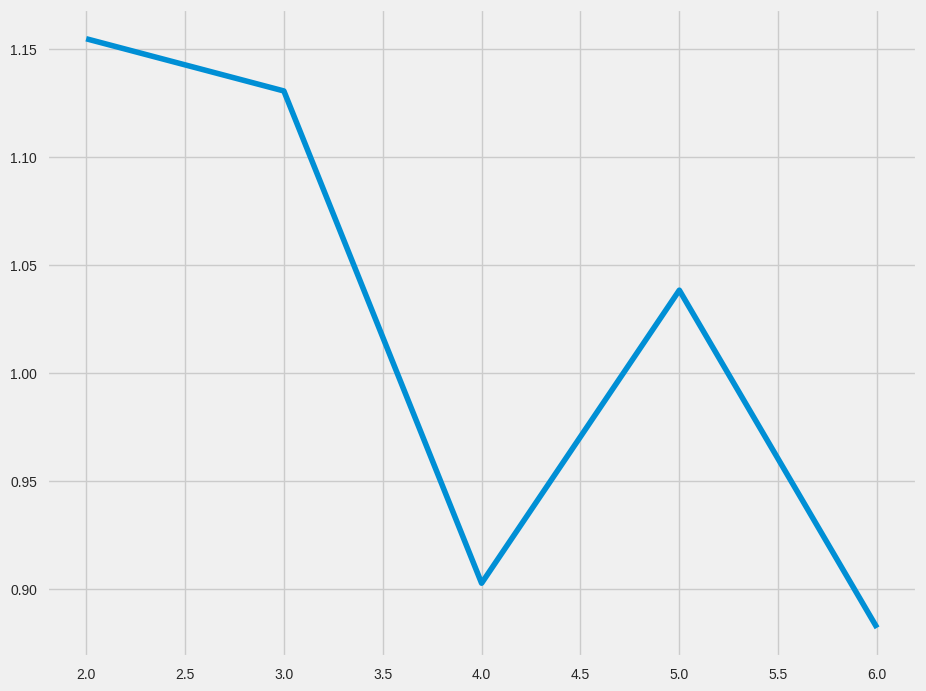

In [ ]:
from sklearn.metrics import davies_bouldin_score

db = []
for i in range(2,7):
    modelKM = KMeans(n_clusters = i)
    modelKM.fit(data_pca_selected)
    db.append(davies_bouldin_score(data_pca_selected, modelKM.labels_))
plt.plot(range(2,7), db)

Conclusion for pca data-->

From Elbow method --> Elbow at cluster_num= 4

Silhoutee coeffiecient -->High for cluster_num=4

Davis Bouldin Score --> low for cluster_num=4

we can conclude that the optimal number of clusters for the data is 4.

# Method 1 : K-means

K-means is an unsupervised learning algorithm.


K-means is scalable, which means it can handle large datasets efficiently.

It is widely used in industries such as e-commerce, finance, and healthcare to analyze large amounts of data.

K-means is generally faster than other clustering algorithms, such as hierarchical clustering or DBSCAN. This is because it is an iterative algorithm that converges quickly to a solution.

#i)on PCA selected data

In [ ]:
km_pca = KMeans (
    n_clusters = 4, # number of clusters/centroids to create
    init = 'random', # ‘random’: choose n_clusters observations (rows) at random from data for the initial centroids
    n_init = 10, # this is the default value. This is the number of times the k-means algorithm will be run with different centroid seeds
    max_iter = 300, # this is the default value. This is the maximum number of iterations of the k-means algorithm for a single run.
    tol = 1e-4, # this is the default value. This is the relative tolerance with regards to Frobenius norm of the difference in the cluster centers of two consecutive iterations to declare convergence.
    random_state = 0 # this is the default value. Determines random number generation for centroid initialization. Use an int to make the randomness deterministic.
)

In [ ]:
# method to compute the clusters and assign the labels
y_predicted_pca_kmeans = km_pca.fit_predict(data_pca_selected)                                        #data2 -->pc0,pc1,pc2,pc3
y_predicted_pca_kmeans

array([0, 2, 2, 0, 2, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 3, 2, 0, 2, 2, 2, 0,
       2, 1, 2, 0, 0, 2, 0, 3, 2, 0, 0, 2, 2, 2, 0, 0, 0, 2, 0, 2, 3, 2,
       3, 2, 2, 2, 2, 0, 0, 2, 2, 3, 3, 0, 0, 2, 3, 0, 3, 2, 2, 0, 0, 2,
       0, 2, 3, 2, 2, 2, 0, 1, 3, 3, 2, 3, 2, 2, 0, 0, 1, 2, 0, 2, 2, 0,
       0, 2, 2, 1, 2, 0, 0, 2, 2, 0, 1, 0, 2, 0, 2, 2, 2, 2, 0, 2, 0, 2,
       3, 3, 0, 0, 3, 2, 0, 2, 2, 2, 2, 2, 3, 1, 2, 2, 0, 2, 2, 0, 2, 2,
       0, 1, 2, 3, 0, 0, 2, 3, 2, 2, 0, 2, 3, 3, 2, 0, 2, 0, 0, 2, 2, 2,
       2, 0, 2, 1, 3, 3, 2, 2, 2, 2, 2, 0, 0], dtype=int32)

In [ ]:
pca_data_with_final_cluster = pd.concat([df, data_pca_selected], axis=1)
pca_data_with_final_cluster['sub_clusters_pca_kmeans'] = y_predicted_pca_kmeans
pca_data_with_final_cluster.head()

country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp       PC1       PC2       PC3  \
0       9.44        56.2       5.82    553 -2.913025  0.095621 -0.718118   
1       4.49        76.3       1.65   4090  0.429911 -0.588156 -0.333486   
2      16.10        76.5       2.89   4460 -0.285225 -0.455174  1.221505   
3      22.40        60.1       6.16   3530 -2.932423  1.695555  1.525044   
4       1.44        76.8       2.13  12200  1.033576  0.136659 -0.225721   

        PC4  sub_clusters_pca_kmeans  
0  1.005255                        0  
1 -1.161059                        2  
2 -0.868115                        2  
3  0.839625                        0  
4 -0.847063                        2

In [ ]:
pca_pred_kmeans = pd.Series(km_pca.labels_)
print(pd.concat({"count" : pca_pred_kmeans.value_counts(),"Percent" : round(pca_pred_kmeans.value_counts(normalize = True)*100, 2)}, axis = 1))

   count  Percent
2     86    51.50
0     49    29.34
3     24    14.37
1      8     4.79


Now we have got the clusters but we don't know which value corresponds to what!



we draw a boxplot of income , child_mort & gdp w.r.t labeled clusters

**We know that low income ,high child mortality & low gdp is a sign of an economically backward nation.**

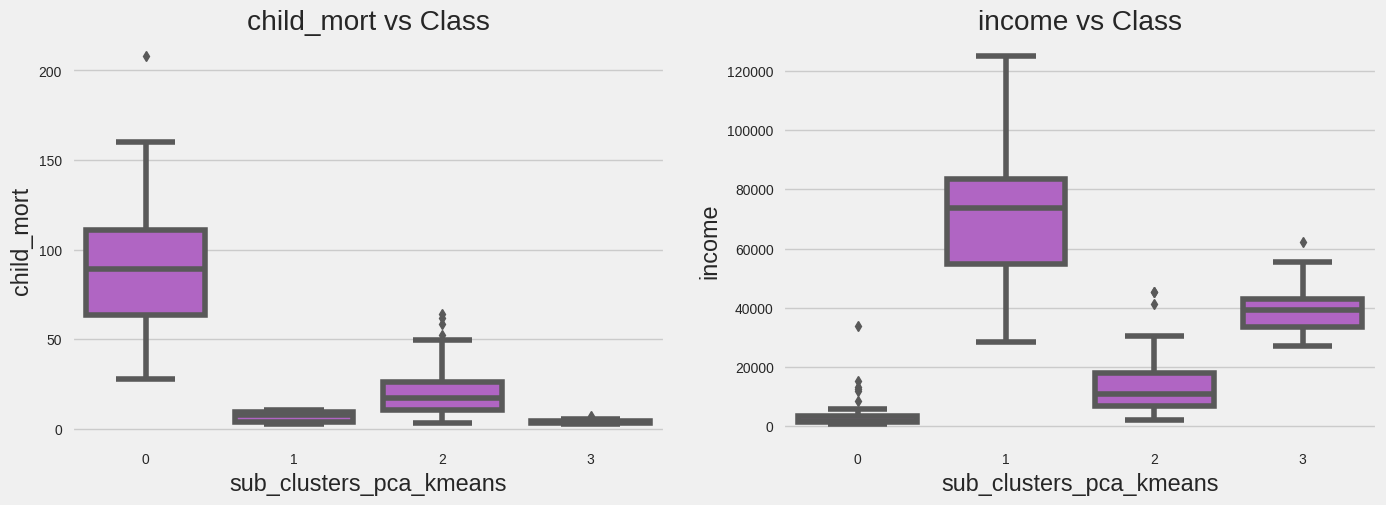

In [ ]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

plt.subplot(1,2,1)
sns.boxplot(x = 'sub_clusters_pca_kmeans', y = 'child_mort', data  = pca_data_with_final_cluster, color = '#BA55D3');
plt.title('child_mort vs Class')

plt.subplot(1,2,2)
sns.boxplot(x = 'sub_clusters_pca_kmeans', y = 'income', data  = pca_data_with_final_cluster, color = '#BA55D3');
plt.title('income vs Class')
plt.show()

Text(0.5, 1.0, 'gdp vs Class')

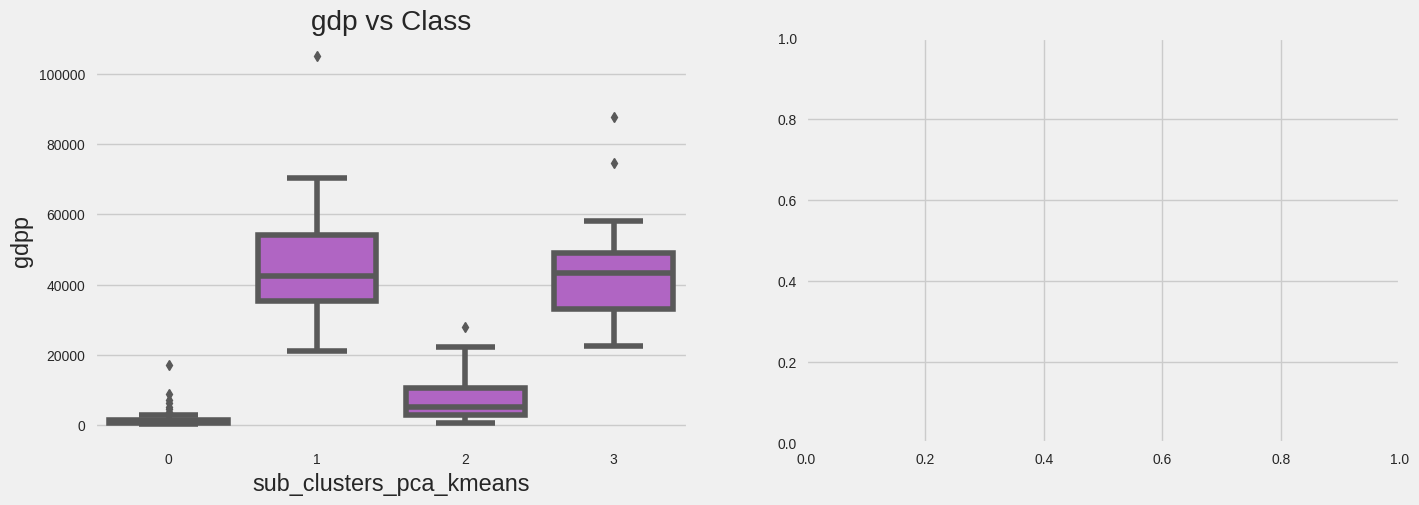

In [ ]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

plt.subplot(1,2,1)
sns.boxplot(x = 'sub_clusters_pca_kmeans', y = 'gdpp', data  = pca_data_with_final_cluster, color = '#BA55D3');
plt.title('gdp vs Class')

**Findings-->**

**From above box_plot we will do cluster assignment**

In [ ]:
from statistics import mean

pca_cluster_kmeans_gdp_avg_list=[]
pca_cluster_0_kmeans = pca_data_with_final_cluster[pca_data_with_final_cluster.sub_clusters_pca_kmeans == 0]
kmeans_cluster_0_gdp=np.array(pca_cluster_0_kmeans.gdpp)
pca_avg_gdp_cluster_0_kmeans = mean(kmeans_cluster_0_gdp)
pca_cluster_kmeans_gdp_avg_list.append(pca_avg_gdp_cluster_0_kmeans)
print("Average GDP of Cluster_0 :",pca_avg_gdp_cluster_0_kmeans)


pca_cluster_1_kmeans = pca_data_with_final_cluster[pca_data_with_final_cluster.sub_clusters_pca_kmeans == 1]
kmeans_cluster_1_gdp=np.array(pca_cluster_1_kmeans.gdpp)
pca_avg_gdp_cluster_1_kmeans = mean(kmeans_cluster_1_gdp)
pca_cluster_kmeans_gdp_avg_list.append(pca_avg_gdp_cluster_1_kmeans)
print("Average GDP of Cluster_1 :",pca_avg_gdp_cluster_1_kmeans)

pca_cluster_2_kmeans = pca_data_with_final_cluster[pca_data_with_final_cluster.sub_clusters_pca_kmeans == 2]
kmeans_cluster_2_gdp=np.array(pca_cluster_2_kmeans.gdpp)
pca_avg_gdp_cluster_2_kmeans = mean(kmeans_cluster_2_gdp)
pca_cluster_kmeans_gdp_avg_list.append(pca_avg_gdp_cluster_2_kmeans)
print("Average GDP of Cluster_2 :",pca_avg_gdp_cluster_2_kmeans)

pca_cluster_3_kmeans = pca_data_with_final_cluster[pca_data_with_final_cluster.sub_clusters_pca_kmeans == 3]
kmeans_cluster_3_gdp=np.array(pca_cluster_3_kmeans.gdpp)
pca_avg_gdp_cluster_3_kmeans = mean(kmeans_cluster_3_gdp)
pca_cluster_kmeans_gdp_avg_list.append(pca_avg_gdp_cluster_3_kmeans)
print("Average GDP of Cluster_3 :",pca_avg_gdp_cluster_3_kmeans)
print("Average_GDP_KMEans :",pca_cluster_kmeans_gdp_avg_list)

Average GDP of Cluster_0 : 1928
Average GDP of Cluster_1 : 50062
Average GDP of Cluster_2 : 7208
Average GDP of Cluster_3 : 43754
Average_GDP_KMEans : [1928, 50062, 7208, 43754]


**Cluster Asssignment Function-->**

In [ ]:
def cluster_assignment_length_4(lis):
  Dict={}
  New_Dec_list=np.flip(np.argsort(lis))
  li=['No Help Needed','No Help Needed','Might Need Help','Help Needed']
  j=0
  for i in range(len(lis)):
       Dict[New_Dec_list[i]]=li[j]
       j=j+1;
  return Dict

**Cluster Assignment-->**

In [ ]:
cluster_asssignment_pca_kmeans=(cluster_assignment_length_4(pca_cluster_kmeans_gdp_avg_list))
print(cluster_asssignment_pca_kmeans)

{1: 'No Help Needed', 3: 'No Help Needed', 2: 'Might Need Help', 0: 'Help Needed'}


**Visualizing countries**

In [ ]:
for cluster_num in range (4):
  pca_data_with_final_cluster['sub_clusters_pca_kmeans'].iloc[pca_data_with_final_cluster['sub_clusters_pca_kmeans'] == cluster_num] = cluster_asssignment_pca_kmeans[cluster_num]


fig = px.choropleth(pca_data_with_final_cluster[['country','sub_clusters_pca_kmeans']],
                    locationmode = 'country names',
                    locations = 'country',
                    title = 'Needed Help Per Country (World)',
                    color = pca_data_with_final_cluster['sub_clusters_pca_kmeans'],
                    color_discrete_map = {'Help Needed':'Red',
                                        'No Help Needed':'Green',
                                        'Might Need Help':'Yellow'
                                        }
                   )
fig.update_geos(fitbounds = "locations", visible = True)
fig.update_layout(legend_title_text = 'Labels',legend_title_side = 'top',title_pad_l = 260,title_y = 0.86)
fig.show(engine = 'kaleido')

In [ ]:
Needy_pca_kmeans = pca_data_with_final_cluster[pca_data_with_final_cluster.sub_clusters_pca_kmeans == 'Help Needed']
Help_Needed_Countries_kmeans=np.array(Needy_pca_kmeans.country)
print(Help_Needed_Countries_kmeans)

['Afghanistan' 'Angola' 'Benin' 'Botswana' 'Burkina Faso' 'Burundi'
 'Cameroon' 'Central African Republic' 'Chad' 'Comoros' 'Congo, Dem. Rep.'
 'Congo, Rep.' "Cote d'Ivoire" 'Equatorial Guinea' 'Eritrea' 'Gabon'
 'Gambia' 'Ghana' 'Guinea' 'Guinea-Bissau' 'Haiti' 'Iraq' 'Kenya'
 'Kiribati' 'Lao' 'Lesotho' 'Liberia' 'Madagascar' 'Malawi' 'Mali'
 'Mauritania' 'Micronesia, Fed. Sts.' 'Mozambique' 'Namibia' 'Niger'
 'Nigeria' 'Pakistan' 'Rwanda' 'Senegal' 'Sierra Leone' 'Solomon Islands'
 'South Africa' 'Sudan' 'Tanzania' 'Timor-Leste' 'Togo' 'Uganda' 'Yemen'
 'Zambia']


**Maintaining the dictionary of count for further analysis**

In [ ]:
Dict_pca_Help_Needed={}

def Dict_with_cnt_of_needed_countries(Dict_pca_Help_Needed,Help_Needed_Countries):
  for i in Help_Needed_Countries:
    if( i in Dict_pca_Help_Needed ):
       Dict_pca_Help_Needed[i]=Dict_pca_Help_Needed[i]+1
    else :
       Dict_pca_Help_Needed[i]=1

In [ ]:
Dict_with_cnt_of_needed_countries(Dict_pca_Help_Needed,Help_Needed_Countries_kmeans)
print(Dict_pca_Help_Needed)

{'Afghanistan': 1, 'Angola': 1, 'Benin': 1, 'Botswana': 1, 'Burkina Faso': 1, 'Burundi': 1, 'Cameroon': 1, 'Central African Republic': 1, 'Chad': 1, 'Comoros': 1, 'Congo, Dem. Rep.': 1, 'Congo, Rep.': 1, "Cote d'Ivoire": 1, 'Equatorial Guinea': 1, 'Eritrea': 1, 'Gabon': 1, 'Gambia': 1, 'Ghana': 1, 'Guinea': 1, 'Guinea-Bissau': 1, 'Haiti': 1, 'Iraq': 1, 'Kenya': 1, 'Kiribati': 1, 'Lao': 1, 'Lesotho': 1, 'Liberia': 1, 'Madagascar': 1, 'Malawi': 1, 'Mali': 1, 'Mauritania': 1, 'Micronesia, Fed. Sts.': 1, 'Mozambique': 1, 'Namibia': 1, 'Niger': 1, 'Nigeria': 1, 'Pakistan': 1, 'Rwanda': 1, 'Senegal': 1, 'Sierra Leone': 1, 'Solomon Islands': 1, 'South Africa': 1, 'Sudan': 1, 'Tanzania': 1, 'Timor-Leste': 1, 'Togo': 1, 'Uganda': 1, 'Yemen': 1, 'Zambia': 1}


# 2) Finding Best Cluster number using various methods on scaled data

i) Elbow Method on Scaled Data

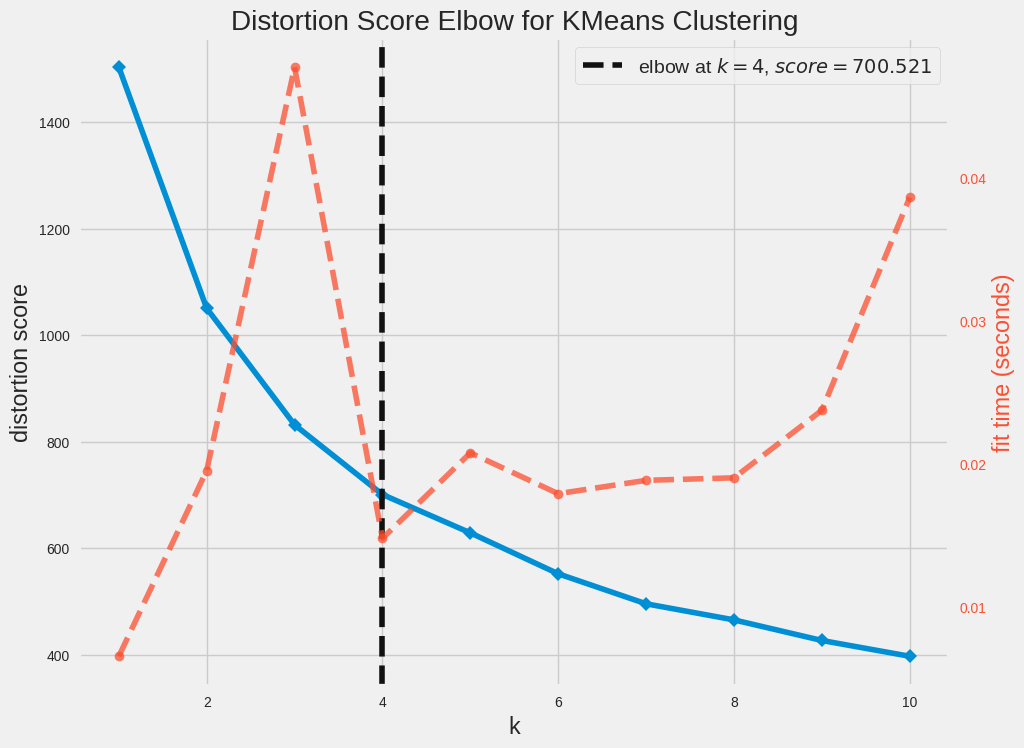

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# Elbow Method on Scaled Data
visualizer = KElbowVisualizer(KMeans(), k = (1, 11))
visualizer.fit(df_scaled)
visualizer.poof()

ii) Silhouette score on scaled data

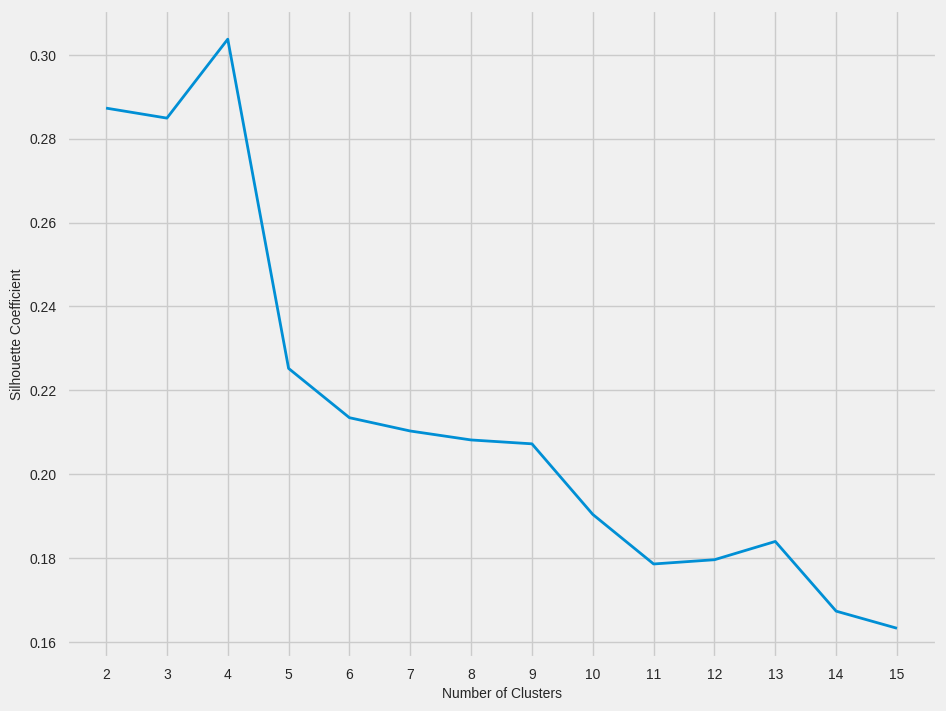

In [ ]:
# A list holds the silhouette coefficients for each k
silhouette_coefficients_scaled = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 16):
    kmeans = KMeans(n_clusters=k, max_iter = 500,  init = 'random', random_state = 42)
    kmeans.fit(data_pca_selected)
    score = silhouette_score(df_scaled, kmeans.labels_)
    silhouette_coefficients_scaled.append(score)

plt.style.use("fivethirtyeight")
plt.plot(range(2, 16), silhouette_coefficients_scaled, linewidth=2)
plt.xticks(range(2, 16), fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel("Number of Clusters", fontsize = 10)
plt.ylabel("Silhouette Coefficient", fontsize = 10)
plt.show()

iii)Finding optimal number of clusters using Davis Bouldin Score:

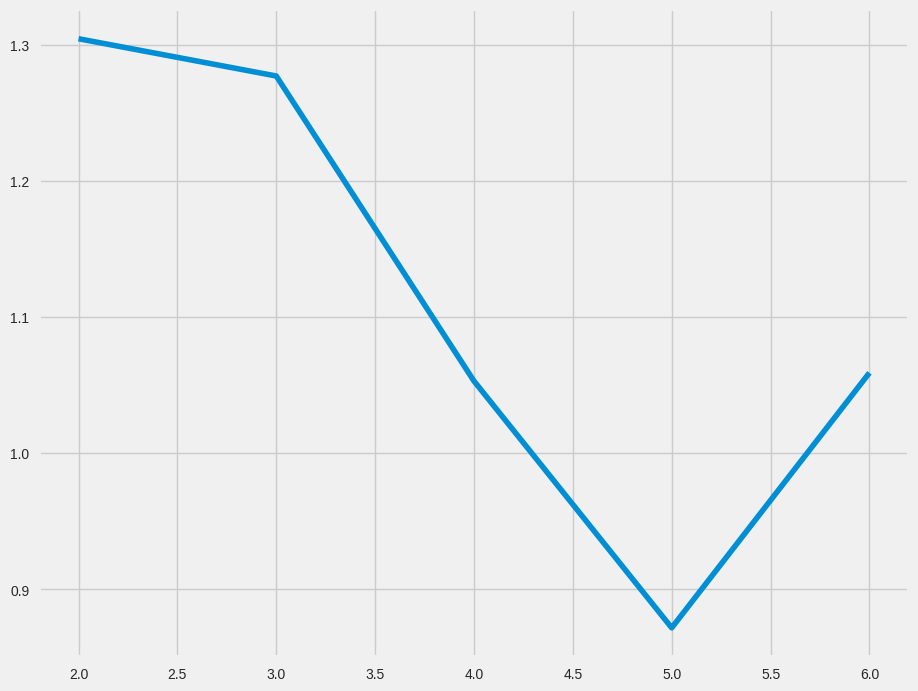

In [ ]:
from sklearn.metrics import davies_bouldin_score
db = []
for i in range(2,7):
    modelKM = KMeans(n_clusters = i)
    modelKM.fit(df_scaled)
    db.append(davies_bouldin_score(df_scaled, modelKM.labels_))
plt.plot(range(2,7), db)

Conclusion for scaled data-->From Elbow method , Silhoutee coeffiecient and Davis Bouldin Score, we can conclude that the optimal number of clusters for the data is 4.

ii)K-means on scaled data

In [ ]:
km_scaled = KMeans (
    n_clusters = 4, # number of clusters/centroids to create
    init = 'random', # ‘random’: choose n_clusters observations (rows) at random from data for the initial centroids
    n_init = 10, # this is the default value. This is the number of times the k-means algorithm will be run with different centroid seeds
    max_iter = 300, # this is the default value. This is the maximum number of iterations of the k-means algorithm for a single run.
    tol = 1e-4, # this is the default value. This is the relative tolerance with regards to Frobenius norm of the difference in the cluster centers of two consecutive iterations to declare convergence.
    random_state = 0 # this is the default value. Determines random number generation for centroid initialization. Use an int to make the randomness deterministic.
)


In [ ]:
# method to compute the clusters and assign the labels
y_predicted_scaled_kmeans = km_scaled.fit_predict(df_scaled)
y_predicted_scaled_kmeans

array([0, 2, 2, 0, 2, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 3, 2, 0, 2, 2, 2, 0,
       2, 1, 2, 0, 0, 2, 0, 3, 2, 0, 0, 2, 2, 2, 0, 0, 0, 2, 0, 2, 2, 2,
       3, 2, 2, 2, 2, 0, 0, 2, 2, 3, 3, 0, 0, 2, 3, 0, 3, 2, 2, 0, 0, 2,
       0, 2, 3, 2, 2, 2, 0, 1, 3, 3, 2, 3, 2, 2, 0, 0, 1, 2, 0, 2, 2, 0,
       0, 2, 2, 1, 2, 0, 0, 2, 2, 0, 1, 0, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2,
       3, 3, 0, 0, 3, 2, 0, 2, 2, 2, 2, 2, 3, 1, 2, 2, 0, 2, 2, 0, 2, 2,
       0, 1, 2, 3, 2, 0, 2, 3, 2, 2, 0, 2, 3, 3, 2, 0, 2, 0, 0, 2, 2, 2,
       2, 0, 2, 1, 3, 3, 2, 2, 2, 2, 2, 0, 0], dtype=int32)

In [ ]:
# add the cluster column to the dataframe
scaled_data_with_final_cluster = pd.concat([df['country'], df_scaled], axis=1)
scaled_data_with_final_cluster['sub_clusters_scaled_kmeans'] = y_predicted_scaled_kmeans
scaled_data_with_final_cluster.head()

country  child_mort   exports    health   imports    income  \
0          Afghanistan    1.291532 -1.138280  0.279088 -0.082455 -0.808245   
1              Albania   -0.538949 -0.479658 -0.097016  0.070837 -0.375369   
2              Algeria   -0.272833 -0.099122 -0.966073 -0.641762 -0.220844   
3               Angola    2.007808  0.775381 -1.448071 -0.165315 -0.585043   
4  Antigua and Barbuda   -0.695634  0.160668 -0.286894  0.497568  0.101732   

   inflation  life_expec  total_fer      gdpp  sub_clusters_scaled_kmeans  
0   0.157336   -1.619092   1.902882 -0.679180                           0  
1  -0.312347    0.647866  -0.859973 -0.485623                           2  
2   0.789274    0.670423  -0.038404 -0.465376                           2  
3   1.387054   -1.179234   2.128151 -0.516268                           0  
4  -0.601749    0.704258  -0.541946 -0.041817                           2

In [ ]:
y_predicted_scaled_kmeans = pd.Series(km_scaled.labels_)
print(pd.concat({"count" : y_predicted_scaled_kmeans.value_counts(),"Percent" : round(y_predicted_scaled_kmeans.value_counts(normalize = True)*100, 2)}, axis = 1))

   count  Percent
2     88    52.69
0     48    28.74
3     23    13.77
1      8     4.79


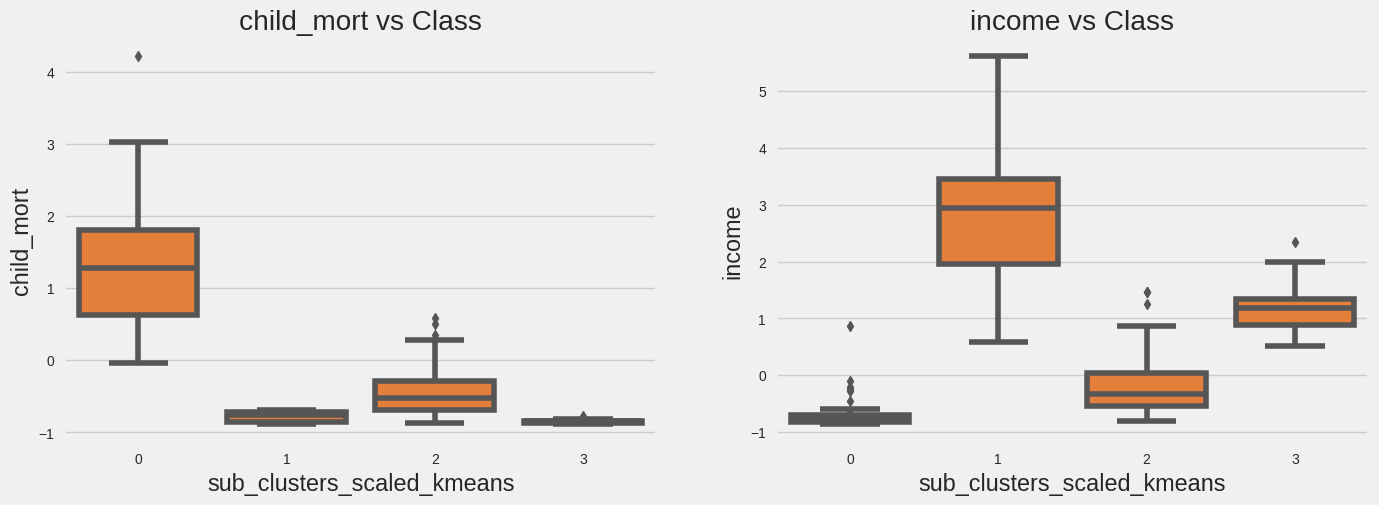

In [ ]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

plt.subplot(1,2,1)
sns.boxplot(x = 'sub_clusters_scaled_kmeans', y = 'child_mort', data  = scaled_data_with_final_cluster, color = '#FF781F');
plt.title('child_mort vs Class')

plt.subplot(1,2,2)
sns.boxplot(x = 'sub_clusters_scaled_kmeans', y = 'income', data  = scaled_data_with_final_cluster, color = '#FF781F');
plt.title('income vs Class')
plt.show()

Text(0.5, 1.0, 'gdp vs Class')

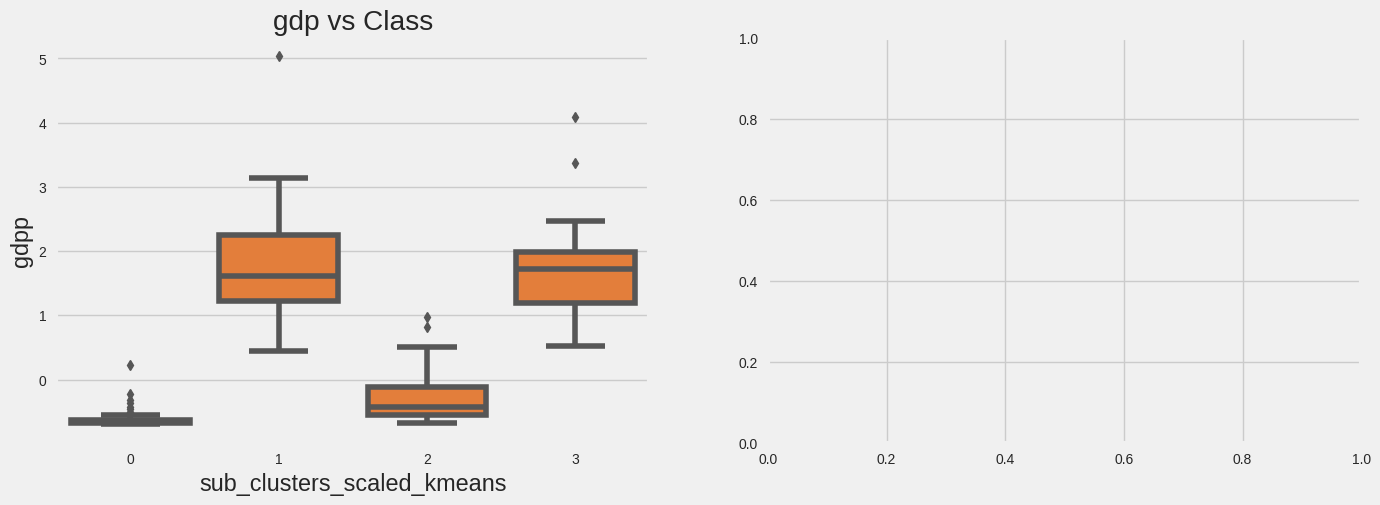

In [ ]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

plt.subplot(1,2,1)
sns.boxplot(x = 'sub_clusters_scaled_kmeans', y = 'gdpp', data  = scaled_data_with_final_cluster, color = '#FF781F');
plt.title('gdp vs Class')

In [ ]:
from statistics import mean

scaled_cluster_kmeans_gdp_avg_list=[]
pca_cluster_0_kmeans = scaled_data_with_final_cluster[scaled_data_with_final_cluster.sub_clusters_scaled_kmeans == 0]
kmeans_cluster_0_gdp=np.array(pca_cluster_0_kmeans.gdpp)
pca_avg_gdp_cluster_0_kmeans = mean(kmeans_cluster_0_gdp)
scaled_cluster_kmeans_gdp_avg_list.append(pca_avg_gdp_cluster_0_kmeans)
print("Average GDP of Cluster_0 :",pca_avg_gdp_cluster_0_kmeans)


pca_cluster_1_kmeans = scaled_data_with_final_cluster[scaled_data_with_final_cluster.sub_clusters_scaled_kmeans == 1]
kmeans_cluster_1_gdp=np.array(pca_cluster_1_kmeans.gdpp)
pca_avg_gdp_cluster_1_kmeans = mean(kmeans_cluster_1_gdp)
scaled_cluster_kmeans_gdp_avg_list.append(pca_avg_gdp_cluster_1_kmeans)
print("Average GDP of Cluster_1 :",pca_avg_gdp_cluster_1_kmeans)

pca_cluster_2_kmeans = scaled_data_with_final_cluster[scaled_data_with_final_cluster.sub_clusters_scaled_kmeans == 2]
kmeans_cluster_2_gdp=np.array(pca_cluster_2_kmeans.gdpp)
pca_avg_gdp_cluster_2_kmeans = mean(kmeans_cluster_2_gdp)
scaled_cluster_kmeans_gdp_avg_list.append(pca_avg_gdp_cluster_2_kmeans)
print("Average GDP of Cluster_2 :",pca_avg_gdp_cluster_2_kmeans)

pca_cluster_3_kmeans = scaled_data_with_final_cluster[scaled_data_with_final_cluster.sub_clusters_scaled_kmeans == 3]
kmeans_cluster_3_gdp=np.array(pca_cluster_3_kmeans.gdpp)
pca_avg_gdp_cluster_3_kmeans = mean(kmeans_cluster_3_gdp)
scaled_cluster_kmeans_gdp_avg_list.append(pca_avg_gdp_cluster_3_kmeans)
print("Average GDP of Cluster_3 :",pca_avg_gdp_cluster_3_kmeans)
print("Average_GDP_KMEans :",scaled_cluster_kmeans_gdp_avg_list)

Average GDP of Cluster_0 : -0.6053076907046261
Average GDP of Cluster_1 : 2.0301444602644274
Average GDP of Cluster_2 : -0.30282621362315115
Average GDP of Cluster_3 : 1.715753055241041
Average_GDP_KMEans : [-0.6053076907046261, 2.0301444602644274, -0.30282621362315115, 1.715753055241041]


In [ ]:
cluster_asssignment_scaled_kmeans=(cluster_assignment_length_4(scaled_cluster_kmeans_gdp_avg_list))
print(cluster_asssignment_scaled_kmeans)

{1: 'No Help Needed', 3: 'No Help Needed', 2: 'Might Need Help', 0: 'Help Needed'}


Visualization

In [ ]:
for cluster_num in range (4):
  scaled_data_with_final_cluster['sub_clusters_scaled_kmeans'].iloc[scaled_data_with_final_cluster['sub_clusters_scaled_kmeans'] == cluster_num] = cluster_asssignment_scaled_kmeans[cluster_num]

fig = px.choropleth(scaled_data_with_final_cluster[['country','sub_clusters_scaled_kmeans']],
                    locationmode = 'country names',
                    locations = 'country',
                    title = 'Needed Help Per Country (World)',
                    color = scaled_data_with_final_cluster['sub_clusters_scaled_kmeans'],
                    color_discrete_map = {'Help Needed':'Red',
                                        'No Help Needed':'Green',
                                        'Might Need Help':'Yellow'
                                        }
                   )
fig.update_geos(fitbounds = "locations", visible = True)
fig.update_layout(legend_title_text = 'Labels',legend_title_side = 'top',title_pad_l = 260,title_y = 0.86)
fig.show(engine = 'kaleido')

In [ ]:
Needy_scaled_kmeans = scaled_data_with_final_cluster[scaled_data_with_final_cluster.sub_clusters_scaled_kmeans == 'Help Needed']
Needy_scaled_kmeans.country

0                   Afghanistan
3                        Angola
17                        Benin
21                     Botswana
25                 Burkina Faso
26                      Burundi
28                     Cameroon
31     Central African Republic
32                         Chad
36                      Comoros
37             Congo, Dem. Rep.
38                  Congo, Rep.
40                Cote d'Ivoire
49            Equatorial Guinea
50                      Eritrea
55                        Gabon
56                       Gambia
59                        Ghana
63                       Guinea
64                Guinea-Bissau
66                        Haiti
72                         Iraq
80                        Kenya
81                     Kiribati
84                          Lao
87                      Lesotho
88                      Liberia
93                   Madagascar
94                       Malawi
97                         Mali
99                   Mauritania
106     

In [ ]:
Needy_scaled_kmeans = scaled_data_with_final_cluster[scaled_data_with_final_cluster.sub_clusters_scaled_kmeans == 'Help Needed']
Help_Needed_Countries_kmeans_scaled=np.array(Needy_scaled_kmeans.country)
print(Help_Needed_Countries_kmeans_scaled)

['Afghanistan' 'Angola' 'Benin' 'Botswana' 'Burkina Faso' 'Burundi'
 'Cameroon' 'Central African Republic' 'Chad' 'Comoros' 'Congo, Dem. Rep.'
 'Congo, Rep.' "Cote d'Ivoire" 'Equatorial Guinea' 'Eritrea' 'Gabon'
 'Gambia' 'Ghana' 'Guinea' 'Guinea-Bissau' 'Haiti' 'Iraq' 'Kenya'
 'Kiribati' 'Lao' 'Lesotho' 'Liberia' 'Madagascar' 'Malawi' 'Mali'
 'Mauritania' 'Mozambique' 'Myanmar' 'Namibia' 'Niger' 'Nigeria'
 'Pakistan' 'Rwanda' 'Senegal' 'Sierra Leone' 'South Africa' 'Sudan'
 'Tanzania' 'Timor-Leste' 'Togo' 'Uganda' 'Yemen' 'Zambia']


In [ ]:
Dict_scaled_Help_Needed={}

In [ ]:
Dict_with_cnt_of_needed_countries(Dict_scaled_Help_Needed,Help_Needed_Countries_kmeans_scaled)
print(Dict_scaled_Help_Needed)

{'Afghanistan': 1, 'Angola': 1, 'Benin': 1, 'Botswana': 1, 'Burkina Faso': 1, 'Burundi': 1, 'Cameroon': 1, 'Central African Republic': 1, 'Chad': 1, 'Comoros': 1, 'Congo, Dem. Rep.': 1, 'Congo, Rep.': 1, "Cote d'Ivoire": 1, 'Equatorial Guinea': 1, 'Eritrea': 1, 'Gabon': 1, 'Gambia': 1, 'Ghana': 1, 'Guinea': 1, 'Guinea-Bissau': 1, 'Haiti': 1, 'Iraq': 1, 'Kenya': 1, 'Kiribati': 1, 'Lao': 1, 'Lesotho': 1, 'Liberia': 1, 'Madagascar': 1, 'Malawi': 1, 'Mali': 1, 'Mauritania': 1, 'Mozambique': 1, 'Myanmar': 1, 'Namibia': 1, 'Niger': 1, 'Nigeria': 1, 'Pakistan': 1, 'Rwanda': 1, 'Senegal': 1, 'Sierra Leone': 1, 'South Africa': 1, 'Sudan': 1, 'Tanzania': 1, 'Timor-Leste': 1, 'Togo': 1, 'Uganda': 1, 'Yemen': 1, 'Zambia': 1}


# Method 2  : Hierarchical Clustering

# i) On PCA data

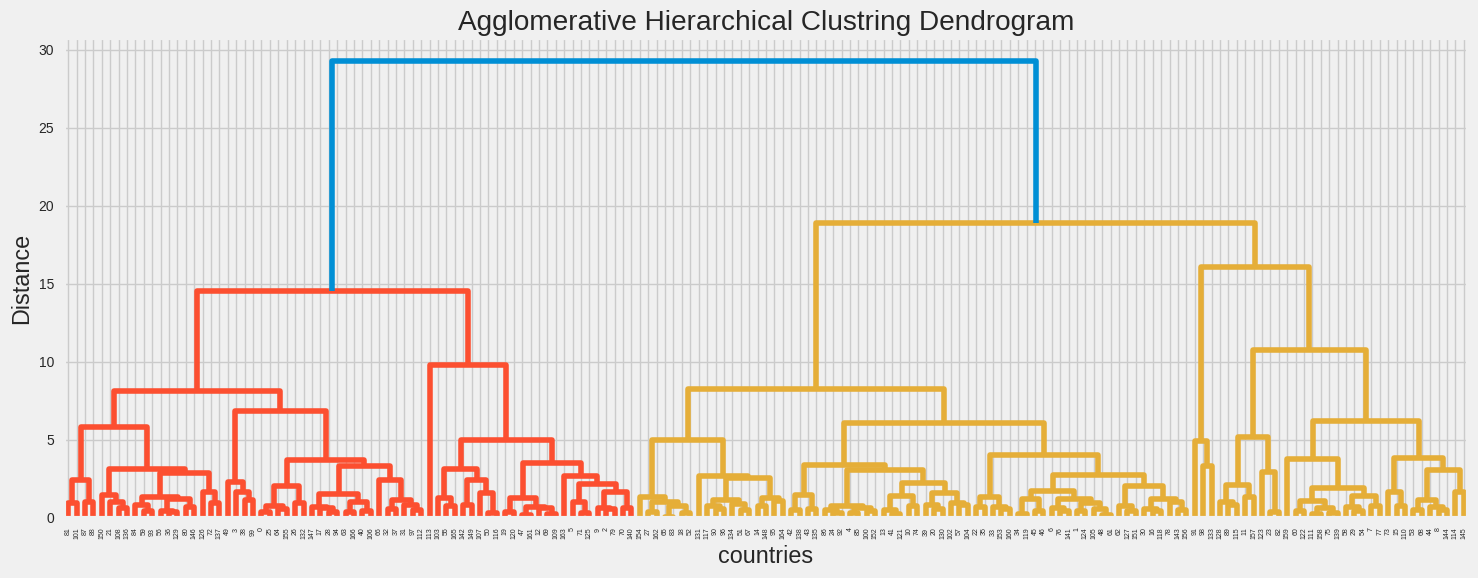

In [ ]:
from scipy.cluster.hierarchy import linkage, cophenet, dendrogram
from scipy.spatial.distance import pdist

link = linkage(data_pca_selected, metric = 'euclidean', method = 'ward')
c, coph_dist = cophenet(link, pdist(data_pca_selected))

plt.figure(figsize = (15,6))
plt.title('Agglomerative Hierarchical Clustring Dendrogram')
plt.xlabel('countries')
plt.ylabel('Distance')
dendrogram(link)
plt.tight_layout()

In [ ]:
from sklearn.cluster import AgglomerativeClustering as agc

model_AGC_pca = agc(n_clusters = 4, metric = 'euclidean', linkage = 'ward')
model_AGC_pca.fit(data_pca_selected)
pred_AGC_pca = pd.Series(model_AGC_pca.labels_)
print(pd.concat({'count' : pred_AGC_pca.value_counts(), 'percent' : round(pred_AGC_pca.value_counts(normalize = True)*100, 2)}, axis = 1 ))

   count  percent
0     68    40.72
2     66    39.52
1     30    17.96
3      3     1.80


In [ ]:
pred_AGC_pca = pd.DataFrame(np.array(pred_AGC_pca), columns = ["cluster_pca_Hirarchial"])
print(pred_AGC_pca)

     cluster_pca_Hirarchial
0                         0
1                         2
2                         0
3                         0
4                         2
..                      ...
162                       2
163                       0
164                       2
165                       0
166                       0

[167 rows x 1 columns]


In [ ]:
pca_data_with_final_cluster = pd.concat([pca_data_with_final_cluster,pred_AGC_pca], axis=1)
print(pca_data_with_final_cluster)

                 country  child_mort  exports  health  imports  income  \
0            Afghanistan        90.2     10.0    7.58     44.9    1610   
1                Albania        16.6     28.0    6.55     48.6    9930   
2                Algeria        27.3     38.4    4.17     31.4   12900   
3                 Angola       119.0     62.3    2.85     42.9    5900   
4    Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   
..                   ...         ...      ...     ...      ...     ...   
162              Vanuatu        29.2     46.6    5.25     52.7    2950   
163            Venezuela        17.1     28.5    4.91     17.6   16500   
164              Vietnam        23.3     72.0    6.84     80.2    4490   
165                Yemen        56.3     30.0    5.18     34.4    4480   
166               Zambia        83.1     37.0    5.89     30.9    3280   

     inflation  life_expec  total_fer   gdpp       PC1       PC2       PC3  \
0         9.44        56.2       

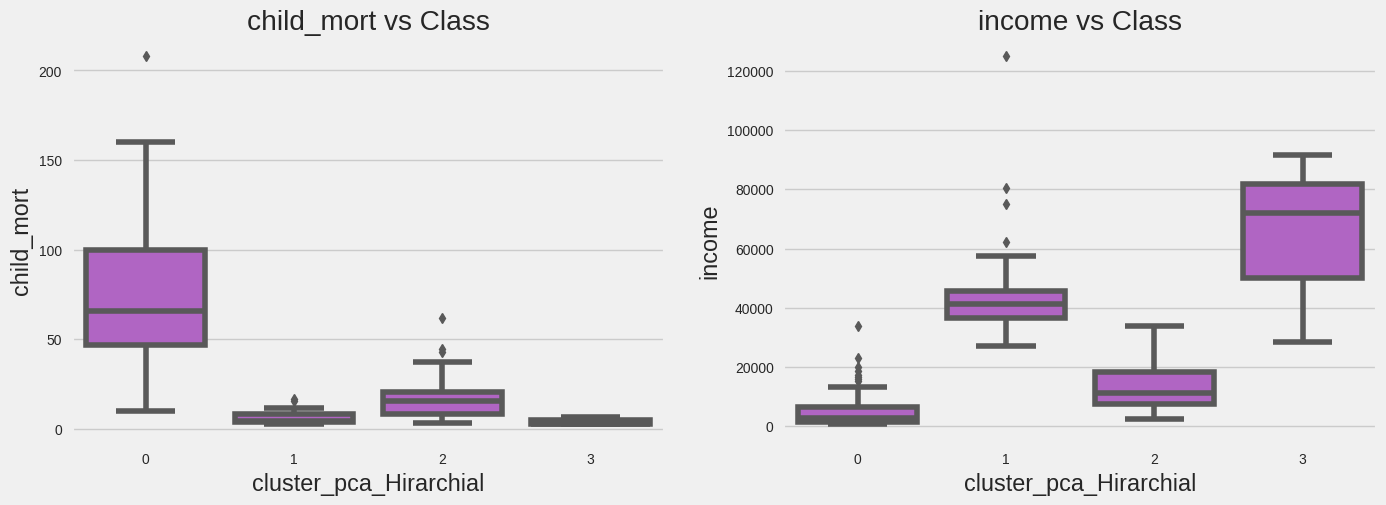

In [ ]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

plt.subplot(1,2,1)
sns.boxplot(x = 'cluster_pca_Hirarchial', y = 'child_mort', data  = pca_data_with_final_cluster, color = '#BA55D3');
plt.title('child_mort vs Class')

plt.subplot(1,2,2)
sns.boxplot(x = 'cluster_pca_Hirarchial', y = 'income', data  = pca_data_with_final_cluster, color = '#BA55D3');
plt.title('income vs Class')
plt.show()

Text(0.5, 1.0, 'gdp vs Class')

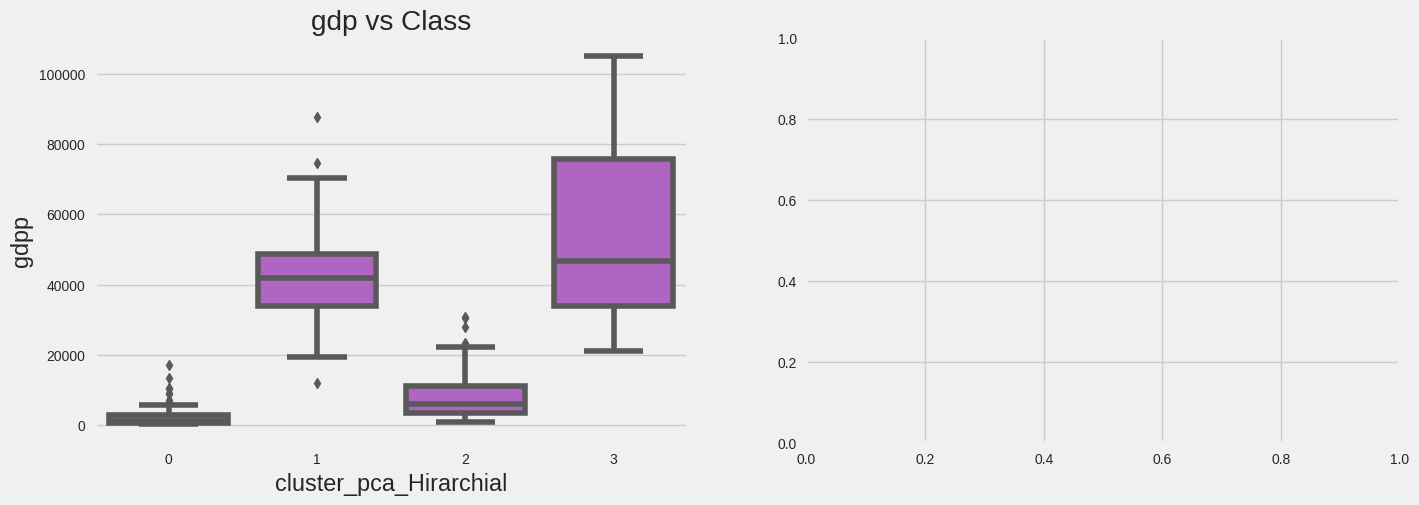

In [ ]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

plt.subplot(1,2,1)
sns.boxplot(x = 'cluster_pca_Hirarchial', y = 'gdpp', data  = pca_data_with_final_cluster, color = '#BA55D3');
plt.title('gdp vs Class')

In [ ]:
from statistics import mean

pca_cluster_gdp_avg_list=[]
pca_cluster = pca_data_with_final_cluster[pca_data_with_final_cluster.cluster_pca_Hirarchial == 0]
cluster_0=np.array(pca_cluster.gdpp)
pca_avg_gdp_cluster_0 = mean(cluster_0)
pca_cluster_gdp_avg_list.append(pca_avg_gdp_cluster_0)
print("Average GDP of Cluster_0 :",pca_avg_gdp_cluster_0)


pca_cluster = pca_data_with_final_cluster[pca_data_with_final_cluster.cluster_pca_Hirarchial == 1]
cluster_1=np.array(pca_cluster.gdpp)
pca_avg_gdp_cluster_1 = mean(cluster_1)
pca_cluster_gdp_avg_list.append(pca_avg_gdp_cluster_1)
print("Average GDP of Cluster_1 :",pca_avg_gdp_cluster_1)

pca_cluster = pca_data_with_final_cluster[pca_data_with_final_cluster.cluster_pca_Hirarchial == 2]
cluster_2=np.array(pca_cluster.gdpp)
pca_avg_gdp_cluster_2 = mean(cluster_2)
pca_cluster_gdp_avg_list.append(pca_avg_gdp_cluster_2)
print("Average GDP of Cluster_2 :",pca_avg_gdp_cluster_2)

pca_cluster = pca_data_with_final_cluster[pca_data_with_final_cluster.cluster_pca_Hirarchial == 3]
cluster_3=np.array(pca_cluster.gdpp)
pca_avg_gdp_cluster_3 = mean(cluster_3)
pca_cluster_gdp_avg_list.append(pca_avg_gdp_cluster_3)
print("Average GDP of Cluster_3 :",pca_avg_gdp_cluster_3)

print("Average_GDP :",pca_cluster_gdp_avg_list)

Average GDP of Cluster_0 : 2588
Average GDP of Cluster_1 : 42150
Average GDP of Cluster_2 : 8361
Average GDP of Cluster_3 : 57566
Average_GDP : [2588, 42150, 8361, 57566]


In [ ]:
cluster_asssignment_pca=(cluster_assignment_length_4(pca_cluster_gdp_avg_list))
print(cluster_asssignment_pca)

{3: 'No Help Needed', 1: 'No Help Needed', 2: 'Might Need Help', 0: 'Help Needed'}


In [ ]:
for cluster_num in range (4):
  pca_data_with_final_cluster['cluster_pca_Hirarchial'].iloc[pca_data_with_final_cluster['cluster_pca_Hirarchial'] == cluster_num] = cluster_asssignment_pca[cluster_num]

fig = px.choropleth(pca_data_with_final_cluster[['country','cluster_pca_Hirarchial']],
                    locationmode = 'country names',
                    locations = 'country',
                    title = 'Needed Help Per Country (World)',
                    color = pca_data_with_final_cluster['cluster_pca_Hirarchial'],
                    color_discrete_map = {'Help Needed':'Red',
                                        'No Help Needed':'Green',
                                        'Might Need Help':'Yellow'
                                        }
                   )
fig.update_geos(fitbounds = "locations", visible = True)
fig.update_layout(legend_title_text = 'Labels',legend_title_side = 'top',title_pad_l = 260,title_y = 0.86)
fig.show(engine = 'kaleido')

In [ ]:
Needy_pca_hirarchial = pca_data_with_final_cluster[pca_data_with_final_cluster.cluster_pca_Hirarchial == 'Help Needed']
Help_Needed_Countries_hirarchial=np.array(Needy_pca_hirarchial.country)
print(Help_Needed_Countries_hirarchial)

['Afghanistan' 'Algeria' 'Angola' 'Argentina' 'Azerbaijan' 'Bangladesh'
 'Benin' 'Bolivia' 'Botswana' 'Burkina Faso' 'Burundi' 'Cameroon'
 'Central African Republic' 'Chad' 'Comoros' 'Congo, Dem. Rep.'
 'Congo, Rep.' "Cote d'Ivoire" 'Egypt' 'Equatorial Guinea' 'Eritrea'
 'Gabon' 'Gambia' 'Ghana' 'Guinea' 'Guinea-Bissau' 'Haiti' 'India'
 'Indonesia' 'Iran' 'Iraq' 'Kazakhstan' 'Kenya' 'Kiribati' 'Lao' 'Lesotho'
 'Liberia' 'Madagascar' 'Malawi' 'Mali' 'Mauritania'
 'Micronesia, Fed. Sts.' 'Mongolia' 'Mozambique' 'Myanmar' 'Namibia'
 'Nepal' 'Niger' 'Nigeria' 'Pakistan' 'Philippines' 'Russia' 'Rwanda'
 'Senegal' 'Sierra Leone' 'Solomon Islands' 'South Africa' 'Sri Lanka'
 'Sudan' 'Tajikistan' 'Tanzania' 'Timor-Leste' 'Togo' 'Uganda'
 'Uzbekistan' 'Venezuela' 'Yemen' 'Zambia']


In [ ]:
Dict_with_cnt_of_needed_countries(Dict_pca_Help_Needed,Help_Needed_Countries_hirarchial)
print(Dict_pca_Help_Needed)

{'Afghanistan': 2, 'Angola': 2, 'Benin': 2, 'Botswana': 2, 'Burkina Faso': 2, 'Burundi': 2, 'Cameroon': 2, 'Central African Republic': 2, 'Chad': 2, 'Comoros': 2, 'Congo, Dem. Rep.': 2, 'Congo, Rep.': 2, "Cote d'Ivoire": 2, 'Equatorial Guinea': 2, 'Eritrea': 2, 'Gabon': 2, 'Gambia': 2, 'Ghana': 2, 'Guinea': 2, 'Guinea-Bissau': 2, 'Haiti': 2, 'Iraq': 2, 'Kenya': 2, 'Kiribati': 2, 'Lao': 2, 'Lesotho': 2, 'Liberia': 2, 'Madagascar': 2, 'Malawi': 2, 'Mali': 2, 'Mauritania': 2, 'Micronesia, Fed. Sts.': 2, 'Mozambique': 2, 'Namibia': 2, 'Niger': 2, 'Nigeria': 2, 'Pakistan': 2, 'Rwanda': 2, 'Senegal': 2, 'Sierra Leone': 2, 'Solomon Islands': 2, 'South Africa': 2, 'Sudan': 2, 'Tanzania': 2, 'Timor-Leste': 2, 'Togo': 2, 'Uganda': 2, 'Yemen': 2, 'Zambia': 2, 'Algeria': 1, 'Argentina': 1, 'Azerbaijan': 1, 'Bangladesh': 1, 'Bolivia': 1, 'Egypt': 1, 'India': 1, 'Indonesia': 1, 'Iran': 1, 'Kazakhstan': 1, 'Mongolia': 1, 'Myanmar': 1, 'Nepal': 1, 'Philippines': 1, 'Russia': 1, 'Sri Lanka': 1, 'Tajiki

#ii) On scaled data

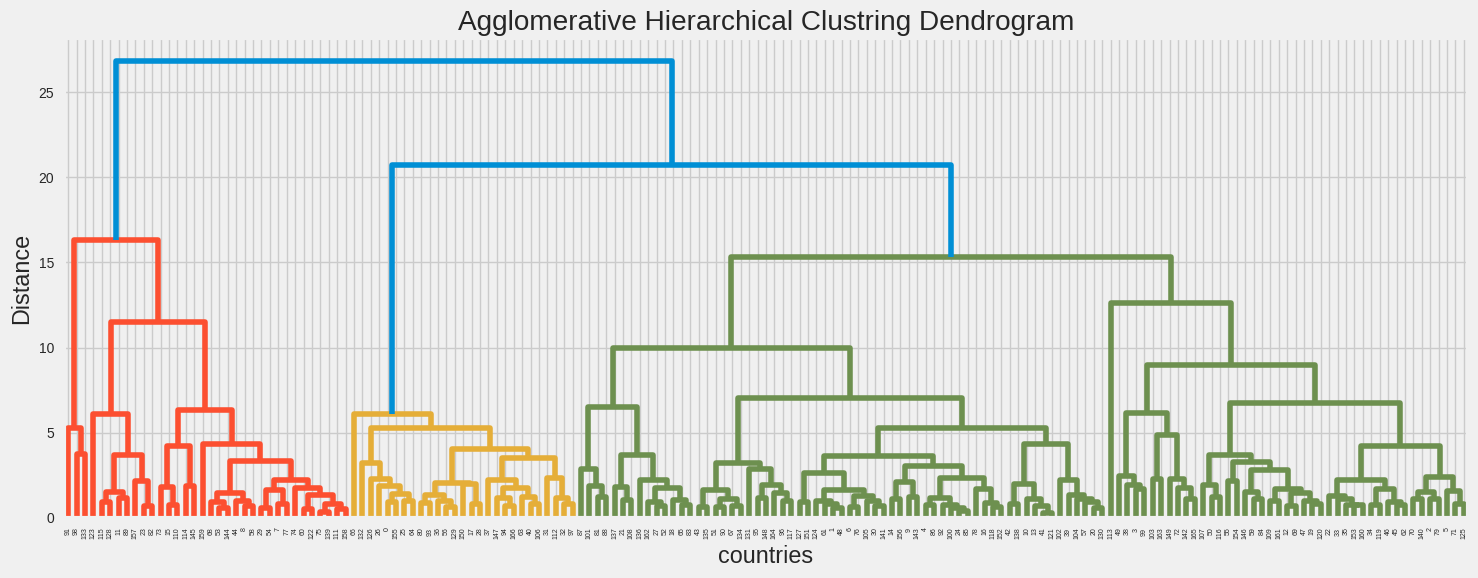

In [ ]:
from scipy.cluster.hierarchy import linkage, cophenet, dendrogram
from scipy.spatial.distance import pdist

link = linkage(df_scaled, metric = 'euclidean', method = 'ward')
c, coph_dist = cophenet(link, pdist(df_scaled))

plt.figure(figsize = (15,6))
plt.title('Agglomerative Hierarchical Clustring Dendrogram')
plt.xlabel('countries')
plt.ylabel('Distance')
dendrogram(link)
plt.tight_layout()

Finding from above diagram -->optimal number of clusters=4

In [ ]:
from sklearn.cluster import AgglomerativeClustering as agc

model_AGC_scaled = agc(n_clusters = 4, metric = 'euclidean', linkage = 'ward')
model_AGC_scaled.fit(df_scaled)
pred_AGC_scaled = pd.Series(model_AGC_scaled.labels_)
print(pd.concat({'count' : pred_AGC_scaled.value_counts(), 'percent' : round(pred_AGC_scaled.value_counts(normalize = True)*100, 2)}, axis = 1 ))

   count  percent
0    106    63.47
1     31    18.56
2     27    16.17
3      3     1.80


In [ ]:
pred_AGC_scaled = pd.DataFrame(np.array(pred_AGC_scaled), columns = ["cluster_scaled_Hirarchial"])
print(pred_AGC_scaled)

     cluster_scaled_Hirarchial
0                            2
1                            0
2                            0
3                            0
4                            0
..                         ...
162                          0
163                          0
164                          0
165                          0
166                          2

[167 rows x 1 columns]


In [ ]:
scaled_data_with_final_cluster = pd.concat([scaled_data_with_final_cluster,pred_AGC_scaled], axis=1)
print(scaled_data_with_final_cluster)

                 country  child_mort   exports    health   imports    income  \
0            Afghanistan    1.291532 -1.138280  0.279088 -0.082455 -0.808245   
1                Albania   -0.538949 -0.479658 -0.097016  0.070837 -0.375369   
2                Algeria   -0.272833 -0.099122 -0.966073 -0.641762 -0.220844   
3                 Angola    2.007808  0.775381 -1.448071 -0.165315 -0.585043   
4    Antigua and Barbuda   -0.695634  0.160668 -0.286894  0.497568  0.101732   
..                   ...         ...       ...       ...       ...       ...   
162              Vanuatu   -0.225578  0.200917 -0.571711  0.240700 -0.738527   
163            Venezuela   -0.526514 -0.461363 -0.695862 -1.213499 -0.033542   
164              Vietnam   -0.372315  1.130305  0.008877  1.380030 -0.658404   
165                Yemen    0.448417 -0.406478 -0.597272 -0.517472 -0.658924   
166               Zambia    1.114951 -0.150348 -0.338015 -0.662477 -0.721358   

     inflation  life_expec  total_fer  

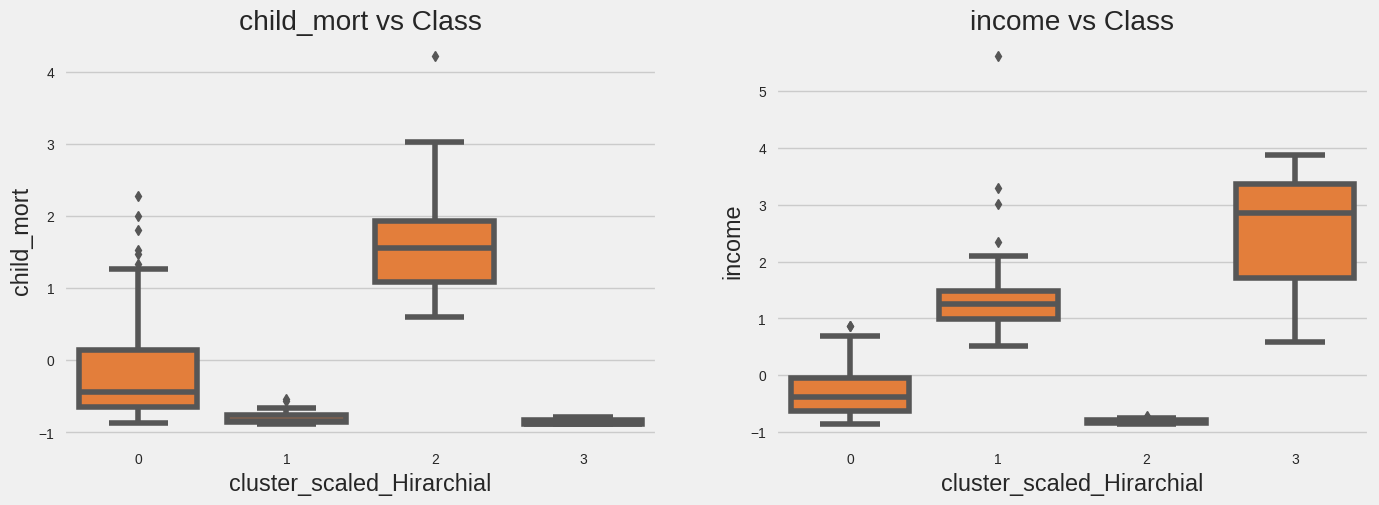

In [ ]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

plt.subplot(1,2,1)
sns.boxplot(x = 'cluster_scaled_Hirarchial', y = 'child_mort', data  = scaled_data_with_final_cluster, color = '#FF781F');
plt.title('child_mort vs Class')

plt.subplot(1,2,2)
sns.boxplot(x = 'cluster_scaled_Hirarchial', y = 'income', data  = scaled_data_with_final_cluster, color = '#FF781F');
plt.title('income vs Class')
plt.show()

Text(0.5, 1.0, 'gdp vs Class')

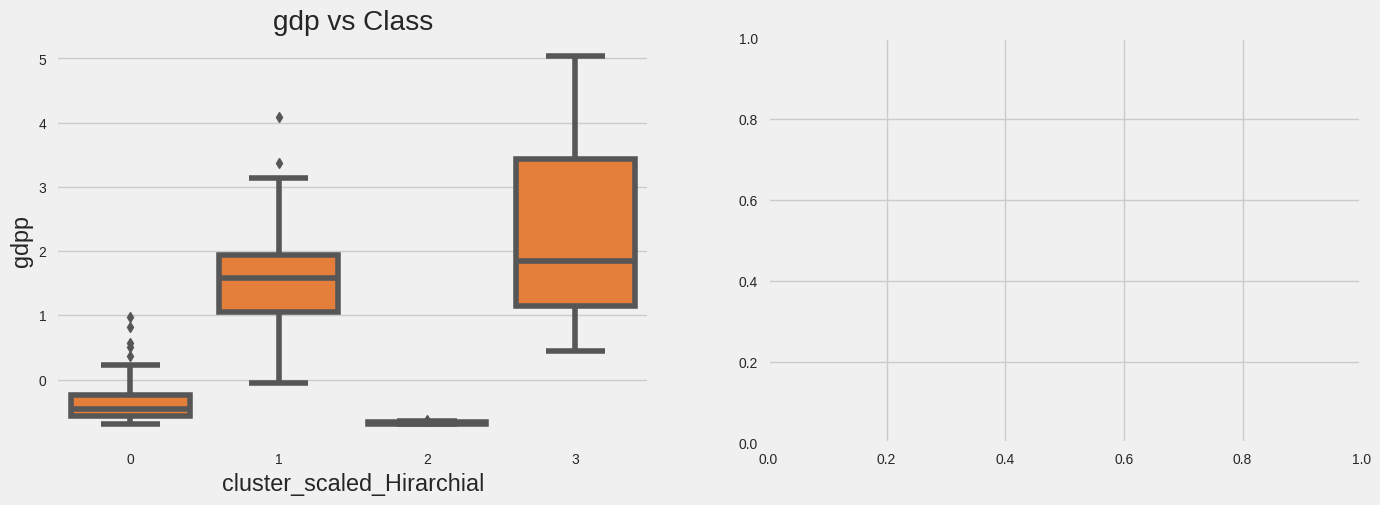

In [ ]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

plt.subplot(1,2,1)
sns.boxplot(x = 'cluster_scaled_Hirarchial', y = 'gdpp', data  = scaled_data_with_final_cluster, color = '#FF781F');
plt.title('gdp vs Class')

In [ ]:
from statistics import mean

scaled_cluster_gdp_avg_list=[]
scaled_cluster_0 = scaled_data_with_final_cluster[scaled_data_with_final_cluster.cluster_scaled_Hirarchial == 0]
cluster_0_gdp=np.array(scaled_cluster_0.gdpp)
scaled_avg_gdp_cluster_0 = mean(cluster_0_gdp)
scaled_cluster_gdp_avg_list.append(scaled_avg_gdp_cluster_0)
print("Average GDP of Cluster_0 :",scaled_avg_gdp_cluster_0)


scaled_cluster_1 = scaled_data_with_final_cluster[scaled_data_with_final_cluster.cluster_scaled_Hirarchial == 1]
cluster_1_gdp=np.array(scaled_cluster_1.gdpp)
scaled_avg_gdp_cluster_1 = mean(cluster_1_gdp)
scaled_cluster_gdp_avg_list.append(scaled_avg_gdp_cluster_1)
print("Average GDP of Cluster_1 :",scaled_avg_gdp_cluster_1)

scaled_cluster_2 = scaled_data_with_final_cluster[scaled_data_with_final_cluster.cluster_scaled_Hirarchial == 2]
cluster_2_gdp=np.array(scaled_cluster_2.gdpp)
scaled_avg_gdp_cluster_2 = mean(cluster_2_gdp)
scaled_cluster_gdp_avg_list.append(scaled_avg_gdp_cluster_2)
print("Average GDP of Cluster_2 :",scaled_avg_gdp_cluster_2)

scaled_cluster_3 = scaled_data_with_final_cluster[scaled_data_with_final_cluster.cluster_scaled_Hirarchial == 3]
cluster_3_gdp=np.array(scaled_cluster_3.gdpp)
scaled_avg_gdp_cluster_3= mean(cluster_3_gdp)
scaled_cluster_gdp_avg_list.append(scaled_avg_gdp_cluster_3)
print("Average GDP of Cluster_3 :",scaled_avg_gdp_cluster_3)
print("Average_GDP :",scaled_cluster_gdp_avg_list)

Average GDP of Cluster_0 : -0.3588091760829249
Average GDP of Cluster_1 : 1.5767573647799553
Average GDP of Cluster_2 : -0.6728925074361727
Average GDP of Cluster_3 : 2.440797352462698
Average_GDP : [-0.3588091760829249, 1.5767573647799553, -0.6728925074361727, 2.440797352462698]


In [ ]:
cluster_asssignment_scaled=(cluster_assignment_length_4(scaled_cluster_gdp_avg_list))
print(cluster_asssignment_scaled)

{3: 'No Help Needed', 1: 'No Help Needed', 0: 'Might Need Help', 2: 'Help Needed'}


In [ ]:
for cluster_num in range (4):
  scaled_data_with_final_cluster['cluster_scaled_Hirarchial'].iloc[scaled_data_with_final_cluster['cluster_scaled_Hirarchial'] == cluster_num] = cluster_asssignment_scaled[cluster_num]

fig = px.choropleth(scaled_data_with_final_cluster[['country','cluster_scaled_Hirarchial']],
                    locationmode = 'country names',
                    locations = 'country',
                    title = 'Needed Help Per Country (World)',
                    color = scaled_data_with_final_cluster['cluster_scaled_Hirarchial'],
                    color_discrete_map = {'Help Needed':'Red',
                                        'No Help Needed':'Green',
                                        'Might Need Help':'Yellow'
                                        }
                   )
fig.update_geos(fitbounds = "locations", visible = True)
fig.update_layout(legend_title_text = 'Labels',legend_title_side = 'top',title_pad_l = 260,title_y = 0.86)
fig.show(engine = 'kaleido')

In [ ]:
Needy_scaled_Hirarchial = scaled_data_with_final_cluster[scaled_data_with_final_cluster.cluster_scaled_Hirarchial == 'Help Needed']
Help_Needed_Countries_hirarchial_scaled=np.array(Needy_scaled_Hirarchial.country)
print(Help_Needed_Countries_hirarchial_scaled)

['Afghanistan' 'Benin' 'Burkina Faso' 'Burundi' 'Cameroon'
 'Central African Republic' 'Chad' 'Comoros' 'Congo, Dem. Rep.'
 "Cote d'Ivoire" 'Gambia' 'Guinea' 'Guinea-Bissau' 'Haiti' 'Kenya'
 'Madagascar' 'Malawi' 'Mali' 'Mozambique' 'Niger' 'Rwanda' 'Senegal'
 'Sierra Leone' 'Tanzania' 'Togo' 'Uganda' 'Zambia']


In [ ]:
Dict_with_cnt_of_needed_countries(Dict_scaled_Help_Needed,Help_Needed_Countries_hirarchial_scaled)
print(Dict_scaled_Help_Needed)

{'Afghanistan': 2, 'Angola': 1, 'Benin': 2, 'Botswana': 1, 'Burkina Faso': 2, 'Burundi': 2, 'Cameroon': 2, 'Central African Republic': 2, 'Chad': 2, 'Comoros': 2, 'Congo, Dem. Rep.': 2, 'Congo, Rep.': 1, "Cote d'Ivoire": 2, 'Equatorial Guinea': 1, 'Eritrea': 1, 'Gabon': 1, 'Gambia': 2, 'Ghana': 1, 'Guinea': 2, 'Guinea-Bissau': 2, 'Haiti': 2, 'Iraq': 1, 'Kenya': 2, 'Kiribati': 1, 'Lao': 1, 'Lesotho': 1, 'Liberia': 1, 'Madagascar': 2, 'Malawi': 2, 'Mali': 2, 'Mauritania': 1, 'Mozambique': 2, 'Myanmar': 1, 'Namibia': 1, 'Niger': 2, 'Nigeria': 1, 'Pakistan': 1, 'Rwanda': 2, 'Senegal': 2, 'Sierra Leone': 2, 'South Africa': 1, 'Sudan': 1, 'Tanzania': 2, 'Timor-Leste': 1, 'Togo': 2, 'Uganda': 2, 'Yemen': 1, 'Zambia': 2}


# Method 3 : DBSCAN

#i)Using PCA *data*

Finding the Optimal value of Epsilon

Text(0, 0.5, 'Distance')

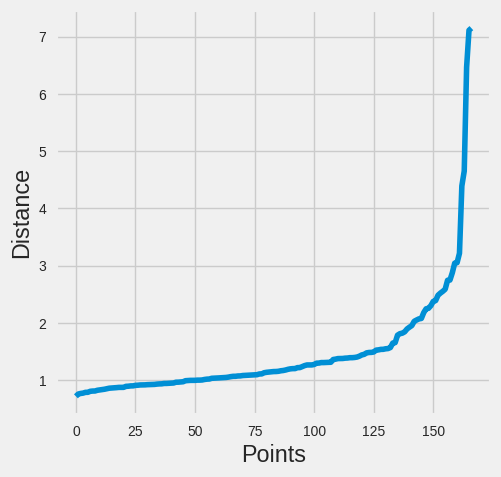

In [ ]:
from sklearn.neighbors import NearestNeighbors

nearest_neighbors = NearestNeighbors(n_neighbors=11)
neighbors = nearest_neighbors.fit(data_pca_selected)

distances, indices = neighbors.kneighbors(data_pca_selected)
distances = np.sort(distances[:,10], axis=0)

fig = plt.figure(figsize=(5, 5))
plt.plot(distances)
plt.xlabel("Points")
plt.ylabel("Distance")

2.179204034280727


<Figure size 500x500 with 0 Axes>

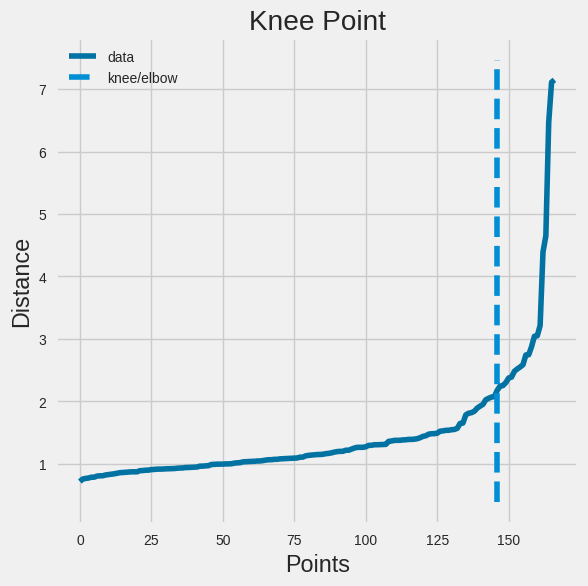

In [ ]:
from kneed import KneeLocator

i = np.arange(len(distances))
knee = KneeLocator(i, distances, S=1, curve='convex', direction='increasing', interp_method='polynomial')

fig = plt.figure(figsize=(5, 5))
knee.plot_knee()
plt.xlabel("Points")
plt.ylabel("Distance")

print(distances[knee.knee])

In [ ]:
e=2.179204034280727
dbscan = DBSCAN(eps=e, min_samples=5)
clusters = dbscan.fit_predict(data_pca_selected)
print(clusters)

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0
  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0
  0  0  0 -1  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0]


In [ ]:
e=2.179204034280727

dbscan_cluster = DBSCAN(eps=e, min_samples=8)
dbscan_cluster.fit(data_pca_selected)

labels=dbscan_cluster.labels_
N_clus=len(set(labels))-(1 if -1 in labels else 0)
print('Estimated no. of clusters: %d' % N_clus)

# Identify Noise
n_noise = list(dbscan_cluster.labels_).count(-1)
print('Estimated no. of noise points: %d' % n_noise)


Estimated no. of clusters: 1
Estimated no. of noise points: 6


Findings -->
By using optimul values of eps , we get only 1 cluster

So this is of no use


In [ ]:
#Using default function without varing hyperparameters
dbscan_cluster_pca = DBSCAN()
clusters=dbscan_cluster_pca.fit_predict(data_pca_selected)

# Number of Clusters
labels=dbscan_cluster_pca.labels_
N_clus=len(set(labels))-(1 if -1 in labels else 0)
print('Estimated no. of clusters: %d' % N_clus)

# Identify Noise
n_noise = list(dbscan_cluster_pca.labels_).count(-1)
print('Estimated no. of noise points: %d' % n_noise)
print(clusters)

Estimated no. of clusters: 2
Estimated no. of noise points: 154
[-1 -1 -1 -1  0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
  0 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1  0  0 -1 -1 -1 -1 -1  0 -1 -1 -1
 -1 -1 -1 -1  0 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1  0 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


In [ ]:
df_dbscan = pd.DataFrame(np.array(clusters), columns=['sub_cluster_pca_dbscan'])
print(df_dbscan)

     sub_cluster_pca_dbscan
0                        -1
1                        -1
2                        -1
3                        -1
4                         0
..                      ...
162                      -1
163                      -1
164                      -1
165                      -1
166                      -1

[167 rows x 1 columns]


In [ ]:
pca_data_with_final_cluster = pd.concat([pca_data_with_final_cluster,df_dbscan], axis=1)
print(pca_data_with_final_cluster)

                 country  child_mort  exports  health  imports  income  \
0            Afghanistan        90.2     10.0    7.58     44.9    1610   
1                Albania        16.6     28.0    6.55     48.6    9930   
2                Algeria        27.3     38.4    4.17     31.4   12900   
3                 Angola       119.0     62.3    2.85     42.9    5900   
4    Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   
..                   ...         ...      ...     ...      ...     ...   
162              Vanuatu        29.2     46.6    5.25     52.7    2950   
163            Venezuela        17.1     28.5    4.91     17.6   16500   
164              Vietnam        23.3     72.0    6.84     80.2    4490   
165                Yemen        56.3     30.0    5.18     34.4    4480   
166               Zambia        83.1     37.0    5.89     30.9    3280   

     inflation  life_expec  total_fer   gdpp       PC1       PC2       PC3  \
0         9.44        56.2       

#ii) Using scaled dataset

Text(0, 0.5, 'Distance')

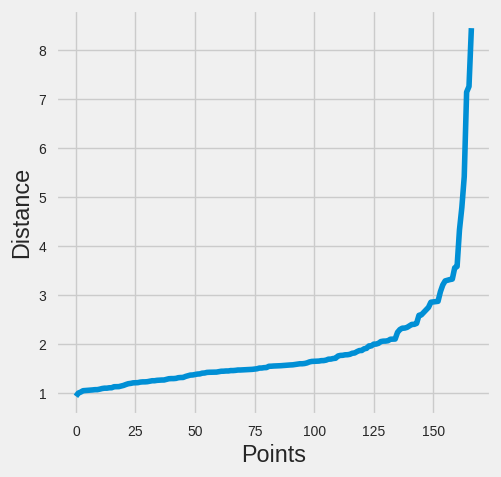

In [ ]:
from sklearn.neighbors import NearestNeighbors

nearest_neighbors_scaled = NearestNeighbors(n_neighbors=11)
neighbors = nearest_neighbors_scaled.fit(df_scaled)

distances, indices = neighbors.kneighbors(df_scaled)
distances = np.sort(distances[:,10], axis=0)

fig = plt.figure(figsize=(5, 5))
plt.plot(distances)
plt.xlabel("Points")
plt.ylabel("Distance")

2.6405149777937464


<Figure size 500x500 with 0 Axes>

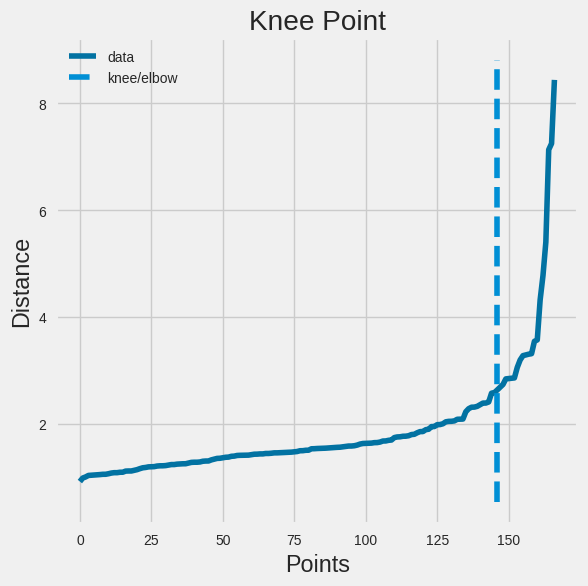

In [ ]:
from kneed import KneeLocator

i = np.arange(len(distances))
knee = KneeLocator(i, distances, S=1, curve='convex', direction='increasing', interp_method='polynomial')

fig = plt.figure(figsize=(5, 5))
knee.plot_knee()
plt.xlabel("Points")
plt.ylabel("Distance")

print(distances[knee.knee])

In [ ]:
e=2.179204034280727

dbscan_cluster_scaled = DBSCAN(eps=e, min_samples=8)
dbscan_cluster_scaled.fit(df_scaled)

labels=dbscan_cluster_scaled.labels_
N_clus=len(set(labels))-(1 if -1 in labels else 0)
print('Estimated no. of clusters: %d' % N_clus)

# Identify Noise
n_noise = list(dbscan_cluster_scaled.labels_).count(-1)
print('Estimated no. of noise points: %d' % n_noise)


Estimated no. of clusters: 1
Estimated no. of noise points: 13


As there is only 1 cluster , so it is of no use

#Method 4: Spectral Clustering:

Spectral Clustering is a clustering algorithm that uses the eigenvalues and eigenvectors of a similarity matrix to cluster the data points.

#i) On PCA data

In [ ]:
from sklearn.cluster import SpectralClustering


# create a SpectralClustering object with 4 clusters
spectral_pca = SpectralClustering(n_clusters=4)


# fit the data to the SpectralClustering object
spectral_pca.fit(data_pca_selected)


# get the labels for each data point
labels_pca = spectral_pca.labels_


In [ ]:
print(labels_pca)

[0 2 2 0 2 2 2 3 3 2 2 2 2 2 2 3 2 0 2 2 2 2 2 1 2 0 0 2 0 3 2 0 0 2 2 2 0
 0 0 2 0 2 2 2 3 2 2 2 2 0 0 2 2 3 3 2 0 2 3 0 3 2 2 0 0 2 0 2 3 2 2 2 2 3
 2 3 2 3 2 2 0 0 1 2 2 2 2 0 0 2 2 2 2 0 0 2 2 0 2 0 2 0 2 2 2 2 0 2 2 2 3
 3 0 0 3 2 0 2 2 2 2 2 3 1 2 2 0 2 2 0 2 2 0 2 2 2 2 2 2 3 2 2 0 2 3 3 2 0
 2 0 0 2 2 2 2 0 2 2 3 3 2 2 2 2 2 0 0]


In [ ]:
spectral_pca_data= pd.Series(spectral_pca.labels_)
print(pd.concat({'count' : spectral_pca_data.value_counts(), 'percent' : round(spectral_pca_data.value_counts(normalize = True)*100, 2)}, axis = 1 ))

   count  percent
2    100    59.88
0     42    25.15
3     22    13.17
1      3     1.80


In [ ]:
spectral_pca_data = pd.DataFrame(np.array(spectral_pca_data), columns = ["cluster_pca_spectral"])
print(spectral_pca_data)

     cluster_pca_spectral
0                       0
1                       2
2                       2
3                       0
4                       2
..                    ...
162                     2
163                     2
164                     2
165                     0
166                     0

[167 rows x 1 columns]


In [ ]:
pca_data_with_final_cluster = pd.concat([pca_data_with_final_cluster,spectral_pca_data], axis=1)
print(pca_data_with_final_cluster)

                 country  child_mort  exports  health  imports  income  \
0            Afghanistan        90.2     10.0    7.58     44.9    1610   
1                Albania        16.6     28.0    6.55     48.6    9930   
2                Algeria        27.3     38.4    4.17     31.4   12900   
3                 Angola       119.0     62.3    2.85     42.9    5900   
4    Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   
..                   ...         ...      ...     ...      ...     ...   
162              Vanuatu        29.2     46.6    5.25     52.7    2950   
163            Venezuela        17.1     28.5    4.91     17.6   16500   
164              Vietnam        23.3     72.0    6.84     80.2    4490   
165                Yemen        56.3     30.0    5.18     34.4    4480   
166               Zambia        83.1     37.0    5.89     30.9    3280   

     inflation  life_expec  total_fer   gdpp       PC1       PC2       PC3  \
0         9.44        56.2       

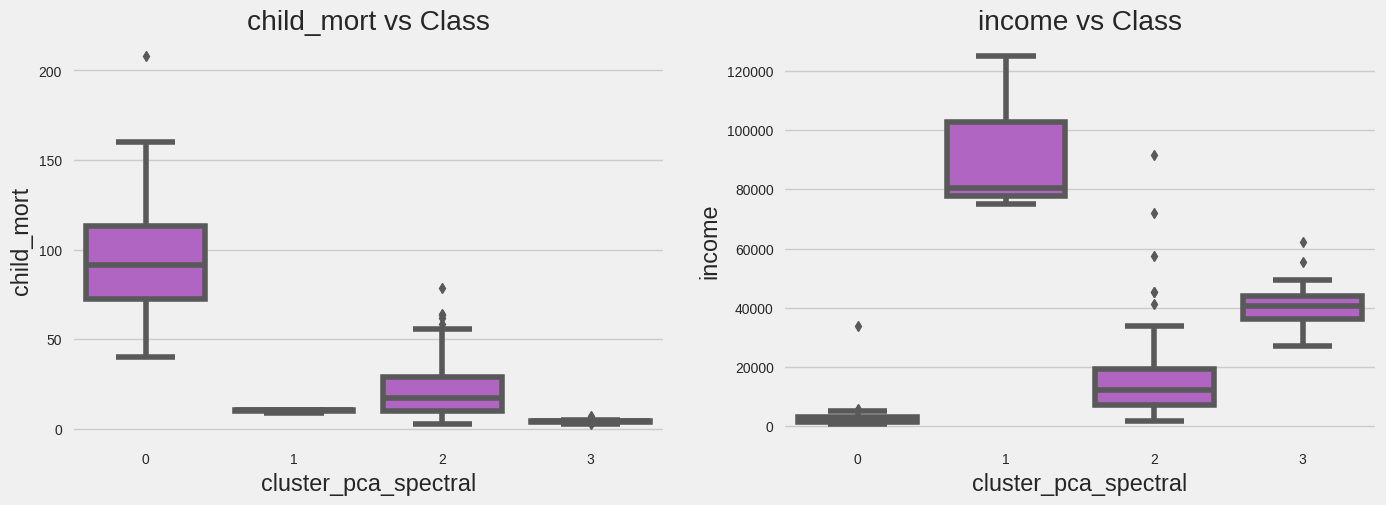

In [ ]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

plt.subplot(1,2,1)
sns.boxplot(x = 'cluster_pca_spectral', y = 'child_mort', data  = pca_data_with_final_cluster, color = '#BA55D3');
plt.title('child_mort vs Class')

plt.subplot(1,2,2)
sns.boxplot(x = 'cluster_pca_spectral', y = 'income', data  = pca_data_with_final_cluster, color = '#BA55D3');
plt.title('income vs Class')
plt.show()

Text(0.5, 1.0, 'gdp vs Class')

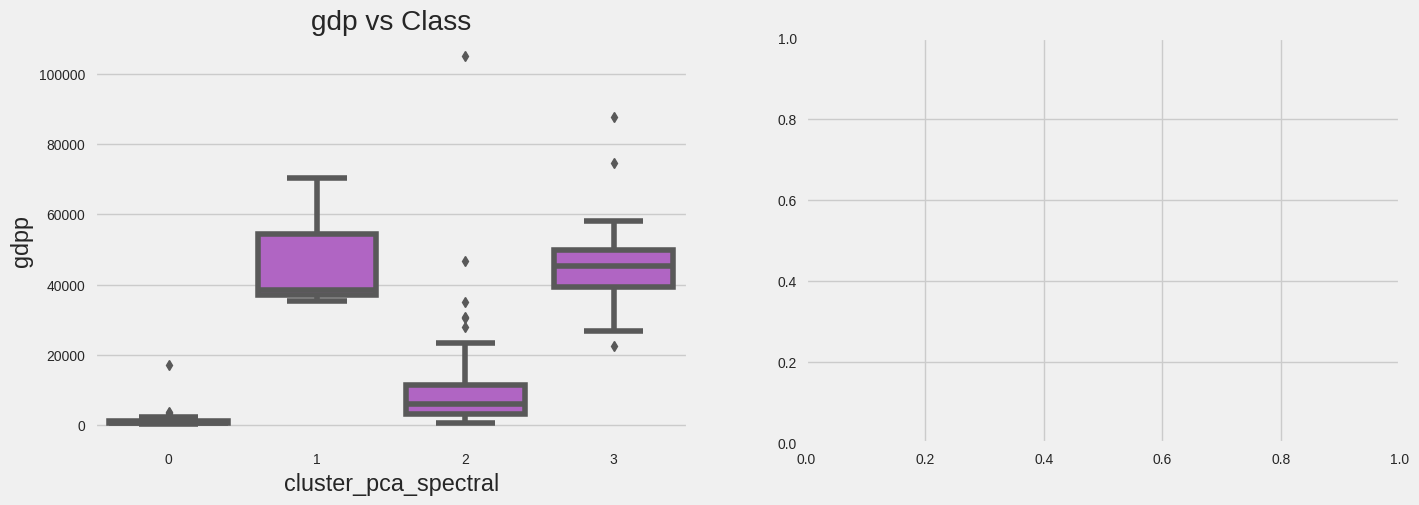

In [ ]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

plt.subplot(1,2,1)
sns.boxplot(x = 'cluster_pca_spectral', y = 'gdpp', data  = pca_data_with_final_cluster, color = '#BA55D3');
plt.title('gdp vs Class')

In [ ]:
from statistics import mean

pca_cluster_gdp_avg_list=[]
pca_cluster = pca_data_with_final_cluster[pca_data_with_final_cluster.cluster_pca_spectral == 0]
cluster_0=np.array(pca_cluster.gdpp)
pca_avg_gdp_cluster_0 = mean(cluster_0)
pca_cluster_gdp_avg_list.append(pca_avg_gdp_cluster_0)
print("Average GDP of Cluster_0 :",pca_avg_gdp_cluster_0)


pca_cluster = pca_data_with_final_cluster[pca_data_with_final_cluster.cluster_pca_spectral == 1]
cluster_1=np.array(pca_cluster.gdpp)
pca_avg_gdp_cluster_1 = mean(cluster_1)
pca_cluster_gdp_avg_list.append(pca_avg_gdp_cluster_1)
print("Average GDP of Cluster_1 :",pca_avg_gdp_cluster_1)

pca_cluster = pca_data_with_final_cluster[pca_data_with_final_cluster.cluster_pca_spectral == 2]
cluster_2=np.array(pca_cluster.gdpp)
pca_avg_gdp_cluster_2 = mean(cluster_2)
pca_cluster_gdp_avg_list.append(pca_avg_gdp_cluster_2)
print("Average GDP of Cluster_2 :",pca_avg_gdp_cluster_2)

pca_cluster = pca_data_with_final_cluster[pca_data_with_final_cluster.cluster_pca_spectral == 3]
cluster_3=np.array(pca_cluster.gdpp)
pca_avg_gdp_cluster_3 = mean(cluster_3)
pca_cluster_gdp_avg_list.append(pca_avg_gdp_cluster_3)
print("Average GDP of Cluster_3 :",pca_avg_gdp_cluster_3)

print("Average_GDP :",pca_cluster_gdp_avg_list)

Average GDP of Cluster_0 : 1428
Average GDP of Cluster_1 : 48033
Average GDP of Cluster_2 : 9469
Average GDP of Cluster_3 : 46090
Average_GDP : [1428, 48033, 9469, 46090]


In [ ]:
cluster_asssignment_pca=(cluster_assignment_length_4(pca_cluster_gdp_avg_list))
print(cluster_asssignment_pca)

{1: 'No Help Needed', 3: 'No Help Needed', 2: 'Might Need Help', 0: 'Help Needed'}


In [ ]:
for cluster_num in range (4):
  pca_data_with_final_cluster['cluster_pca_spectral'].iloc[pca_data_with_final_cluster['cluster_pca_spectral'] == cluster_num] = cluster_asssignment_pca[cluster_num]

fig = px.choropleth(pca_data_with_final_cluster[['country','cluster_pca_spectral']],
                    locationmode = 'country names',
                    locations = 'country',
                    title = 'Needed Help Per Country (World)',
                    color = pca_data_with_final_cluster['cluster_pca_spectral'],
                    color_discrete_map = {'Help Needed':'Red',
                                        'No Help Needed':'Green',
                                        'Might Need Help':'Yellow'
                                        }
                   )
fig.update_geos(fitbounds = "locations", visible = True)
fig.update_layout(legend_title_text = 'Labels',legend_title_side = 'top',title_pad_l = 260,title_y = 0.86)
fig.show(engine = 'kaleido')

In [ ]:
Needy_pca_spectral = pca_data_with_final_cluster[pca_data_with_final_cluster.cluster_pca_spectral == 'Help Needed']
Help_Needed_Countries_spectral=np.array(Needy_pca_spectral.country)
print(Help_Needed_Countries_spectral)

['Afghanistan' 'Angola' 'Benin' 'Burkina Faso' 'Burundi' 'Cameroon'
 'Central African Republic' 'Chad' 'Comoros' 'Congo, Dem. Rep.'
 'Congo, Rep.' "Cote d'Ivoire" 'Equatorial Guinea' 'Eritrea' 'Gambia'
 'Ghana' 'Guinea' 'Guinea-Bissau' 'Haiti' 'Kenya' 'Kiribati' 'Lesotho'
 'Liberia' 'Madagascar' 'Malawi' 'Mali' 'Mauritania'
 'Micronesia, Fed. Sts.' 'Mozambique' 'Niger' 'Nigeria' 'Pakistan'
 'Rwanda' 'Senegal' 'Sierra Leone' 'Sudan' 'Tanzania' 'Timor-Leste' 'Togo'
 'Uganda' 'Yemen' 'Zambia']


In [ ]:
Dict_with_cnt_of_needed_countries(Dict_pca_Help_Needed,Help_Needed_Countries_spectral)
print(Dict_pca_Help_Needed)

{'Afghanistan': 3, 'Angola': 3, 'Benin': 3, 'Botswana': 2, 'Burkina Faso': 3, 'Burundi': 3, 'Cameroon': 3, 'Central African Republic': 3, 'Chad': 3, 'Comoros': 3, 'Congo, Dem. Rep.': 3, 'Congo, Rep.': 3, "Cote d'Ivoire": 3, 'Equatorial Guinea': 3, 'Eritrea': 3, 'Gabon': 2, 'Gambia': 3, 'Ghana': 3, 'Guinea': 3, 'Guinea-Bissau': 3, 'Haiti': 3, 'Iraq': 2, 'Kenya': 3, 'Kiribati': 3, 'Lao': 2, 'Lesotho': 3, 'Liberia': 3, 'Madagascar': 3, 'Malawi': 3, 'Mali': 3, 'Mauritania': 3, 'Micronesia, Fed. Sts.': 3, 'Mozambique': 3, 'Namibia': 2, 'Niger': 3, 'Nigeria': 3, 'Pakistan': 3, 'Rwanda': 3, 'Senegal': 3, 'Sierra Leone': 3, 'Solomon Islands': 2, 'South Africa': 2, 'Sudan': 3, 'Tanzania': 3, 'Timor-Leste': 3, 'Togo': 3, 'Uganda': 3, 'Yemen': 3, 'Zambia': 3, 'Algeria': 1, 'Argentina': 1, 'Azerbaijan': 1, 'Bangladesh': 1, 'Bolivia': 1, 'Egypt': 1, 'India': 1, 'Indonesia': 1, 'Iran': 1, 'Kazakhstan': 1, 'Mongolia': 1, 'Myanmar': 1, 'Nepal': 1, 'Philippines': 1, 'Russia': 1, 'Sri Lanka': 1, 'Tajiki

#ii) On scaled data

In [ ]:
from sklearn.cluster import SpectralClustering


# create a SpectralClustering object with 4 clusters
spectral_scaled = SpectralClustering(n_clusters=4)


# fit the data to the SpectralClustering object
spectral_scaled.fit(df_scaled)


# get the labels for each data point
labels_scaled = spectral_scaled.labels_


In [ ]:
print(labels_scaled)

[2 0 0 2 0 0 0 3 3 0 0 0 0 0 0 3 0 2 0 0 0 0 0 1 0 2 2 0 2 3 0 2 2 0 0 0 2
 2 2 0 2 0 0 0 3 0 0 0 0 2 2 0 0 3 3 0 2 0 3 2 3 0 0 2 2 0 2 0 3 0 0 0 0 3
 3 3 0 3 0 0 2 2 1 0 0 0 0 2 2 0 0 0 0 2 2 0 0 2 0 2 0 2 0 0 0 0 2 0 0 0 3
 3 2 0 3 0 2 0 0 0 0 0 3 1 0 0 2 0 0 2 0 0 2 0 0 0 0 0 0 3 0 0 2 0 3 3 0 2
 0 2 2 0 0 0 0 2 0 0 3 3 0 0 0 0 0 2 2]


In [ ]:
spectral_scaled_data= pd.Series(spectral_scaled.labels_)
print(pd.concat({'count' : spectral_scaled_data.value_counts(), 'percent' : round(spectral_scaled_data.value_counts(normalize = True)*100, 2)}, axis = 1 ))

   count  percent
0    100    59.88
2     41    24.55
3     23    13.77
1      3     1.80


In [ ]:
spectral_scaled_data = pd.DataFrame(np.array(spectral_scaled_data), columns = ["cluster_scaled_spectral"])
print(spectral_scaled_data)

     cluster_scaled_spectral
0                          2
1                          0
2                          0
3                          2
4                          0
..                       ...
162                        0
163                        0
164                        0
165                        2
166                        2

[167 rows x 1 columns]


In [ ]:
scaled_data_with_final_cluster = pd.concat([scaled_data_with_final_cluster,spectral_scaled_data], axis=1)
print(scaled_data_with_final_cluster)

                 country  child_mort   exports    health   imports    income  \
0            Afghanistan    1.291532 -1.138280  0.279088 -0.082455 -0.808245   
1                Albania   -0.538949 -0.479658 -0.097016  0.070837 -0.375369   
2                Algeria   -0.272833 -0.099122 -0.966073 -0.641762 -0.220844   
3                 Angola    2.007808  0.775381 -1.448071 -0.165315 -0.585043   
4    Antigua and Barbuda   -0.695634  0.160668 -0.286894  0.497568  0.101732   
..                   ...         ...       ...       ...       ...       ...   
162              Vanuatu   -0.225578  0.200917 -0.571711  0.240700 -0.738527   
163            Venezuela   -0.526514 -0.461363 -0.695862 -1.213499 -0.033542   
164              Vietnam   -0.372315  1.130305  0.008877  1.380030 -0.658404   
165                Yemen    0.448417 -0.406478 -0.597272 -0.517472 -0.658924   
166               Zambia    1.114951 -0.150348 -0.338015 -0.662477 -0.721358   

     inflation  life_expec  total_fer  

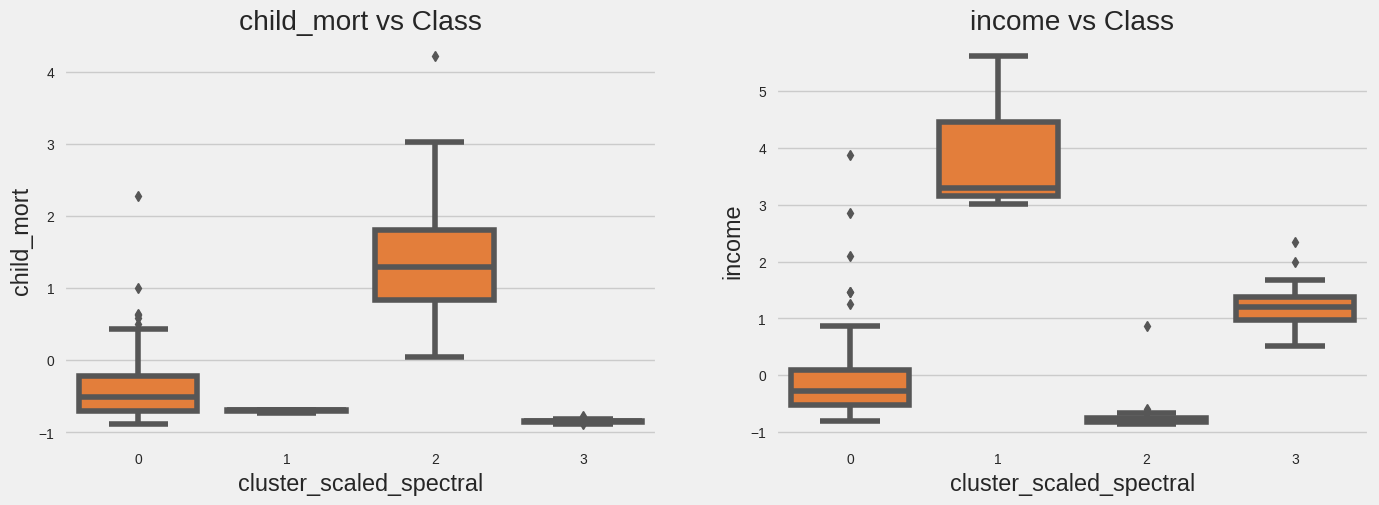

In [ ]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

plt.subplot(1,2,1)
sns.boxplot(x = 'cluster_scaled_spectral', y = 'child_mort', data  = scaled_data_with_final_cluster, color = '#FF781F');
plt.title('child_mort vs Class')

plt.subplot(1,2,2)
sns.boxplot(x = 'cluster_scaled_spectral', y = 'income', data  = scaled_data_with_final_cluster, color = '#FF781F');
plt.title('income vs Class')
plt.show()

Text(0.5, 1.0, 'gdp vs Class')

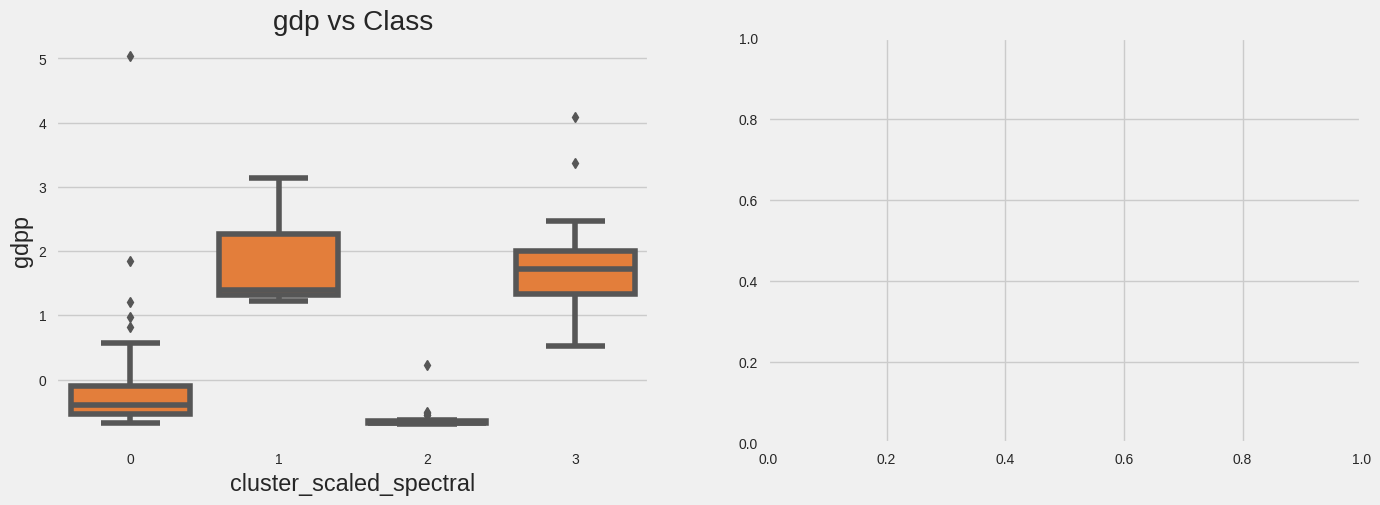

In [ ]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

plt.subplot(1,2,1)
sns.boxplot(x = 'cluster_scaled_spectral', y = 'gdpp', data  = scaled_data_with_final_cluster, color = '#FF781F');
plt.title('gdp vs Class')

In [ ]:
from statistics import mean

scaled_cluster_gdp_avg_list=[]
scaled_cluster_0 = scaled_data_with_final_cluster[scaled_data_with_final_cluster.cluster_scaled_spectral == 0]
cluster_0_gdp=np.array(scaled_cluster_0.gdpp)
scaled_avg_gdp_cluster_0 = mean(cluster_0_gdp)
scaled_cluster_gdp_avg_list.append(scaled_avg_gdp_cluster_0)
print("Average GDP of Cluster_0 :",scaled_avg_gdp_cluster_0)


scaled_cluster_1 = scaled_data_with_final_cluster[scaled_data_with_final_cluster.cluster_scaled_spectral == 1]
cluster_1_gdp=np.array(scaled_cluster_1.gdpp)
scaled_avg_gdp_cluster_1 = mean(cluster_1_gdp)
scaled_cluster_gdp_avg_list.append(scaled_avg_gdp_cluster_1)
print("Average GDP of Cluster_1 :",scaled_avg_gdp_cluster_1)

scaled_cluster_2 = scaled_data_with_final_cluster[scaled_data_with_final_cluster.cluster_scaled_spectral == 2]
cluster_2_gdp=np.array(scaled_cluster_2.gdpp)
scaled_avg_gdp_cluster_2 = mean(cluster_2_gdp)
scaled_cluster_gdp_avg_list.append(scaled_avg_gdp_cluster_2)
print("Average GDP of Cluster_2 :",scaled_avg_gdp_cluster_2)

scaled_cluster_3 = scaled_data_with_final_cluster[scaled_data_with_final_cluster.cluster_scaled_spectral == 3]
cluster_3_gdp=np.array(scaled_cluster_3.gdpp)
scaled_avg_gdp_cluster_3= mean(cluster_3_gdp)
scaled_cluster_gdp_avg_list.append(scaled_avg_gdp_cluster_3)
print("Average GDP of Cluster_3 :",scaled_avg_gdp_cluster_3)
print("Average_GDP :",scaled_cluster_gdp_avg_list)

Average GDP of Cluster_0 : -0.20673022807243407
Average GDP of Cluster_1 : 1.9191017292813306
Average GDP of Cluster_2 : -0.6324659164439698
Average GDP of Cluster_3 : 1.7759487040696602
Average_GDP : [-0.20673022807243407, 1.9191017292813306, -0.6324659164439698, 1.7759487040696602]


In [ ]:
cluster_asssignment_scaled=(cluster_assignment_length_4(scaled_cluster_gdp_avg_list))
print(cluster_asssignment_scaled)

{1: 'No Help Needed', 3: 'No Help Needed', 0: 'Might Need Help', 2: 'Help Needed'}


In [ ]:
for cluster_num in range (4):
  scaled_data_with_final_cluster['cluster_scaled_spectral'].iloc[scaled_data_with_final_cluster['cluster_scaled_spectral'] == cluster_num] = cluster_asssignment_scaled[cluster_num]

fig = px.choropleth(scaled_data_with_final_cluster[['country','cluster_scaled_spectral']],
                    locationmode = 'country names',
                    locations = 'country',
                    title = 'Needed Help Per Country (World)',
                    color = scaled_data_with_final_cluster['cluster_scaled_spectral'],
                    color_discrete_map = {'Help Needed':'Red',
                                        'No Help Needed':'Green',
                                        'Might Need Help':'Yellow'
                                        }
                   )
fig.update_geos(fitbounds = "locations", visible = True)
fig.update_layout(legend_title_text = 'Labels',legend_title_side = 'top',title_pad_l = 260,title_y = 0.86)
fig.show(engine = 'kaleido')

In [ ]:
Needy_scaled_spectral = scaled_data_with_final_cluster[scaled_data_with_final_cluster.cluster_scaled_spectral == 'Help Needed']
Help_Needed_Countries_spectral_scaled=np.array(Needy_scaled_spectral.country)
print(Help_Needed_Countries_spectral_scaled)

['Afghanistan' 'Angola' 'Benin' 'Burkina Faso' 'Burundi' 'Cameroon'
 'Central African Republic' 'Chad' 'Comoros' 'Congo, Dem. Rep.'
 'Congo, Rep.' "Cote d'Ivoire" 'Equatorial Guinea' 'Eritrea' 'Gambia'
 'Ghana' 'Guinea' 'Guinea-Bissau' 'Haiti' 'Kenya' 'Kiribati' 'Lesotho'
 'Liberia' 'Madagascar' 'Malawi' 'Mali' 'Mauritania'
 'Micronesia, Fed. Sts.' 'Mozambique' 'Niger' 'Pakistan' 'Rwanda'
 'Senegal' 'Sierra Leone' 'Sudan' 'Tanzania' 'Timor-Leste' 'Togo' 'Uganda'
 'Yemen' 'Zambia']


In [ ]:
Dict_with_cnt_of_needed_countries(Dict_scaled_Help_Needed,Help_Needed_Countries_spectral_scaled)
print(Dict_scaled_Help_Needed)

{'Afghanistan': 3, 'Angola': 2, 'Benin': 3, 'Botswana': 1, 'Burkina Faso': 3, 'Burundi': 3, 'Cameroon': 3, 'Central African Republic': 3, 'Chad': 3, 'Comoros': 3, 'Congo, Dem. Rep.': 3, 'Congo, Rep.': 2, "Cote d'Ivoire": 3, 'Equatorial Guinea': 2, 'Eritrea': 2, 'Gabon': 1, 'Gambia': 3, 'Ghana': 2, 'Guinea': 3, 'Guinea-Bissau': 3, 'Haiti': 3, 'Iraq': 1, 'Kenya': 3, 'Kiribati': 2, 'Lao': 1, 'Lesotho': 2, 'Liberia': 2, 'Madagascar': 3, 'Malawi': 3, 'Mali': 3, 'Mauritania': 2, 'Mozambique': 3, 'Myanmar': 1, 'Namibia': 1, 'Niger': 3, 'Nigeria': 1, 'Pakistan': 2, 'Rwanda': 3, 'Senegal': 3, 'Sierra Leone': 3, 'South Africa': 1, 'Sudan': 2, 'Tanzania': 3, 'Timor-Leste': 2, 'Togo': 3, 'Uganda': 3, 'Yemen': 2, 'Zambia': 3, 'Micronesia, Fed. Sts.': 1}


# Method 5 : Mean Shift Clustering

Mean Shift is a clustering algorithm that shifts each data point towards the mean of its nearest neighbors until it converges to a cluster

#i) On pca data

In [ ]:

from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.cluster import KMeans

# X is the input data
# n_clusters is the number of clusters to be formed
def mean_shift_clustering(X, n_clusters):
    # create Mean Shift clustering object with bandwidth parameter
    ms = MeanShift(bandwidth=estimate_bandwidth(X, quantile=0.2, n_samples=500))

    # fit the data to the clustering object
    ms.fit(X)

    # extract cluster centers from the object
    cluster_centers = ms.cluster_centers_

    # predict the cluster labels for each data point
    cluster_labels = ms.labels_

    # get the number of clusters found by the algorithm
    n_clusters_found = len(set(cluster_labels))

    # if the number of clusters found is less than the desired number of clusters,
    # use KMeans to cluster the data into the desired number of clusters
    if n_clusters_found < n_clusters:
        kmeans = KMeans(n_clusters=n_clusters).fit(X)
        cluster_centers = kmeans.cluster_centers_
        cluster_labels = kmeans.labels_

    return cluster_centers, cluster_labels


In [ ]:
cluster_center_pca_mean_shift,labels_pca_mean_shift=mean_shift_clustering(data_pca_selected,4)

In [ ]:
print(labels_pca_mean_shift)

[0 0 0 0 0 0 0 5 5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 5 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 5 0 0 0 0 0 0 0 0 0 5 0 0 0 5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4
 0 0 0 5 0 0 0 0 3 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 5
 0 0 6 3 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 4 0 2 0 0 0 0 0 0 0 0 0 0 5 5 0 0
 0 0 0 0 0 0 0 0 0 0 0 5 0 0 0 0 0 0 0]


In [ ]:
pca_data_mean_shift= pd.Series(labels_pca_mean_shift)
print(pd.concat({'count' : pca_data_mean_shift.value_counts(), 'percent' : round(pca_data_mean_shift.value_counts(normalize = True)*100, 2)}, axis = 1 ))

   count  percent
0    146    87.43
5     11     6.59
3      4     2.40
4      3     1.80
1      1     0.60
6      1     0.60
2      1     0.60


In [ ]:
mean_shift_pca_data = pd.DataFrame(np.array(pca_data_mean_shift), columns = ["cluster_pca_mean_shift"])
print(mean_shift_pca_data)

     cluster_pca_mean_shift
0                         0
1                         0
2                         0
3                         0
4                         0
..                      ...
162                       0
163                       0
164                       0
165                       0
166                       0

[167 rows x 1 columns]


In [ ]:
pca_data_with_final_cluster = pd.concat([pca_data_with_final_cluster,mean_shift_pca_data], axis=1)
print(pca_data_with_final_cluster)

                 country  child_mort  exports  health  imports  income  \
0            Afghanistan        90.2     10.0    7.58     44.9    1610   
1                Albania        16.6     28.0    6.55     48.6    9930   
2                Algeria        27.3     38.4    4.17     31.4   12900   
3                 Angola       119.0     62.3    2.85     42.9    5900   
4    Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   
..                   ...         ...      ...     ...      ...     ...   
162              Vanuatu        29.2     46.6    5.25     52.7    2950   
163            Venezuela        17.1     28.5    4.91     17.6   16500   
164              Vietnam        23.3     72.0    6.84     80.2    4490   
165                Yemen        56.3     30.0    5.18     34.4    4480   
166               Zambia        83.1     37.0    5.89     30.9    3280   

     inflation  life_expec  total_fer   gdpp       PC1       PC2       PC3  \
0         9.44        56.2       

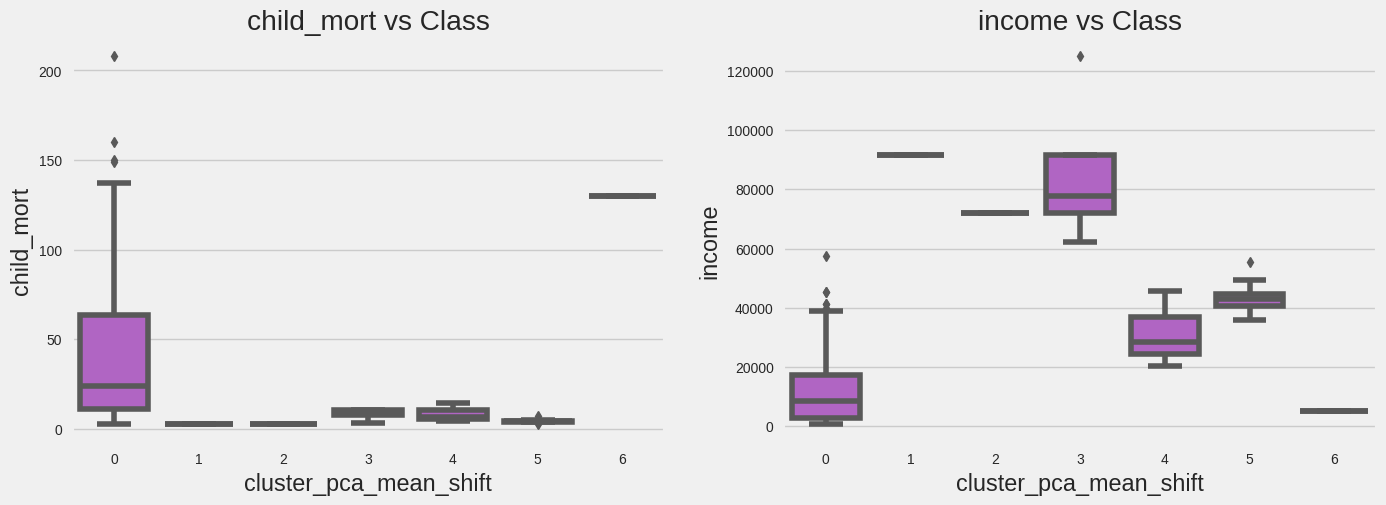

In [ ]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

plt.subplot(1,2,1)
sns.boxplot(x = 'cluster_pca_mean_shift', y = 'child_mort', data  = pca_data_with_final_cluster, color = '#BA55D3');
plt.title('child_mort vs Class')

plt.subplot(1,2,2)
sns.boxplot(x = 'cluster_pca_mean_shift', y = 'income', data  = pca_data_with_final_cluster, color = '#BA55D3');
plt.title('income vs Class')
plt.show()

Text(0.5, 1.0, 'gdp vs Class')

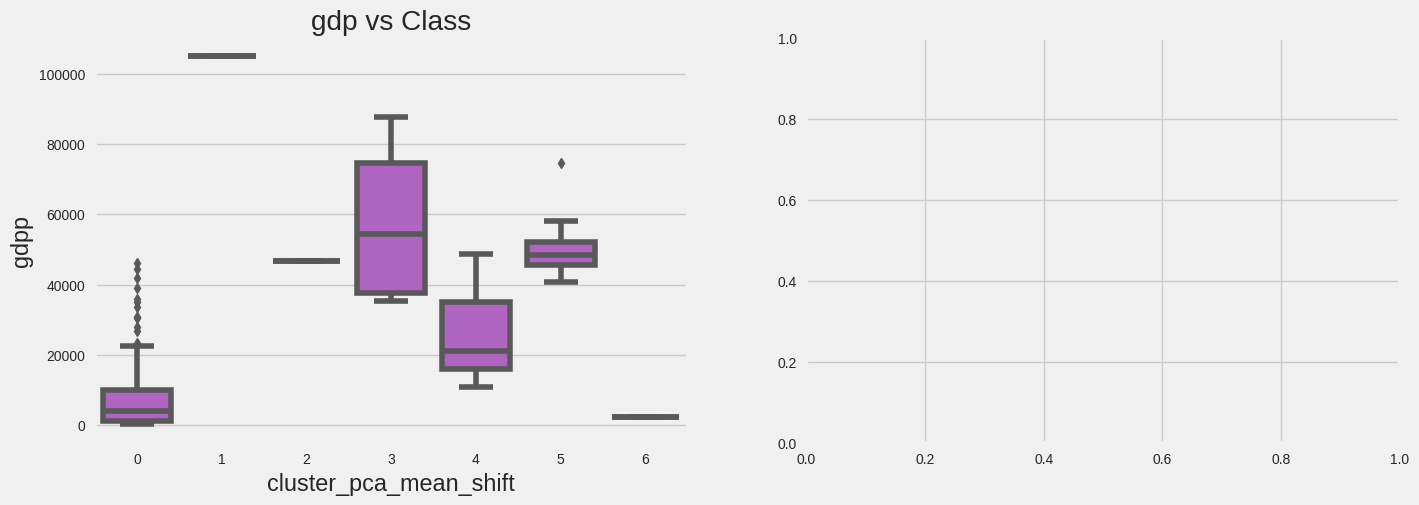

In [ ]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

plt.subplot(1,2,1)
sns.boxplot(x = 'cluster_pca_mean_shift', y = 'gdpp', data  = pca_data_with_final_cluster, color = '#BA55D3');
plt.title('gdp vs Class')

In [ ]:
from statistics import mean

pca_cluster_gdp_avg_list=[]
pca_cluster_0 = pca_data_with_final_cluster[pca_data_with_final_cluster.cluster_pca_mean_shift == 0]
cluster_0_gdp=np.array(pca_cluster_0.gdpp)
pca_avg_gdp_cluster_0 = mean(cluster_0_gdp)
pca_cluster_gdp_avg_list.append(pca_avg_gdp_cluster_0)
print("Average GDP of Cluster_0 :",pca_avg_gdp_cluster_0)


pca_cluster_1 = pca_data_with_final_cluster[pca_data_with_final_cluster.cluster_pca_mean_shift == 1]
cluster_1_gdp=np.array(pca_cluster_1.gdpp)
pca_avg_gdp_cluster_1 = mean(cluster_1_gdp)
pca_cluster_gdp_avg_list.append(pca_avg_gdp_cluster_1)
print("Average GDP of Cluster_1 :",pca_avg_gdp_cluster_1)


pca_cluster_2 = pca_data_with_final_cluster[pca_data_with_final_cluster.cluster_pca_mean_shift == 2]
cluster_2_gdp=np.array(pca_cluster_2.gdpp)
pca_avg_gdp_cluster_2 = mean(cluster_2_gdp)
pca_cluster_gdp_avg_list.append(pca_avg_gdp_cluster_2)
print("Average GDP of Cluster_2 :",pca_avg_gdp_cluster_2)

pca_cluster_3= pca_data_with_final_cluster[pca_data_with_final_cluster.cluster_pca_mean_shift == 3]
cluster_3_gdp=np.array(pca_cluster_3.gdpp)
pca_avg_gdp_cluster_3 = mean(cluster_3_gdp)
pca_cluster_gdp_avg_list.append(pca_avg_gdp_cluster_3)
print("Average GDP of Cluster_3 :",pca_avg_gdp_cluster_3)

pca_cluster_4 = pca_data_with_final_cluster[pca_data_with_final_cluster.cluster_pca_mean_shift == 4]
cluster_4_gdp=np.array(pca_cluster_4.gdpp)
pca_avg_gdp_cluster_4 = mean(cluster_4_gdp)
pca_cluster_gdp_avg_list.append(pca_avg_gdp_cluster_4)
print("Average GDP of Cluster_4 :",pca_avg_gdp_cluster_4)

pca_cluster_5 = pca_data_with_final_cluster[pca_data_with_final_cluster.cluster_pca_mean_shift == 5]
cluster_5_gdp=np.array(pca_cluster_5.gdpp)
pca_avg_gdp_cluster_5 = mean(cluster_5_gdp)
pca_cluster_gdp_avg_list.append(pca_avg_gdp_cluster_5)
print("Average GDP of Cluster_5 :",pca_avg_gdp_cluster_5)

pca_cluster_6 = pca_data_with_final_cluster[pca_data_with_final_cluster.cluster_pca_mean_shift == 6]
cluster_6_gdp=np.array(pca_cluster_6.gdpp)
pca_avg_gdp_cluster_6 = mean(cluster_6_gdp)
pca_cluster_gdp_avg_list.append(pca_avg_gdp_cluster_6)
print("Average GDP of Cluster_6 :",pca_avg_gdp_cluster_6)

print("Average_GDP :",pca_cluster_gdp_avg_list)

Average GDP of Cluster_0 : 7822
Average GDP of Cluster_1 : 105000
Average GDP of Cluster_2 : 46600
Average GDP of Cluster_3 : 57975
Average GDP of Cluster_4 : 26866
Average GDP of Cluster_5 : 50590
Average GDP of Cluster_6 : 2330
Average_GDP : [7822, 105000, 46600, 57975, 26866, 50590, 2330]


In [ ]:
def cluster_assignment_length_7(lis):
  Dict={}
  New_Dec_list=np.flip(np.argsort(lis))
  li=['No Help Needed','No Help Needed','No Help Needed','No Help Needed','Might Need Help','Might Need Help','Help Needed']
  j=0
  for i in range(len(lis)):
       Dict[New_Dec_list[i]]=li[j]
       j=j+1;
  return Dict

In [ ]:
cluster_asssignment_pca=(cluster_assignment_length_7(pca_cluster_gdp_avg_list))
print(cluster_asssignment_pca)

{1: 'No Help Needed', 3: 'No Help Needed', 5: 'No Help Needed', 2: 'No Help Needed', 4: 'Might Need Help', 0: 'Might Need Help', 6: 'Help Needed'}


In [ ]:
for cluster_num in range (7):
  pca_data_with_final_cluster['cluster_pca_mean_shift'].iloc[pca_data_with_final_cluster['cluster_pca_mean_shift'] == cluster_num] = cluster_asssignment_pca[cluster_num]

fig = px.choropleth(pca_data_with_final_cluster[['country','cluster_pca_mean_shift']],
                    locationmode = 'country names',
                    locations = 'country',
                    title = 'Needed Help Per Country (World)',
                    color = pca_data_with_final_cluster['cluster_pca_mean_shift'],
                    color_discrete_map = {
                                          'Help Needed':'Red',
                                        'No Help Needed':'Green',
                                        'Might Need Help':'Yellow'
                                        }
                   )
fig.update_geos(fitbounds = "locations", visible = True)
fig.update_layout(legend_title_text = 'Labels',legend_title_side = 'top',title_pad_l = 260,title_y = 0.86)
fig.show(engine = 'kaleido')

In [ ]:
Needy_pca_mean_shift = pca_data_with_final_cluster[pca_data_with_final_cluster.cluster_pca_mean_shift == 'Help Needed']
Help_Needed_Countries_mean_shift=np.array(Needy_pca_mean_shift.country)
print(Help_Needed_Countries_mean_shift)

['Nigeria']


In [ ]:
Dict_with_cnt_of_needed_countries(Dict_pca_Help_Needed,Help_Needed_Countries_mean_shift)
print(Dict_pca_Help_Needed)

{'Afghanistan': 3, 'Angola': 3, 'Benin': 3, 'Botswana': 2, 'Burkina Faso': 3, 'Burundi': 3, 'Cameroon': 3, 'Central African Republic': 3, 'Chad': 3, 'Comoros': 3, 'Congo, Dem. Rep.': 3, 'Congo, Rep.': 3, "Cote d'Ivoire": 3, 'Equatorial Guinea': 3, 'Eritrea': 3, 'Gabon': 2, 'Gambia': 3, 'Ghana': 3, 'Guinea': 3, 'Guinea-Bissau': 3, 'Haiti': 3, 'Iraq': 2, 'Kenya': 3, 'Kiribati': 3, 'Lao': 2, 'Lesotho': 3, 'Liberia': 3, 'Madagascar': 3, 'Malawi': 3, 'Mali': 3, 'Mauritania': 3, 'Micronesia, Fed. Sts.': 3, 'Mozambique': 3, 'Namibia': 2, 'Niger': 3, 'Nigeria': 4, 'Pakistan': 3, 'Rwanda': 3, 'Senegal': 3, 'Sierra Leone': 3, 'Solomon Islands': 2, 'South Africa': 2, 'Sudan': 3, 'Tanzania': 3, 'Timor-Leste': 3, 'Togo': 3, 'Uganda': 3, 'Yemen': 3, 'Zambia': 3, 'Algeria': 1, 'Argentina': 1, 'Azerbaijan': 1, 'Bangladesh': 1, 'Bolivia': 1, 'Egypt': 1, 'India': 1, 'Indonesia': 1, 'Iran': 1, 'Kazakhstan': 1, 'Mongolia': 1, 'Myanmar': 1, 'Nepal': 1, 'Philippines': 1, 'Russia': 1, 'Sri Lanka': 1, 'Tajiki

#ii) On scaled data

In [ ]:
cluster_center_scaled_mean_shift,labels_scaled_mean_shift=mean_shift_clustering(df_scaled,4)
print(labels_scaled_mean_shift)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 1 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 4
 0 0 0 0 0 0 0 0 3 0 0 0 0 1 0 0 0 6 0 0 0 0 0 1 4 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 2 3 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 1 5 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [ ]:
scaled_data_mean_shift= pd.Series(labels_scaled_mean_shift)
print(pd.concat({'count' : scaled_data_mean_shift.value_counts(), 'percent' : round(scaled_data_mean_shift.value_counts(normalize = True)*100, 2)}, axis = 1 ))

   count  percent
0    152    91.02
1      6     3.59
3      4     2.40
4      2     1.20
6      1     0.60
2      1     0.60
5      1     0.60


In [ ]:
scaled_data_mean_shift = pd.DataFrame(np.array(scaled_data_mean_shift), columns = ["scaled_mean_shift"])
print(scaled_data_mean_shift)

     scaled_mean_shift
0                    0
1                    0
2                    0
3                    0
4                    0
..                 ...
162                  0
163                  0
164                  0
165                  0
166                  0

[167 rows x 1 columns]


In [ ]:
scaled_data_with_final_cluster = pd.concat([scaled_data_with_final_cluster,scaled_data_mean_shift], axis=1)
print(scaled_data_with_final_cluster)

                 country  child_mort   exports    health   imports    income  \
0            Afghanistan    1.291532 -1.138280  0.279088 -0.082455 -0.808245   
1                Albania   -0.538949 -0.479658 -0.097016  0.070837 -0.375369   
2                Algeria   -0.272833 -0.099122 -0.966073 -0.641762 -0.220844   
3                 Angola    2.007808  0.775381 -1.448071 -0.165315 -0.585043   
4    Antigua and Barbuda   -0.695634  0.160668 -0.286894  0.497568  0.101732   
..                   ...         ...       ...       ...       ...       ...   
162              Vanuatu   -0.225578  0.200917 -0.571711  0.240700 -0.738527   
163            Venezuela   -0.526514 -0.461363 -0.695862 -1.213499 -0.033542   
164              Vietnam   -0.372315  1.130305  0.008877  1.380030 -0.658404   
165                Yemen    0.448417 -0.406478 -0.597272 -0.517472 -0.658924   
166               Zambia    1.114951 -0.150348 -0.338015 -0.662477 -0.721358   

     inflation  life_expec  total_fer  

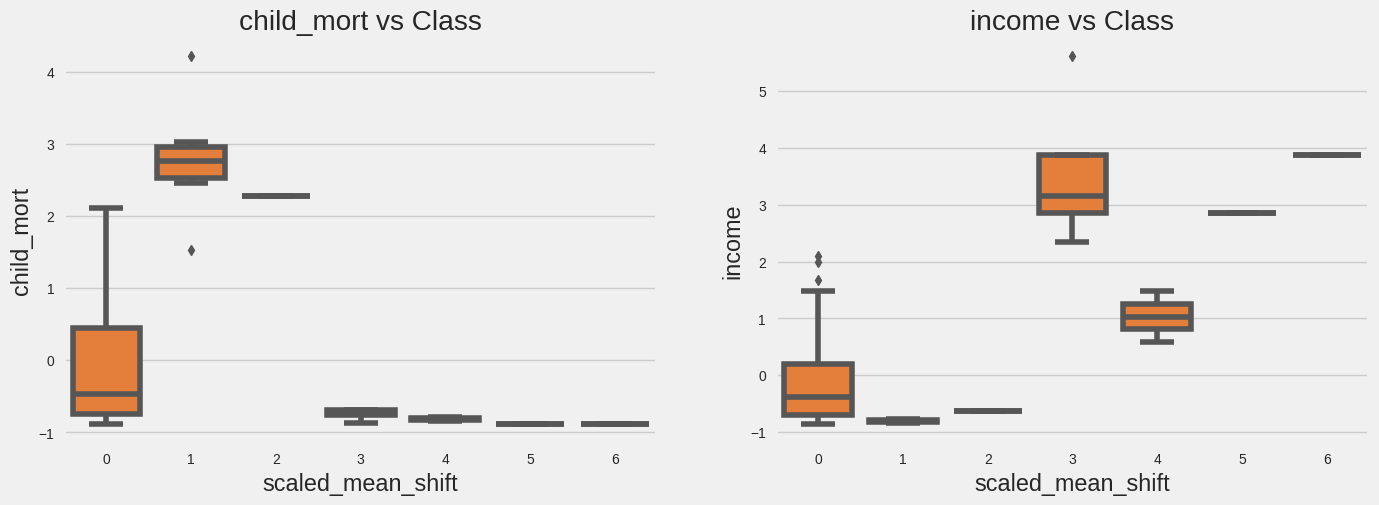

In [ ]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

plt.subplot(1,2,1)
sns.boxplot(x = 'scaled_mean_shift', y = 'child_mort', data  = scaled_data_with_final_cluster, color = '#FF781F');
plt.title('child_mort vs Class')

plt.subplot(1,2,2)
sns.boxplot(x = 'scaled_mean_shift', y = 'income', data  = scaled_data_with_final_cluster, color = '#FF781F');
plt.title('income vs Class')
plt.show()

Text(0.5, 1.0, 'gdp vs Class')

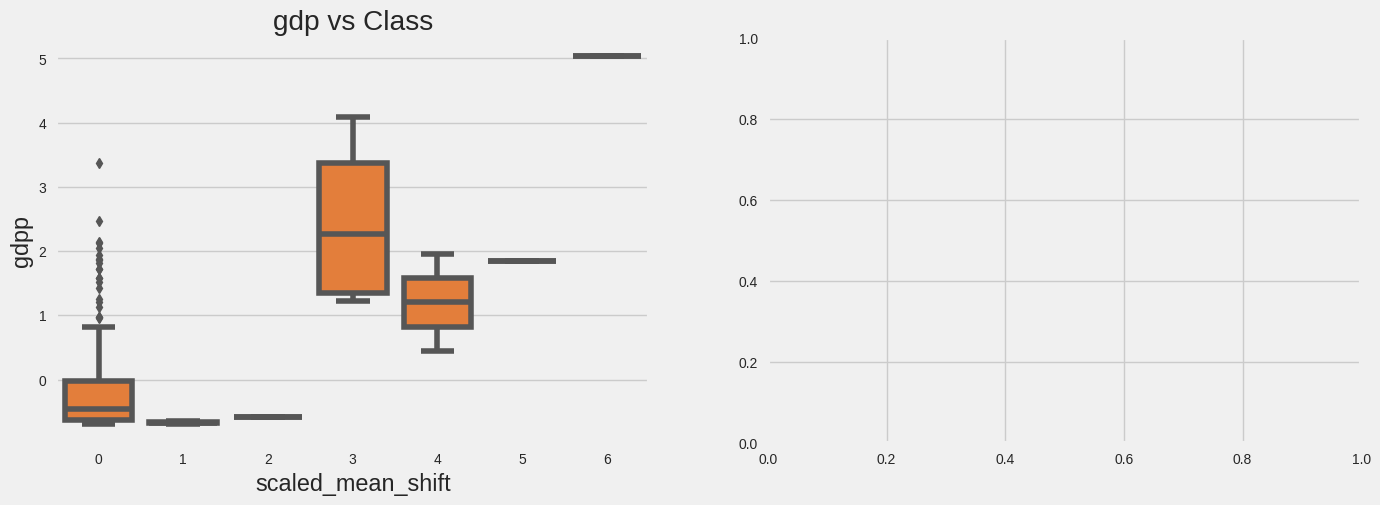

In [ ]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

plt.subplot(1,2,1)
sns.boxplot(x = 'scaled_mean_shift', y = 'gdpp', data  = scaled_data_with_final_cluster, color = '#FF781F');
plt.title('gdp vs Class')

In [ ]:
from statistics import mean

scaled_cluster_gdp_avg_list=[]
scaled_cluster_0 = scaled_data_with_final_cluster[scaled_data_with_final_cluster.scaled_mean_shift == 0]
cluster_0_gdp=np.array(scaled_cluster_0.gdpp)
scaled_avg_gdp_cluster_0 = mean(cluster_0_gdp)
scaled_cluster_gdp_avg_list.append(scaled_avg_gdp_cluster_0)
print("Average GDP of Cluster_0 :",scaled_avg_gdp_cluster_0)

scaled_cluster_1 = scaled_data_with_final_cluster[scaled_data_with_final_cluster.scaled_mean_shift == 1]
cluster_1_gdp=np.array(scaled_cluster_1.gdpp)
scaled_avg_gdp_cluster_1 = mean(cluster_1_gdp)
scaled_cluster_gdp_avg_list.append(scaled_avg_gdp_cluster_1)
print("Average GDP of Cluster_1 :",scaled_avg_gdp_cluster_1)

scaled_cluster_2 = scaled_data_with_final_cluster[scaled_data_with_final_cluster.scaled_mean_shift == 2]
cluster_2_gdp=np.array(scaled_cluster_2.gdpp)
scaled_avg_gdp_cluster_2 = mean(cluster_2_gdp)
scaled_cluster_gdp_avg_list.append(scaled_avg_gdp_cluster_2)
print("Average GDP of Cluster_2 :",scaled_avg_gdp_cluster_2)

scaled_cluster_3 = scaled_data_with_final_cluster[scaled_data_with_final_cluster.scaled_mean_shift == 3]
cluster_3_gdp=np.array(scaled_cluster_3.gdpp)
scaled_avg_gdp_cluster_3 = mean(cluster_3_gdp)
scaled_cluster_gdp_avg_list.append(scaled_avg_gdp_cluster_3)
print("Average GDP of Cluster_3 :",scaled_avg_gdp_cluster_3)

scaled_cluster_4 = scaled_data_with_final_cluster[scaled_data_with_final_cluster.scaled_mean_shift == 4]
cluster_4_gdp=np.array(scaled_cluster_4.gdpp)
scaled_avg_gdp_cluster_4 = mean(cluster_4_gdp)
scaled_cluster_gdp_avg_list.append(scaled_avg_gdp_cluster_4)
print("Average GDP of Cluster_4 :",scaled_avg_gdp_cluster_4)

scaled_cluster_5 = scaled_data_with_final_cluster[scaled_data_with_final_cluster.scaled_mean_shift == 5]
cluster_5_gdp=np.array(scaled_cluster_5.gdpp)
scaled_avg_gdp_cluster_5 = mean(cluster_5_gdp)
scaled_cluster_gdp_avg_list.append(scaled_avg_gdp_cluster_5)
print("Average GDP of Cluster_5 :",scaled_avg_gdp_cluster_5)


scaled_cluster_6 = scaled_data_with_final_cluster[scaled_data_with_final_cluster.scaled_mean_shift == 6]
cluster_6_gdp=np.array(scaled_cluster_6.gdpp)
scaled_avg_gdp_cluster_6 = mean(cluster_6_gdp)
scaled_cluster_gdp_avg_list.append(scaled_avg_gdp_cluster_6)
print("Average GDP of Cluster_6 :",scaled_avg_gdp_cluster_6)


print("Average ClusterWise GDP list :",scaled_cluster_gdp_avg_list)

Average GDP of Cluster_0 : -0.095567672226015
Average GDP of Cluster_1 : -0.6703873955859311
Average GDP of Cluster_2 : -0.5819362740192721
Average GDP of Cluster_3 : 2.4631427069521097
Average GDP of Cluster_4 : 1.2004021644790277
Average GDP of Cluster_5 : 1.8406649747470691
Average GDP of Cluster_6 : 5.036506694375584
Average ClusterWise GDP list : [-0.095567672226015, -0.6703873955859311, -0.5819362740192721, 2.4631427069521097, 1.2004021644790277, 1.8406649747470691, 5.036506694375584]


In [ ]:
def cluster_assignment_length_7_pattern_2(lis):
  Dict={}
  New_Dec_list=np.flip(np.argsort(lis))
  li=['No Help Needed','No Help Needed','No Help Needed','No Help Needed','Might Need Help','Might Need Help','Help Needed']
  j=0
  for i in range(len(lis)):
       Dict[New_Dec_list[i]]=li[j]
       j=j+1;
  return Dict

In [ ]:
cluster_asssignment_scaled=(cluster_assignment_length_7_pattern_2(scaled_cluster_gdp_avg_list))
print(cluster_asssignment_scaled)

{6: 'No Help Needed', 3: 'No Help Needed', 5: 'No Help Needed', 4: 'No Help Needed', 0: 'Might Need Help', 2: 'Might Need Help', 1: 'Help Needed'}


In [ ]:
for cluster_num in range (7):
  scaled_data_with_final_cluster['scaled_mean_shift'].iloc[scaled_data_with_final_cluster['scaled_mean_shift'] == cluster_num] = cluster_asssignment_scaled[cluster_num]

fig = px.choropleth(scaled_data_with_final_cluster[['country','scaled_mean_shift']],
                    locationmode = 'country names',
                    locations = 'country',
                    title = 'Needed Help Per Country (World)',
                    color = scaled_data_with_final_cluster['scaled_mean_shift'],
                    color_discrete_map = {
                                          'Help Needed':'Red',
                                        'No Help Needed':'Green',
                                        'Might Need Help':'Yellow'
                                        }
                   )
fig.update_geos(fitbounds = "locations", visible = True)
fig.update_layout(legend_title_text = 'Labels',legend_title_side = 'top',title_pad_l = 260,title_y = 0.86)
fig.show(engine = 'kaleido')

In [ ]:
Needy_scaled_shift = scaled_data_with_final_cluster[scaled_data_with_final_cluster.scaled_mean_shift == 'Help Needed']
Help_Needed_Countries_shift_scaled=np.array(Needy_scaled_shift.country)
print(Help_Needed_Countries_shift_scaled)

['Central African Republic' 'Chad' 'Haiti' 'Lesotho' 'Mali' 'Sierra Leone']


In [ ]:
Dict_with_cnt_of_needed_countries(Dict_scaled_Help_Needed,Help_Needed_Countries_shift_scaled)
print(Dict_scaled_Help_Needed)

{'Afghanistan': 3, 'Angola': 2, 'Benin': 3, 'Botswana': 1, 'Burkina Faso': 3, 'Burundi': 3, 'Cameroon': 3, 'Central African Republic': 4, 'Chad': 4, 'Comoros': 3, 'Congo, Dem. Rep.': 3, 'Congo, Rep.': 2, "Cote d'Ivoire": 3, 'Equatorial Guinea': 2, 'Eritrea': 2, 'Gabon': 1, 'Gambia': 3, 'Ghana': 2, 'Guinea': 3, 'Guinea-Bissau': 3, 'Haiti': 4, 'Iraq': 1, 'Kenya': 3, 'Kiribati': 2, 'Lao': 1, 'Lesotho': 3, 'Liberia': 2, 'Madagascar': 3, 'Malawi': 3, 'Mali': 4, 'Mauritania': 2, 'Mozambique': 3, 'Myanmar': 1, 'Namibia': 1, 'Niger': 3, 'Nigeria': 1, 'Pakistan': 2, 'Rwanda': 3, 'Senegal': 3, 'Sierra Leone': 4, 'South Africa': 1, 'Sudan': 2, 'Tanzania': 3, 'Timor-Leste': 2, 'Togo': 3, 'Uganda': 3, 'Yemen': 2, 'Zambia': 3, 'Micronesia, Fed. Sts.': 1}


# Method 6 : Gaussian Mixture Model (GMM) Clustering:


GMM is a probabilistic clustering model that assumes that the data points are generated from a mixture of Gaussian distributions

# i) On PCA Data

In [ ]:
from sklearn.mixture import GaussianMixture
gmm_pca = GaussianMixture(n_components=4)
gmm_pca.fit(data_pca_selected)
labels_pca_gmm = gmm_pca.predict(data_pca_selected)

In [ ]:
print(labels_pca_gmm)

[0 1 1 0 1 1 1 3 3 1 1 1 1 1 1 3 1 0 1 1 1 0 1 3 1 0 0 1 0 3 1 0 0 1 1 1 0
 0 0 1 0 1 1 1 3 1 1 1 1 0 0 1 1 3 3 0 0 1 3 0 3 1 1 0 0 1 0 1 3 1 1 1 0 3
 3 3 1 3 1 1 0 0 3 1 0 1 1 0 0 1 1 2 1 0 0 1 1 0 2 0 1 0 1 0 1 1 0 1 0 1 3
 3 0 0 3 1 0 1 1 1 1 1 3 3 1 1 0 1 1 0 1 1 0 2 1 3 0 0 1 3 1 1 0 1 3 3 0 0
 1 0 0 1 1 1 1 0 1 3 3 3 1 1 0 1 1 0 0]


In [ ]:
pca_data_gmm= pd.Series(labels_pca_gmm)
print(pd.concat({'count' : pca_data_gmm.value_counts(), 'percent' : round(pca_data_gmm.value_counts(normalize = True)*100, 2)}, axis = 1 ))

   count  percent
1     84    50.30
0     52    31.14
3     28    16.77
2      3     1.80


In [ ]:
pca_data_gmm = pd.DataFrame(np.array(pca_data_gmm), columns = ["cluster_pca_gmm"])
print(pca_data_gmm)

     cluster_pca_gmm
0                  0
1                  1
2                  1
3                  0
4                  1
..               ...
162                0
163                1
164                1
165                0
166                0

[167 rows x 1 columns]


In [ ]:
pca_data_with_final_cluster = pd.concat([pca_data_with_final_cluster,pca_data_gmm], axis=1)
print(pca_data_with_final_cluster)

                 country  child_mort  exports  health  imports  income  \
0            Afghanistan        90.2     10.0    7.58     44.9    1610   
1                Albania        16.6     28.0    6.55     48.6    9930   
2                Algeria        27.3     38.4    4.17     31.4   12900   
3                 Angola       119.0     62.3    2.85     42.9    5900   
4    Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   
..                   ...         ...      ...     ...      ...     ...   
162              Vanuatu        29.2     46.6    5.25     52.7    2950   
163            Venezuela        17.1     28.5    4.91     17.6   16500   
164              Vietnam        23.3     72.0    6.84     80.2    4490   
165                Yemen        56.3     30.0    5.18     34.4    4480   
166               Zambia        83.1     37.0    5.89     30.9    3280   

     inflation  life_expec  total_fer   gdpp       PC1       PC2       PC3  \
0         9.44        56.2       

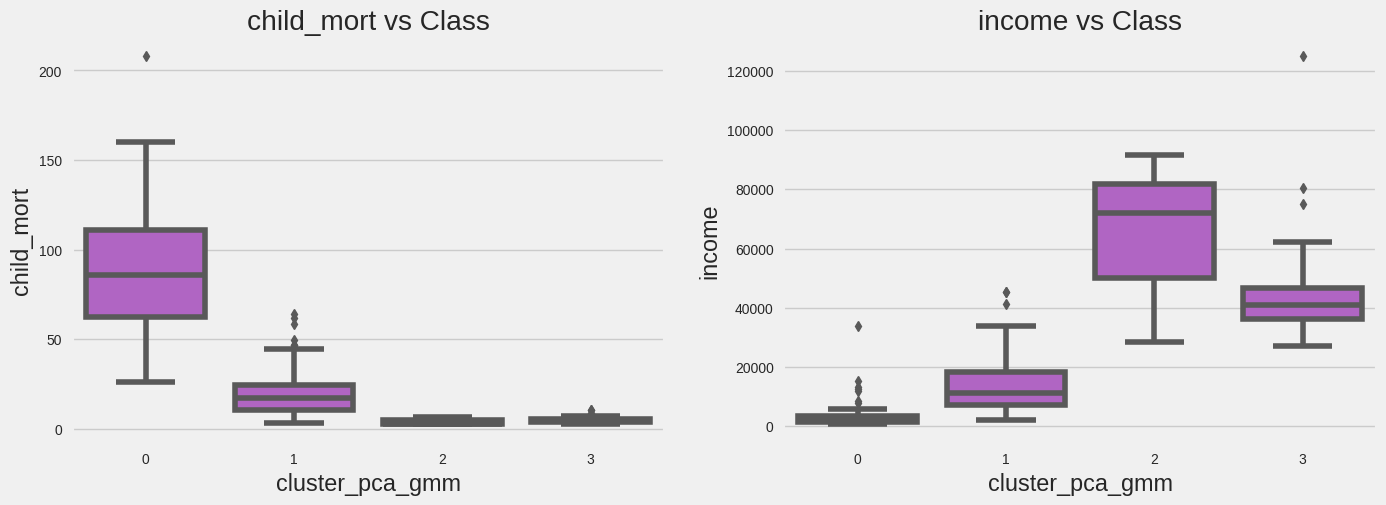

In [ ]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

plt.subplot(1,2,1)
sns.boxplot(x = 'cluster_pca_gmm', y = 'child_mort', data  = pca_data_with_final_cluster, color = '#BA55D3');
plt.title('child_mort vs Class')

plt.subplot(1,2,2)
sns.boxplot(x = 'cluster_pca_gmm', y = 'income', data  = pca_data_with_final_cluster, color = '#BA55D3');
plt.title('income vs Class')
plt.show()

Text(0.5, 1.0, 'gdp vs Class')

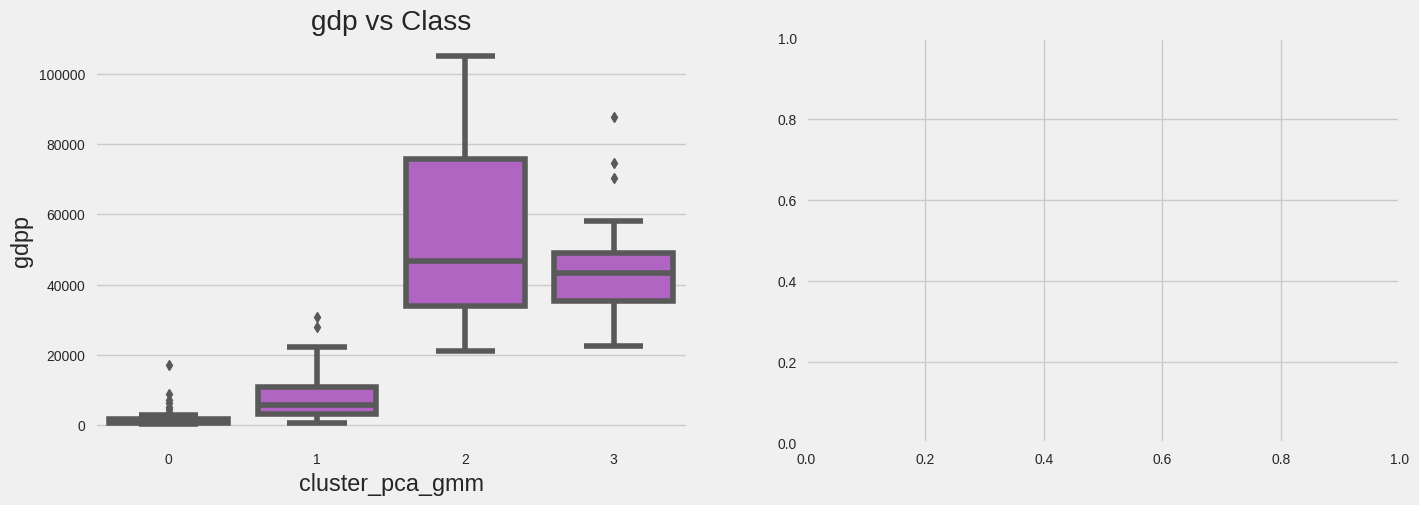

In [ ]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

plt.subplot(1,2,1)
sns.boxplot(x = 'cluster_pca_gmm', y = 'gdpp', data  = pca_data_with_final_cluster, color = '#BA55D3');
plt.title('gdp vs Class')

In [ ]:
from statistics import mean

pca_cluster_gdp_avg_list=[]
pca_cluster = pca_data_with_final_cluster[pca_data_with_final_cluster.cluster_pca_gmm == 0]
cluster_0=np.array(pca_cluster.gdpp)
pca_avg_gdp_cluster_0 = mean(cluster_0)
pca_cluster_gdp_avg_list.append(pca_avg_gdp_cluster_0)
print("Average GDP of Cluster_0 :",pca_avg_gdp_cluster_0)


pca_cluster = pca_data_with_final_cluster[pca_data_with_final_cluster.cluster_pca_gmm == 1]
cluster_1=np.array(pca_cluster.gdpp)
pca_avg_gdp_cluster_1 = mean(cluster_1)
pca_cluster_gdp_avg_list.append(pca_avg_gdp_cluster_1)
print("Average GDP of Cluster_1 :",pca_avg_gdp_cluster_1)

pca_cluster = pca_data_with_final_cluster[pca_data_with_final_cluster.cluster_pca_gmm == 2]
cluster_2=np.array(pca_cluster.gdpp)
pca_avg_gdp_cluster_2 = mean(cluster_2)
pca_cluster_gdp_avg_list.append(pca_avg_gdp_cluster_2)
print("Average GDP of Cluster_2 :",pca_avg_gdp_cluster_2)

pca_cluster = pca_data_with_final_cluster[pca_data_with_final_cluster.cluster_pca_gmm == 3]
cluster_3=np.array(pca_cluster.gdpp)
pca_avg_gdp_cluster_3 = mean(cluster_3)
pca_cluster_gdp_avg_list.append(pca_avg_gdp_cluster_3)
print("Average GDP of Cluster_3 :",pca_avg_gdp_cluster_3)

print("Average_GDP :",pca_cluster_gdp_avg_list)

Average GDP of Cluster_0 : 1939
Average GDP of Cluster_1 : 7670
Average GDP of Cluster_2 : 57566
Average GDP of Cluster_3 : 44539
Average_GDP : [1939, 7670, 57566, 44539]


In [ ]:
cluster_asssignment_pca=(cluster_assignment_length_4(pca_cluster_gdp_avg_list))
print(cluster_asssignment_pca)

{2: 'No Help Needed', 3: 'No Help Needed', 1: 'Might Need Help', 0: 'Help Needed'}


In [ ]:
for cluster_num in range (4):
  pca_data_with_final_cluster['cluster_pca_gmm'].iloc[pca_data_with_final_cluster['cluster_pca_gmm'] == cluster_num] = cluster_asssignment_pca[cluster_num]


fig = px.choropleth(pca_data_with_final_cluster[['country','cluster_pca_gmm']],
                    locationmode = 'country names',
                    locations = 'country',
                    title = 'Needed Help Per Country (World)',
                    color = pca_data_with_final_cluster['cluster_pca_gmm'],
                    color_discrete_map = {
                                          'Help Needed':'Red',
                                        'No Help Needed':'Green',
                                        'Might Need Help':'Yellow'
                                        }
                   )
fig.update_geos(fitbounds = "locations", visible = True)
fig.update_layout(legend_title_text = 'Labels',legend_title_side = 'top',title_pad_l = 260,title_y = 0.86)
fig.show(engine = 'kaleido')

In [ ]:
Needy_pca_gmm = pca_data_with_final_cluster[pca_data_with_final_cluster.cluster_pca_gmm == 'Help Needed']
Help_Needed_Countries_gmm=np.array(Needy_pca_gmm.country)
print(Help_Needed_Countries_gmm)

['Afghanistan' 'Angola' 'Benin' 'Botswana' 'Burkina Faso' 'Burundi'
 'Cameroon' 'Central African Republic' 'Chad' 'Comoros' 'Congo, Dem. Rep.'
 'Congo, Rep.' "Cote d'Ivoire" 'Equatorial Guinea' 'Eritrea' 'Gabon'
 'Gambia' 'Ghana' 'Guinea' 'Guinea-Bissau' 'Haiti' 'Iraq' 'Kenya'
 'Kiribati' 'Lao' 'Lesotho' 'Liberia' 'Madagascar' 'Malawi' 'Mali'
 'Mauritania' 'Micronesia, Fed. Sts.' 'Mongolia' 'Mozambique' 'Namibia'
 'Niger' 'Nigeria' 'Pakistan' 'Rwanda' 'Senegal' 'Sierra Leone'
 'Solomon Islands' 'South Africa' 'Sudan' 'Tajikistan' 'Tanzania'
 'Timor-Leste' 'Togo' 'Uganda' 'Vanuatu' 'Yemen' 'Zambia']


In [ ]:
Dict_with_cnt_of_needed_countries(Dict_pca_Help_Needed,Help_Needed_Countries_gmm)
print(Dict_pca_Help_Needed)

{'Afghanistan': 4, 'Angola': 4, 'Benin': 4, 'Botswana': 3, 'Burkina Faso': 4, 'Burundi': 4, 'Cameroon': 4, 'Central African Republic': 4, 'Chad': 4, 'Comoros': 4, 'Congo, Dem. Rep.': 4, 'Congo, Rep.': 4, "Cote d'Ivoire": 4, 'Equatorial Guinea': 4, 'Eritrea': 4, 'Gabon': 3, 'Gambia': 4, 'Ghana': 4, 'Guinea': 4, 'Guinea-Bissau': 4, 'Haiti': 4, 'Iraq': 3, 'Kenya': 4, 'Kiribati': 4, 'Lao': 3, 'Lesotho': 4, 'Liberia': 4, 'Madagascar': 4, 'Malawi': 4, 'Mali': 4, 'Mauritania': 4, 'Micronesia, Fed. Sts.': 4, 'Mozambique': 4, 'Namibia': 3, 'Niger': 4, 'Nigeria': 5, 'Pakistan': 4, 'Rwanda': 4, 'Senegal': 4, 'Sierra Leone': 4, 'Solomon Islands': 3, 'South Africa': 3, 'Sudan': 4, 'Tanzania': 4, 'Timor-Leste': 4, 'Togo': 4, 'Uganda': 4, 'Yemen': 4, 'Zambia': 4, 'Algeria': 1, 'Argentina': 1, 'Azerbaijan': 1, 'Bangladesh': 1, 'Bolivia': 1, 'Egypt': 1, 'India': 1, 'Indonesia': 1, 'Iran': 1, 'Kazakhstan': 1, 'Mongolia': 2, 'Myanmar': 1, 'Nepal': 1, 'Philippines': 1, 'Russia': 1, 'Sri Lanka': 1, 'Tajiki

#ii) On scaled data

In [ ]:
from sklearn.mixture import GaussianMixture
gmm_scaled = GaussianMixture(n_components=4)
gmm_scaled.fit(df_scaled)
labels_scaled_gmm = gmm_scaled.predict(df_scaled)

In [ ]:
print(labels_scaled_gmm)

[0 1 1 3 1 1 1 2 2 1 1 2 3 1 1 2 3 0 3 3 1 0 1 2 1 0 0 3 0 2 1 0 3 1 1 1 3
 3 3 1 0 1 2 1 2 1 1 1 1 3 3 1 3 2 2 3 0 1 2 3 2 1 1 3 0 3 0 1 2 3 1 1 1 2
 2 2 1 2 1 1 3 0 2 3 3 1 1 0 0 1 1 2 1 3 0 1 1 3 2 3 1 0 1 3 1 1 0 3 0 3 2
 2 3 3 2 2 3 1 1 1 3 1 2 2 1 1 0 0 2 0 1 1 0 2 1 2 0 0 2 2 1 1 3 1 2 2 3 0
 1 3 0 3 1 1 3 0 1 2 2 2 1 1 3 1 1 3 0]


In [ ]:
scaled_data_gmm= pd.Series(labels_scaled_gmm)
print(pd.concat({'count' : scaled_data_gmm.value_counts(), 'percent' : round(scaled_data_gmm.value_counts(normalize = True)*100, 2)}, axis = 1 ))

   count  percent
1     65    38.92
3     38    22.75
2     36    21.56
0     28    16.77


In [ ]:
scaled_data_gmm = pd.DataFrame(np.array(scaled_data_gmm), columns = ["scaled_gmm"])
print(scaled_data_gmm)

     scaled_gmm
0             0
1             1
2             1
3             3
4             1
..          ...
162           3
163           1
164           1
165           3
166           0

[167 rows x 1 columns]


In [ ]:
scaled_data_with_final_cluster = pd.concat([scaled_data_with_final_cluster,scaled_data_gmm], axis=1)
print(scaled_data_with_final_cluster)

                 country  child_mort   exports    health   imports    income  \
0            Afghanistan    1.291532 -1.138280  0.279088 -0.082455 -0.808245   
1                Albania   -0.538949 -0.479658 -0.097016  0.070837 -0.375369   
2                Algeria   -0.272833 -0.099122 -0.966073 -0.641762 -0.220844   
3                 Angola    2.007808  0.775381 -1.448071 -0.165315 -0.585043   
4    Antigua and Barbuda   -0.695634  0.160668 -0.286894  0.497568  0.101732   
..                   ...         ...       ...       ...       ...       ...   
162              Vanuatu   -0.225578  0.200917 -0.571711  0.240700 -0.738527   
163            Venezuela   -0.526514 -0.461363 -0.695862 -1.213499 -0.033542   
164              Vietnam   -0.372315  1.130305  0.008877  1.380030 -0.658404   
165                Yemen    0.448417 -0.406478 -0.597272 -0.517472 -0.658924   
166               Zambia    1.114951 -0.150348 -0.338015 -0.662477 -0.721358   

     inflation  life_expec  total_fer  

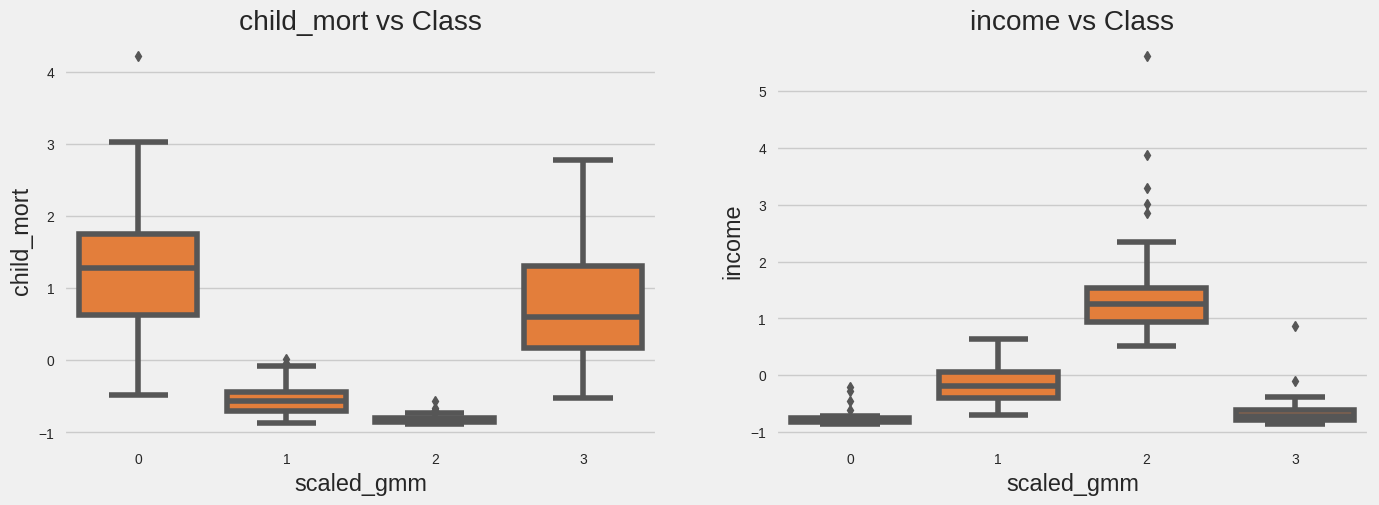

In [ ]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

plt.subplot(1,2,1)
sns.boxplot(x = 'scaled_gmm', y = 'child_mort', data  = scaled_data_with_final_cluster, color = '#FF781F');
plt.title('child_mort vs Class')

plt.subplot(1,2,2)
sns.boxplot(x = 'scaled_gmm', y = 'income', data  = scaled_data_with_final_cluster, color = '#FF781F');
plt.title('income vs Class')
plt.show()

Text(0.5, 1.0, 'gdp vs Class')

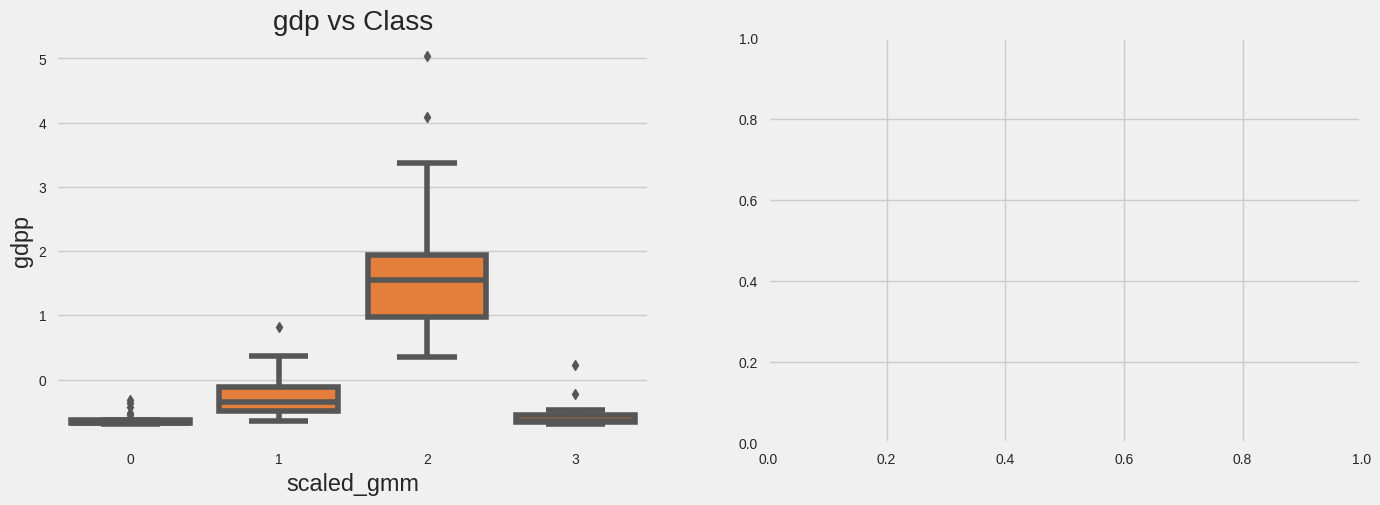

In [ ]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

plt.subplot(1,2,1)
sns.boxplot(x = 'scaled_gmm', y = 'gdpp', data  = scaled_data_with_final_cluster, color = '#FF781F');
plt.title('gdp vs Class')

In [ ]:
from statistics import mean

scaled_cluster_gdp_avg_list=[]
scaled_cluster_0 = scaled_data_with_final_cluster[scaled_data_with_final_cluster.scaled_gmm == 0]
cluster_0_gdp=np.array(scaled_cluster_0.gdpp)
scaled_avg_gdp_cluster_0 = mean(cluster_0_gdp)
scaled_cluster_gdp_avg_list.append(scaled_avg_gdp_cluster_0)
print("Average GDP of Cluster_0 :",scaled_avg_gdp_cluster_0)


scaled_cluster_1 = scaled_data_with_final_cluster[scaled_data_with_final_cluster.scaled_gmm == 1]
cluster_1_gdp=np.array(scaled_cluster_1.gdpp)
scaled_avg_gdp_cluster_1 = mean(cluster_1_gdp)
scaled_cluster_gdp_avg_list.append(scaled_avg_gdp_cluster_1)
print("Average GDP of Cluster_1 :",scaled_avg_gdp_cluster_1)

scaled_cluster_2 = scaled_data_with_final_cluster[scaled_data_with_final_cluster.scaled_gmm == 2]
cluster_2_gdp=np.array(scaled_cluster_2.gdpp)
scaled_avg_gdp_cluster_2 = mean(cluster_2_gdp)
scaled_cluster_gdp_avg_list.append(scaled_avg_gdp_cluster_2)
print("Average GDP of Cluster_2 :",scaled_avg_gdp_cluster_2)

scaled_cluster_3 = scaled_data_with_final_cluster[scaled_data_with_final_cluster.scaled_gmm == 3]
cluster_3_gdp=np.array(scaled_cluster_3.gdpp)
scaled_avg_gdp_cluster_3= mean(cluster_3_gdp)
scaled_cluster_gdp_avg_list.append(scaled_avg_gdp_cluster_3)
print("Average GDP of Cluster_3 :",scaled_avg_gdp_cluster_3)
print("Average_GDP :",scaled_cluster_gdp_avg_list)

Average GDP of Cluster_0 : -0.6266608593372631
Average GDP of Cluster_1 : -0.28635459084109105
Average GDP of Cluster_2 : 1.6193395588519437
Average GDP of Cluster_3 : -0.5825439908567285
Average_GDP : [-0.6266608593372631, -0.28635459084109105, 1.6193395588519437, -0.5825439908567285]


In [ ]:
cluster_asssignment_scaled=(cluster_assignment_length_4(scaled_cluster_gdp_avg_list))
print(cluster_asssignment_scaled)

{2: 'No Help Needed', 1: 'No Help Needed', 3: 'Might Need Help', 0: 'Help Needed'}


In [ ]:
for cluster_num in range (4):
  scaled_data_with_final_cluster['scaled_gmm'].iloc[scaled_data_with_final_cluster['scaled_gmm'] == cluster_num] = cluster_asssignment_scaled[cluster_num]

fig = px.choropleth(scaled_data_with_final_cluster[['country','scaled_gmm']],
                    locationmode = 'country names',
                    locations = 'country',
                    title = 'Needed Help Per Country (World)',
                    color = scaled_data_with_final_cluster['scaled_gmm'],
                    color_discrete_map = {
                                          'Help Needed':'Red',
                                        'No Help Needed':'Green',
                                        'Might Need Help':'Yellow'
                                        }
                   )
fig.update_geos(fitbounds = "locations", visible = True)
fig.update_layout(legend_title_text = 'Labels',legend_title_side = 'top',title_pad_l = 260,title_y = 0.86)
fig.show(engine = 'kaleido')

In [ ]:
Needy_scaled_gmm = scaled_data_with_final_cluster[scaled_data_with_final_cluster.scaled_gmm == 'Help Needed']
Help_Needed_Countries_gmm_scaled=np.array(Needy_scaled_gmm.country)
print(Help_Needed_Countries_gmm_scaled)

['Afghanistan' 'Benin' 'Botswana' 'Burkina Faso' 'Burundi' 'Cameroon'
 'Central African Republic' "Cote d'Ivoire" 'Gambia' 'Guinea-Bissau'
 'Haiti' 'Kiribati' 'Lesotho' 'Liberia' 'Malawi' 'Micronesia, Fed. Sts.'
 'Mozambique' 'Namibia' 'Rwanda' 'Samoa' 'Senegal' 'Sierra Leone'
 'Solomon Islands' 'South Africa' 'Tanzania' 'Togo' 'Uganda' 'Zambia']


In [ ]:
Dict_with_cnt_of_needed_countries(Dict_scaled_Help_Needed,Help_Needed_Countries_gmm_scaled)
print(Dict_scaled_Help_Needed)

{'Afghanistan': 4, 'Angola': 2, 'Benin': 4, 'Botswana': 2, 'Burkina Faso': 4, 'Burundi': 4, 'Cameroon': 4, 'Central African Republic': 5, 'Chad': 4, 'Comoros': 3, 'Congo, Dem. Rep.': 3, 'Congo, Rep.': 2, "Cote d'Ivoire": 4, 'Equatorial Guinea': 2, 'Eritrea': 2, 'Gabon': 1, 'Gambia': 4, 'Ghana': 2, 'Guinea': 3, 'Guinea-Bissau': 4, 'Haiti': 5, 'Iraq': 1, 'Kenya': 3, 'Kiribati': 3, 'Lao': 1, 'Lesotho': 4, 'Liberia': 3, 'Madagascar': 3, 'Malawi': 4, 'Mali': 4, 'Mauritania': 2, 'Mozambique': 4, 'Myanmar': 1, 'Namibia': 2, 'Niger': 3, 'Nigeria': 1, 'Pakistan': 2, 'Rwanda': 4, 'Senegal': 4, 'Sierra Leone': 5, 'South Africa': 2, 'Sudan': 2, 'Tanzania': 4, 'Timor-Leste': 2, 'Togo': 4, 'Uganda': 4, 'Yemen': 2, 'Zambia': 4, 'Micronesia, Fed. Sts.': 2, 'Samoa': 1, 'Solomon Islands': 1}


#Using neural network

#Method 7 : Autoencoders using Python and TensorFlow:

In [ ]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Autoencoders are a type of neural network that are used for unsupervised learning. They are commonly used for tasks such as image and speech recognition, data compression, and feature extraction.**

#i) On pca data

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

# Define autoencoder model
model_autoencoder = Sequential()
model_autoencoder.add(Dense(units=10, input_dim=data_pca_selected.shape[1], activation='relu'))
model_autoencoder.add(Dense(units=data_pca_selected.shape[1], activation='linear'))
model_autoencoder.compile(loss='mse', optimizer=Adam(lr=0.01))

# Train autoencoder model
model_autoencoder.fit(data_pca_selected, data_pca_selected, epochs=100, verbose=0)

# Get compressed representation of data
compressed_autoencoder = model_autoencoder.predict(data_pca_selected)

# Cluster using k-means
from sklearn.cluster import KMeans
kmeans_autoencoder = KMeans(n_clusters=4, random_state=42)
clusters_autoencoder = kmeans_autoencoder.fit_predict(compressed_autoencoder)


6/6 [==============================] - 0s 2ms/step


In [ ]:
print(clusters_autoencoder)

[1 2 2 1 2 2 2 0 0 2 2 0 1 2 2 0 2 1 2 1 2 1 2 0 2 1 1 2 1 0 2 1 1 2 2 2 1
 1 1 2 1 2 0 0 0 2 2 1 2 2 1 2 2 0 0 1 1 2 0 1 0 2 1 1 1 2 1 2 0 1 2 2 1 3
 0 0 2 0 2 2 1 1 0 2 1 2 2 1 1 2 2 3 2 1 1 2 2 1 3 1 2 2 2 2 2 2 1 1 1 1 0
 0 1 1 0 2 1 2 2 2 1 2 0 0 2 2 1 1 2 1 2 3 1 3 0 0 2 1 0 0 2 2 1 2 0 0 1 1
 2 1 1 1 2 2 2 1 2 0 0 0 2 1 1 2 2 1 1]


In [ ]:
autoencoder_pca_data= pd.Series(clusters_autoencoder)
print(pd.concat({'count' : autoencoder_pca_data.value_counts(), 'percent' : round(autoencoder_pca_data.value_counts(normalize = True)*100, 2)}, axis = 1 ))

   count  percent
2     71    42.51
1     59    35.33
0     32    19.16
3      5     2.99


In [ ]:
autoencoder_pca_data = pd.DataFrame(np.array(autoencoder_pca_data), columns = ["cluster_pca_autoencoder"])
print(autoencoder_pca_data)

     cluster_pca_autoencoder
0                          1
1                          2
2                          2
3                          1
4                          2
..                       ...
162                        1
163                        2
164                        2
165                        1
166                        1

[167 rows x 1 columns]


In [ ]:
pca_data_with_final_cluster = pd.concat([pca_data_with_final_cluster,autoencoder_pca_data], axis=1)
print(pca_data_with_final_cluster)

                 country  child_mort  exports  health  imports  income  \
0            Afghanistan        90.2     10.0    7.58     44.9    1610   
1                Albania        16.6     28.0    6.55     48.6    9930   
2                Algeria        27.3     38.4    4.17     31.4   12900   
3                 Angola       119.0     62.3    2.85     42.9    5900   
4    Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   
..                   ...         ...      ...     ...      ...     ...   
162              Vanuatu        29.2     46.6    5.25     52.7    2950   
163            Venezuela        17.1     28.5    4.91     17.6   16500   
164              Vietnam        23.3     72.0    6.84     80.2    4490   
165                Yemen        56.3     30.0    5.18     34.4    4480   
166               Zambia        83.1     37.0    5.89     30.9    3280   

     inflation  life_expec  total_fer   gdpp  ...       PC2       PC3  \
0         9.44        56.2       5.82 

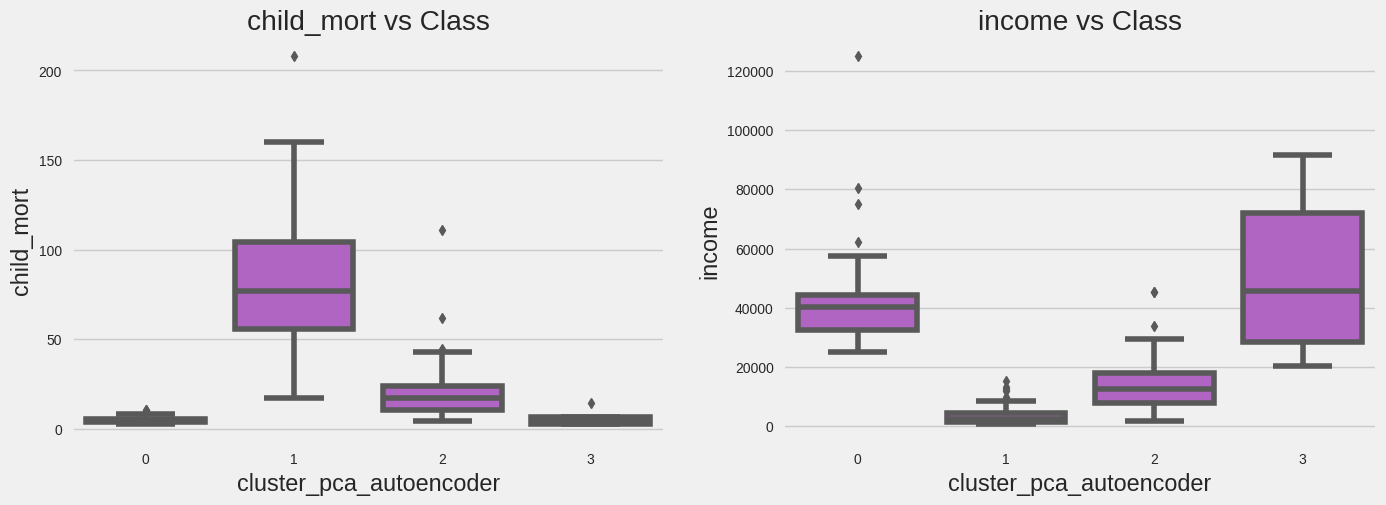

In [ ]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

plt.subplot(1,2,1)
sns.boxplot(x = 'cluster_pca_autoencoder', y = 'child_mort', data  = pca_data_with_final_cluster, color = '#BA55D3');
plt.title('child_mort vs Class')

plt.subplot(1,2,2)
sns.boxplot(x = 'cluster_pca_autoencoder', y = 'income', data  = pca_data_with_final_cluster, color = '#BA55D3');
plt.title('income vs Class')
plt.show()

Text(0.5, 1.0, 'gdp vs Class')

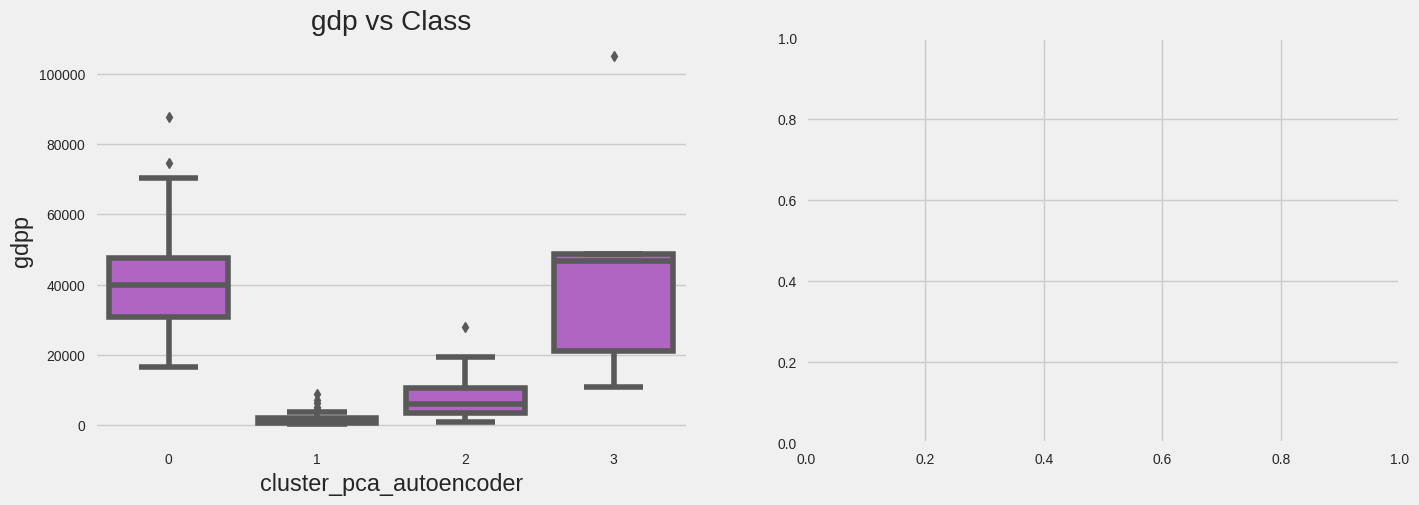

In [ ]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

plt.subplot(1,2,1)
sns.boxplot(x = 'cluster_pca_autoencoder', y = 'gdpp', data  = pca_data_with_final_cluster, color = '#BA55D3');
plt.title('gdp vs Class')

In [ ]:
from statistics import mean

pca_cluster_gdp_avg_list=[]
pca_cluster = pca_data_with_final_cluster[pca_data_with_final_cluster.cluster_pca_autoencoder == 0]
cluster_0=np.array(pca_cluster.gdpp)
pca_avg_gdp_cluster_0 = mean(cluster_0)
pca_cluster_gdp_avg_list.append(pca_avg_gdp_cluster_0)
print("Average GDP of Cluster_0 :",pca_avg_gdp_cluster_0)


pca_cluster = pca_data_with_final_cluster[pca_data_with_final_cluster.cluster_pca_autoencoder == 1]
cluster_1=np.array(pca_cluster.gdpp)
pca_avg_gdp_cluster_1 = mean(cluster_1)
pca_cluster_gdp_avg_list.append(pca_avg_gdp_cluster_1)
print("Average GDP of Cluster_1 :",pca_avg_gdp_cluster_1)

pca_cluster = pca_data_with_final_cluster[pca_data_with_final_cluster.cluster_pca_autoencoder == 2]
cluster_2=np.array(pca_cluster.gdpp)
pca_avg_gdp_cluster_2 = mean(cluster_2)
pca_cluster_gdp_avg_list.append(pca_avg_gdp_cluster_2)
print("Average GDP of Cluster_2 :",pca_avg_gdp_cluster_2)

pca_cluster = pca_data_with_final_cluster[pca_data_with_final_cluster.cluster_pca_autoencoder == 3]
cluster_3=np.array(pca_cluster.gdpp)
pca_avg_gdp_cluster_3 = mean(cluster_3)
pca_cluster_gdp_avg_list.append(pca_avg_gdp_cluster_3)
print("Average GDP of Cluster_3 :",pca_avg_gdp_cluster_3)

print("Average_GDP :",pca_cluster_gdp_avg_list)

Average GDP of Cluster_0 : 40887
Average GDP of Cluster_1 : 1670
Average GDP of Cluster_2 : 7406
Average GDP of Cluster_3 : 46440
Average_GDP : [40887, 1670, 7406, 46440]


In [ ]:
cluster_asssignment_pca=(cluster_assignment_length_4(pca_cluster_gdp_avg_list))
print(cluster_asssignment_pca)

{3: 'No Help Needed', 0: 'No Help Needed', 2: 'Might Need Help', 1: 'Help Needed'}


In [ ]:
for cluster_num in range (4):
  pca_data_with_final_cluster['cluster_pca_autoencoder'].iloc[pca_data_with_final_cluster['cluster_pca_autoencoder'] == cluster_num] = cluster_asssignment_pca[cluster_num]

fig = px.choropleth(pca_data_with_final_cluster[['country','cluster_pca_autoencoder']],
                    locationmode = 'country names',
                    locations = 'country',
                    title = 'Needed Help Per Country (World)',
                    color = pca_data_with_final_cluster['cluster_pca_autoencoder'],
                    color_discrete_map = {'Help Needed':'Red',
                                        'No Help Needed':'Green',
                                        'Might Need Help':'Yellow'
                                        }
                   )
fig.update_geos(fitbounds = "locations", visible = True)
fig.update_layout(legend_title_text = 'Labels',legend_title_side = 'top',title_pad_l = 260,title_y = 0.86)
fig.show(engine = 'kaleido')

In [ ]:
Needy_pca_autoencoder = pca_data_with_final_cluster[pca_data_with_final_cluster.cluster_pca_autoencoder == 'Help Needed']
Help_Needed_Countries_autoencoder=np.array(Needy_pca_autoencoder.country)
print(Help_Needed_Countries_autoencoder)

['Afghanistan' 'Angola' 'Bangladesh' 'Benin' 'Bolivia' 'Botswana'
 'Burkina Faso' 'Burundi' 'Cameroon' 'Central African Republic' 'Chad'
 'Comoros' 'Congo, Dem. Rep.' 'Congo, Rep.' "Cote d'Ivoire" 'Egypt'
 'Eritrea' 'Gabon' 'Gambia' 'Ghana' 'Guatemala' 'Guinea' 'Guinea-Bissau'
 'Haiti' 'India' 'Iraq' 'Kenya' 'Kiribati' 'Lao' 'Lesotho' 'Liberia'
 'Madagascar' 'Malawi' 'Mali' 'Mauritania' 'Mozambique' 'Myanmar'
 'Namibia' 'Nepal' 'Niger' 'Nigeria' 'Pakistan' 'Philippines' 'Rwanda'
 'Samoa' 'Senegal' 'Sierra Leone' 'South Africa' 'Sudan' 'Tajikistan'
 'Tanzania' 'Timor-Leste' 'Togo' 'Tonga' 'Uganda' 'Uzbekistan' 'Vanuatu'
 'Yemen' 'Zambia']


In [ ]:
Dict_with_cnt_of_needed_countries(Dict_pca_Help_Needed,Help_Needed_Countries_autoencoder)
print(Dict_pca_Help_Needed)

{'Afghanistan': 5, 'Angola': 5, 'Benin': 5, 'Botswana': 4, 'Burkina Faso': 5, 'Burundi': 5, 'Cameroon': 5, 'Central African Republic': 5, 'Chad': 5, 'Comoros': 5, 'Congo, Dem. Rep.': 5, 'Congo, Rep.': 5, "Cote d'Ivoire": 5, 'Equatorial Guinea': 4, 'Eritrea': 5, 'Gabon': 4, 'Gambia': 5, 'Ghana': 5, 'Guinea': 5, 'Guinea-Bissau': 5, 'Haiti': 5, 'Iraq': 4, 'Kenya': 5, 'Kiribati': 5, 'Lao': 4, 'Lesotho': 5, 'Liberia': 5, 'Madagascar': 5, 'Malawi': 5, 'Mali': 5, 'Mauritania': 5, 'Micronesia, Fed. Sts.': 4, 'Mozambique': 5, 'Namibia': 4, 'Niger': 5, 'Nigeria': 6, 'Pakistan': 5, 'Rwanda': 5, 'Senegal': 5, 'Sierra Leone': 5, 'Solomon Islands': 3, 'South Africa': 4, 'Sudan': 5, 'Tanzania': 5, 'Timor-Leste': 5, 'Togo': 5, 'Uganda': 5, 'Yemen': 5, 'Zambia': 5, 'Algeria': 1, 'Argentina': 1, 'Azerbaijan': 1, 'Bangladesh': 2, 'Bolivia': 2, 'Egypt': 2, 'India': 2, 'Indonesia': 1, 'Iran': 1, 'Kazakhstan': 1, 'Mongolia': 2, 'Myanmar': 2, 'Nepal': 2, 'Philippines': 2, 'Russia': 1, 'Sri Lanka': 1, 'Tajiki

#ii) on scaled data

In [ ]:
# Define autoencoder model
model_autoencoder_scaled = Sequential()
model_autoencoder_scaled.add(Dense(units=10, input_dim=data_pca_selected.shape[1], activation='relu'))
model_autoencoder_scaled.add(Dense(units=data_pca_selected.shape[1], activation='linear'))
model_autoencoder_scaled.compile(loss='mse', optimizer=Adam(lr=0.01))

# Train autoencoder model
model_autoencoder_scaled.fit(data_pca_selected, data_pca_selected, epochs=100, verbose=0)

# Get compressed representation of data
compressed_autoencoder_scaled = model_autoencoder_scaled.predict(data_pca_selected)

# Cluster using k-means
from sklearn.cluster import KMeans
kmeans_autoencoder_scaled = KMeans(n_clusters=4, random_state=42)
clusters_autoencoder_scaled = kmeans_autoencoder_scaled.fit_predict(compressed_autoencoder_scaled)


6/6 [==============================] - 0s 2ms/step


In [ ]:
print(clusters_autoencoder_scaled)

[2 0 0 2 0 0 0 1 1 0 0 0 0 0 0 1 0 2 0 0 0 0 0 1 0 2 2 0 2 1 0 2 2 0 0 0 2
 2 0 0 2 0 1 0 1 0 0 0 0 2 2 0 0 1 1 2 2 0 1 2 1 0 0 2 2 0 2 0 1 0 0 0 2 1
 1 1 0 1 0 0 2 2 1 0 2 0 0 2 2 0 0 3 0 2 2 0 0 2 3 2 0 0 0 0 0 0 2 2 0 0 1
 1 2 2 1 0 2 0 0 0 0 0 1 1 0 0 2 0 0 2 0 0 2 3 0 1 0 2 1 1 0 0 2 0 1 1 0 2
 0 2 2 0 0 0 0 2 0 1 1 1 0 0 0 0 0 2 2]


In [ ]:
autoencoder_scaled_data= pd.Series(clusters_autoencoder_scaled)
print(pd.concat({'count' : autoencoder_scaled_data.value_counts(), 'percent' : round(autoencoder_scaled_data.value_counts(normalize = True)*100, 2)}, axis = 1 ))

   count  percent
0     89    53.29
2     45    26.95
1     30    17.96
3      3     1.80


In [ ]:
autoencoder_scaled_data = pd.DataFrame(np.array(autoencoder_scaled_data), columns = ["cluster_scaled_autoencoder"])
print(autoencoder_scaled_data)

     cluster_scaled_autoencoder
0                             2
1                             0
2                             0
3                             2
4                             0
..                          ...
162                           0
163                           0
164                           0
165                           2
166                           2

[167 rows x 1 columns]


In [ ]:
scaled_data_with_final_cluster = pd.concat([scaled_data_with_final_cluster,autoencoder_scaled_data], axis=1)
print(scaled_data_with_final_cluster)

                 country  child_mort   exports    health   imports    income  \
0            Afghanistan    1.291532 -1.138280  0.279088 -0.082455 -0.808245   
1                Albania   -0.538949 -0.479658 -0.097016  0.070837 -0.375369   
2                Algeria   -0.272833 -0.099122 -0.966073 -0.641762 -0.220844   
3                 Angola    2.007808  0.775381 -1.448071 -0.165315 -0.585043   
4    Antigua and Barbuda   -0.695634  0.160668 -0.286894  0.497568  0.101732   
..                   ...         ...       ...       ...       ...       ...   
162              Vanuatu   -0.225578  0.200917 -0.571711  0.240700 -0.738527   
163            Venezuela   -0.526514 -0.461363 -0.695862 -1.213499 -0.033542   
164              Vietnam   -0.372315  1.130305  0.008877  1.380030 -0.658404   
165                Yemen    0.448417 -0.406478 -0.597272 -0.517472 -0.658924   
166               Zambia    1.114951 -0.150348 -0.338015 -0.662477 -0.721358   

     inflation  life_expec  total_fer  

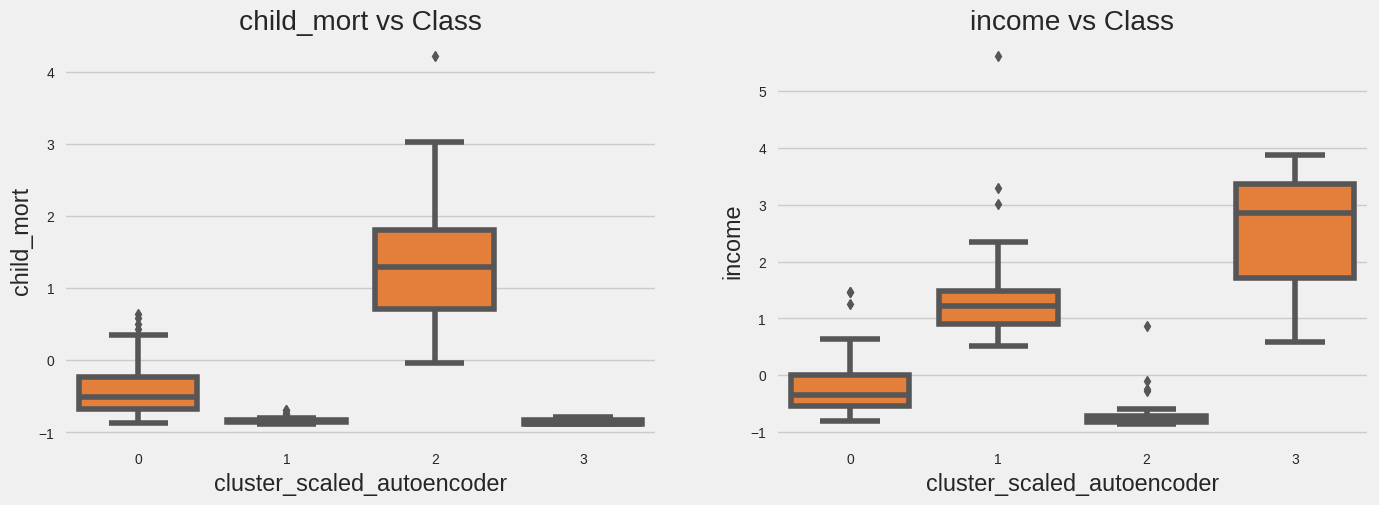

In [ ]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

plt.subplot(1,2,1)
sns.boxplot(x = 'cluster_scaled_autoencoder', y = 'child_mort', data  = scaled_data_with_final_cluster, color = '#FF781F');
plt.title('child_mort vs Class')

plt.subplot(1,2,2)
sns.boxplot(x = 'cluster_scaled_autoencoder', y = 'income', data  = scaled_data_with_final_cluster, color = '#FF781F');
plt.title('income vs Class')
plt.show()

Text(0.5, 1.0, 'gdp vs Class')

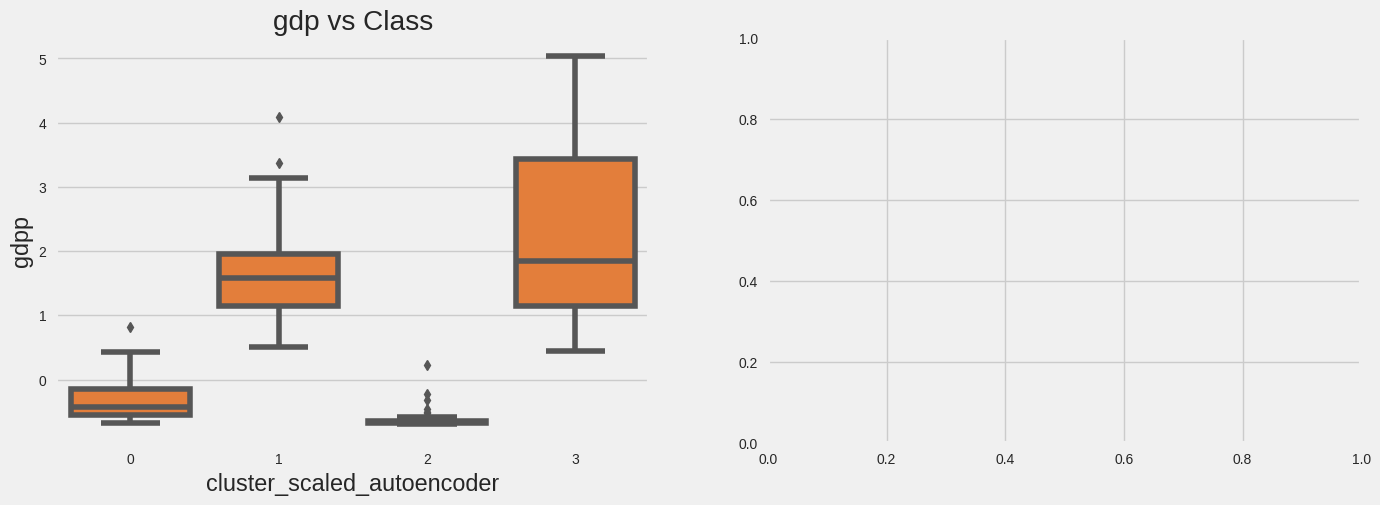

In [ ]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

plt.subplot(1,2,1)
sns.boxplot(x = 'cluster_scaled_autoencoder', y = 'gdpp', data  = scaled_data_with_final_cluster, color = '#FF781F');
plt.title('gdp vs Class')

In [ ]:
from statistics import mean

scaled_cluster_gdp_avg_list=[]
scaled_cluster_0 = scaled_data_with_final_cluster[scaled_data_with_final_cluster.cluster_scaled_autoencoder == 0]
cluster_0_gdp=np.array(scaled_cluster_0.gdpp)
scaled_avg_gdp_cluster_0 = mean(cluster_0_gdp)
scaled_cluster_gdp_avg_list.append(scaled_avg_gdp_cluster_0)
print("Average GDP of Cluster_0 :",scaled_avg_gdp_cluster_0)


scaled_cluster_1 = scaled_data_with_final_cluster[scaled_data_with_final_cluster.cluster_scaled_autoencoder == 1]
cluster_1_gdp=np.array(scaled_cluster_1.gdpp)
scaled_avg_gdp_cluster_1 = mean(cluster_1_gdp)
scaled_cluster_gdp_avg_list.append(scaled_avg_gdp_cluster_1)
print("Average GDP of Cluster_1 :",scaled_avg_gdp_cluster_1)

scaled_cluster_2 = scaled_data_with_final_cluster[scaled_data_with_final_cluster.cluster_scaled_autoencoder == 2]
cluster_2_gdp=np.array(scaled_cluster_2.gdpp)
scaled_avg_gdp_cluster_2 = mean(cluster_2_gdp)
scaled_cluster_gdp_avg_list.append(scaled_avg_gdp_cluster_2)
print("Average GDP of Cluster_2 :",scaled_avg_gdp_cluster_2)

scaled_cluster_3 = scaled_data_with_final_cluster[scaled_data_with_final_cluster.cluster_scaled_autoencoder == 3]
cluster_3_gdp=np.array(scaled_cluster_3.gdpp)
scaled_avg_gdp_cluster_3= mean(cluster_3_gdp)
scaled_cluster_gdp_avg_list.append(scaled_avg_gdp_cluster_3)
print("Average GDP of Cluster_3 :",scaled_avg_gdp_cluster_3)
print("Average_GDP :",scaled_cluster_gdp_avg_list)

Average GDP of Cluster_0 : -0.3311411562785923
Average GDP of Cluster_1 : 1.6619021388317754
Average GDP of Cluster_2 : -0.6157309625232585
Average GDP of Cluster_3 : 2.440797352462698
Average_GDP : [-0.3311411562785923, 1.6619021388317754, -0.6157309625232585, 2.440797352462698]


In [ ]:
cluster_asssignment_scaled=(cluster_assignment_length_4(scaled_cluster_gdp_avg_list))
print(cluster_asssignment_scaled)

{3: 'No Help Needed', 1: 'No Help Needed', 0: 'Might Need Help', 2: 'Help Needed'}


In [ ]:
for cluster_num in range (4):
  scaled_data_with_final_cluster['cluster_scaled_autoencoder'].iloc[scaled_data_with_final_cluster['cluster_scaled_autoencoder'] == cluster_num] = cluster_asssignment_scaled[cluster_num]

fig = px.choropleth(scaled_data_with_final_cluster[['country','cluster_scaled_autoencoder']],
                    locationmode = 'country names',
                    locations = 'country',
                    title = 'Needed Help Per Country (World)',
                    color = scaled_data_with_final_cluster['cluster_scaled_autoencoder'],
                    color_discrete_map = {'Help Needed':'Red',
                                        'No Help Needed':'Green',
                                        'Might Need Help':'Yellow'
                                        }
                   )
fig.update_geos(fitbounds = "locations", visible = True)
fig.update_layout(legend_title_text = 'Labels',legend_title_side = 'top',title_pad_l = 260,title_y = 0.86)
fig.show(engine = 'kaleido')

In [ ]:
Needy_scaled_autoencoder = scaled_data_with_final_cluster[scaled_data_with_final_cluster.cluster_scaled_autoencoder == 'Help Needed']
Help_Needed_Countries_autoencoder_scaled=np.array(Needy_scaled_autoencoder.country)
print(Help_Needed_Countries_autoencoder_scaled)

['Afghanistan' 'Angola' 'Benin' 'Burkina Faso' 'Burundi' 'Cameroon'
 'Central African Republic' 'Chad' 'Comoros' 'Congo, Dem. Rep.'
 "Cote d'Ivoire" 'Equatorial Guinea' 'Eritrea' 'Gabon' 'Gambia' 'Ghana'
 'Guinea' 'Guinea-Bissau' 'Haiti' 'Iraq' 'Kenya' 'Kiribati' 'Lao'
 'Lesotho' 'Liberia' 'Madagascar' 'Malawi' 'Mali' 'Mauritania'
 'Mozambique' 'Myanmar' 'Niger' 'Nigeria' 'Pakistan' 'Rwanda' 'Senegal'
 'Sierra Leone' 'South Africa' 'Sudan' 'Tanzania' 'Timor-Leste' 'Togo'
 'Uganda' 'Yemen' 'Zambia']


In [ ]:
Dict_with_cnt_of_needed_countries(Dict_scaled_Help_Needed,Help_Needed_Countries_autoencoder_scaled)
print(Dict_scaled_Help_Needed)

{'Afghanistan': 5, 'Angola': 3, 'Benin': 5, 'Botswana': 2, 'Burkina Faso': 5, 'Burundi': 5, 'Cameroon': 5, 'Central African Republic': 6, 'Chad': 5, 'Comoros': 4, 'Congo, Dem. Rep.': 4, 'Congo, Rep.': 2, "Cote d'Ivoire": 5, 'Equatorial Guinea': 3, 'Eritrea': 3, 'Gabon': 2, 'Gambia': 5, 'Ghana': 3, 'Guinea': 4, 'Guinea-Bissau': 5, 'Haiti': 6, 'Iraq': 2, 'Kenya': 4, 'Kiribati': 4, 'Lao': 2, 'Lesotho': 5, 'Liberia': 4, 'Madagascar': 4, 'Malawi': 5, 'Mali': 5, 'Mauritania': 3, 'Mozambique': 5, 'Myanmar': 2, 'Namibia': 2, 'Niger': 4, 'Nigeria': 2, 'Pakistan': 3, 'Rwanda': 5, 'Senegal': 5, 'Sierra Leone': 6, 'South Africa': 3, 'Sudan': 3, 'Tanzania': 5, 'Timor-Leste': 3, 'Togo': 5, 'Uganda': 5, 'Yemen': 3, 'Zambia': 5, 'Micronesia, Fed. Sts.': 2, 'Samoa': 1, 'Solomon Islands': 1}


#Conclusion

1)**We discarded the DBSCAN method, because it is not showing good results.**


2)**Rest of the models are giving appropriate results that support each other.
As it is difficult to discard other clustering methods ,We will use all other methods and maintain the frequency of occurrence of each country in the ‘Needy country’ cluster using Dictionary.**


3)**To remove anomalies in the model results, we are using a method similar to voting.**


4)**We will use a threshold to remove the countries due to the anomalies in the model and place the countries in a sequence so that we know how to distribute our money.**

In [ ]:
intersected_dict_with_count_whole={}
for key in Dict_pca_Help_Needed:
  if key in Dict_scaled_Help_Needed:
    intersected_dict_with_count_whole[key]=Dict_pca_Help_Needed[key]+Dict_scaled_Help_Needed[key]
  else:
    intersected_dict_with_count_whole[key]= Dict_pca_Help_Needed[key]

Final_df_combo_help_needed_whole = pd.DataFrame(list(intersected_dict_with_count_whole.items()))
Final_df_combo_help_needed_whole.columns=['country','count_scaled']
Final_df_combo_help_needed_whole=Final_df_combo_help_needed_whole.sort_values(by=['count_scaled'],ascending=False)
Final_df_combo_help_needed_whole = pd.DataFrame(np.array(Final_df_combo_help_needed_whole), columns = ['country','count_combo'])
print(Final_df_combo_help_needed_whole)

                     country count_combo
0   Central African Republic          11
1               Sierra Leone          11
2                      Haiti          11
3                Afghanistan          10
4                       Togo          10
..                       ...         ...
67                 Venezuela           1
68                 Argentina           1
69                 Guatemala           1
70                   Algeria           1
71                     Tonga           1

[72 rows x 2 columns]


Below dictionary gives the frequency of being in the needy cluster in decreasing order.

In [ ]:
most_needy_countries_dict={}
for key in intersected_dict_with_count_whole:
    if intersected_dict_with_count_whole[key]>=6:
      most_needy_countries_dict[key]=intersected_dict_with_count_whole[key]
print(most_needy_countries_dict)


{'Afghanistan': 10, 'Angola': 8, 'Benin': 10, 'Botswana': 6, 'Burkina Faso': 10, 'Burundi': 10, 'Cameroon': 10, 'Central African Republic': 11, 'Chad': 10, 'Comoros': 9, 'Congo, Dem. Rep.': 9, 'Congo, Rep.': 7, "Cote d'Ivoire": 10, 'Equatorial Guinea': 7, 'Eritrea': 8, 'Gabon': 6, 'Gambia': 10, 'Ghana': 8, 'Guinea': 9, 'Guinea-Bissau': 10, 'Haiti': 11, 'Iraq': 6, 'Kenya': 9, 'Kiribati': 9, 'Lao': 6, 'Lesotho': 10, 'Liberia': 9, 'Madagascar': 9, 'Malawi': 10, 'Mali': 10, 'Mauritania': 8, 'Micronesia, Fed. Sts.': 6, 'Mozambique': 10, 'Namibia': 6, 'Niger': 9, 'Nigeria': 8, 'Pakistan': 8, 'Rwanda': 10, 'Senegal': 10, 'Sierra Leone': 11, 'South Africa': 7, 'Sudan': 8, 'Tanzania': 10, 'Timor-Leste': 8, 'Togo': 10, 'Uganda': 10, 'Yemen': 8, 'Zambia': 10}


In [ ]:
most_needy_countries_df = pd.DataFrame(list(most_needy_countries_dict.items()))
most_needy_countries_df.columns=['country','frequency_of_occurance']
most_needy_countries_df=most_needy_countries_df.sort_values(by=['frequency_of_occurance'],ascending=False)
most_needy_countries_df = pd.DataFrame(np.array(most_needy_countries_df), columns = ['country','frequency_of_occurance'])
print(most_needy_countries_df)

                     country frequency_of_occurance
0               Sierra Leone                     11
1   Central African Republic                     11
2                      Haiti                     11
3                Afghanistan                     10
4                     Gambia                     10
5                     Uganda                     10
6                       Togo                     10
7                   Tanzania                     10
8                    Senegal                     10
9                     Rwanda                     10
10                Mozambique                     10
11                      Mali                     10
12                    Malawi                     10
13                   Lesotho                     10
14             Guinea-Bissau                     10
15                    Zambia                     10
16              Burkina Faso                     10
17             Cote d'Ivoire                     10
18          

In [ ]:
most_needy_countries=(np.array(most_needy_countries_df['country']))
print("Most_needy_countries_in_decending_order_of_priorities  :-")
print(most_needy_countries)

Most_needy_countries_in_decending_order_of_priorities  :-
['Sierra Leone' 'Central African Republic' 'Haiti' 'Afghanistan' 'Gambia'
 'Uganda' 'Togo' 'Tanzania' 'Senegal' 'Rwanda' 'Mozambique' 'Mali'
 'Malawi' 'Lesotho' 'Guinea-Bissau' 'Zambia' 'Burkina Faso'
 "Cote d'Ivoire" 'Burundi' 'Cameroon' 'Chad' 'Benin' 'Niger' 'Madagascar'
 'Liberia' 'Comoros' 'Congo, Dem. Rep.' 'Kiribati' 'Guinea' 'Kenya'
 'Sudan' 'Eritrea' 'Pakistan' 'Nigeria' 'Angola' 'Ghana' 'Mauritania'
 'Timor-Leste' 'Yemen' 'Equatorial Guinea' 'South Africa' 'Congo, Rep.'
 'Botswana' 'Gabon' 'Namibia' 'Micronesia, Fed. Sts.' 'Iraq' 'Lao']


In [ ]:
!pip install pycountry

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 77.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pycountry: filename=pycountry-22.3.5-py2.py3-none-any.whl size=10681847 sha256=fcad5cdb9a147c6b38ae4e5b66a54ff28728be609de015466bd04d4836bdd7b8
  Stored in directory: /root/.cache/pip/wheels/47/15/92/e6dc85fcb0686c82e1edbcfdf80cfe4808c058813fed0baa8f
Successfully built pycountry


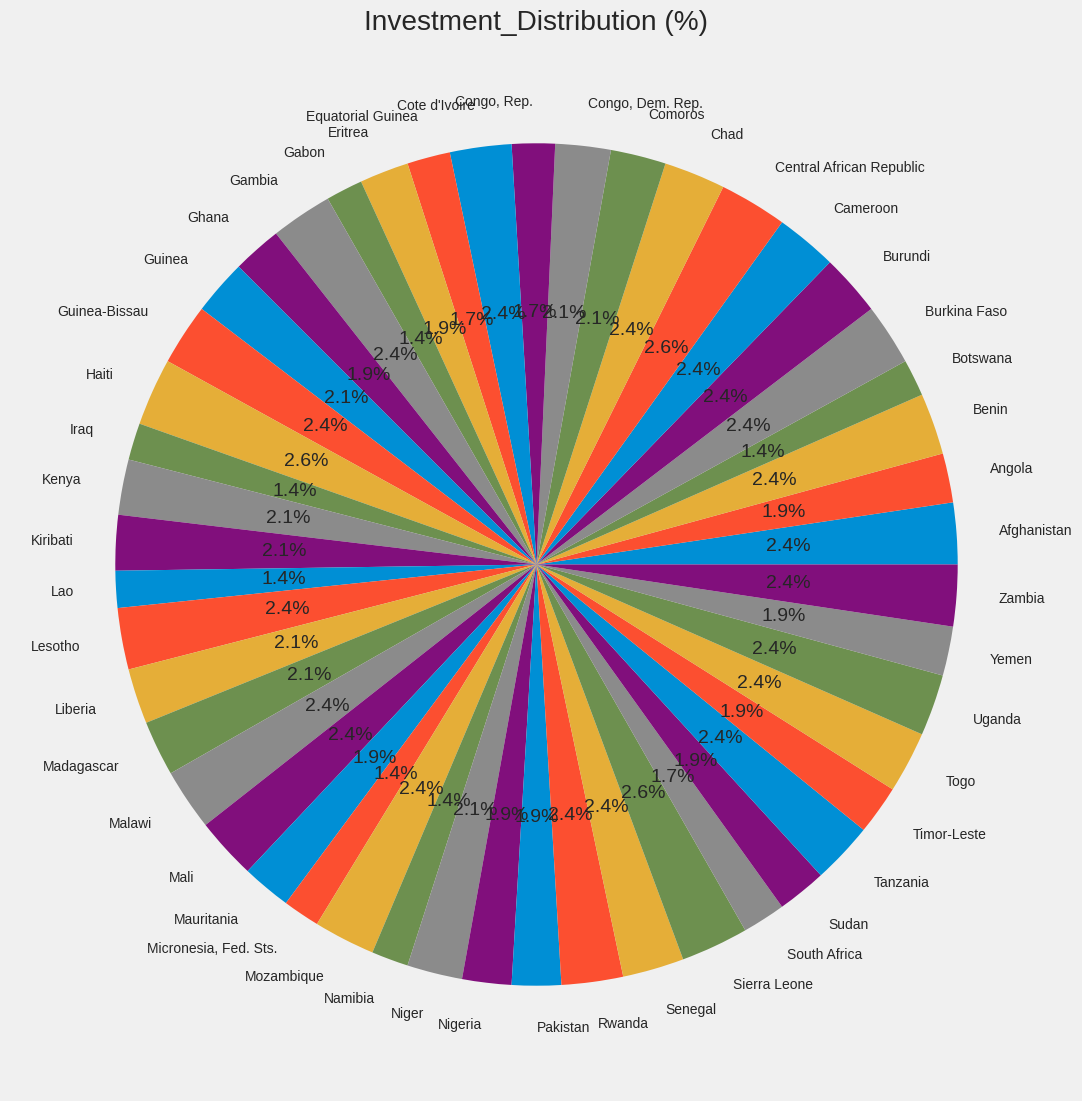

In [ ]:
import matplotlib.pyplot as plt
data=most_needy_countries_dict
labels = list(data.keys())
sizes = list(data.values())

fig, ax = plt.subplots(figsize=(13, 13))
plt.pie(sizes, labels=labels, autopct='%1.1f%%')

plt.title("Investment_Distribution (%)")

plt.show()

The above pie chart shows that if 100 units are being invested, what percentage each country would get.

In [ ]:
import folium
from geopy.geocoders import Nominatim

# Create a geolocator object
geolocator = Nominatim(user_agent='_//Write_ID//__')   #Create id on api and paste here

# Create a world map centered on (0,0)
world_map = folium.Map(location=[0, 0], zoom_start=2)

# List of countries

countries = list(most_needy_countries)

# Loop over the list of countries and add a marker for each country
for country in countries:
    # Use geopy to get the latitude and longitude coordinates for the country
    location = geolocator.geocode(country)
    if location:
        coordinates = [location.latitude, location.longitude]
    else:
        coordinates = [0, 0]

    # Add a marker for the country with a popup showing the country name
    folium.Marker(location=coordinates, popup=country).add_to(world_map)

# Display the map
world_map

In [ ]:
# import requests, json, re, folium
# from bs4 import BeautifulSoup
# import pandas as pd

# # dynamically get the world-country boundaries
# res = requests.get("https://raw.githubusercontent.com/python-visualization/folium/master/examples/data/world-countries.json")
# df = pd.DataFrame(json.loads(res.content.decode()))
# df = df.assign(id=df["features"].apply(pd.Series)["id"],
#          name=df["features"].apply(pd.Series)["properties"].apply(pd.Series)["name"])

# # build a dataframe of country colours scraped from wikipedia
# resp = requests.get("https://en.wikipedia.org/wiki/National_colours",)
# soup = BeautifulSoup(resp.content.decode(), "html.parser")
# colours = []
# for t in soup.find_all("table", class_="wikitable"):
#     cols = t.find_all("th")
#     ok = (len(cols)>5 and cols[0].string.strip()=="Country" and cols[4].string.strip()=="Primary")
#     if ok:
#         for tr in t.find_all("tr"):
#             td = tr.find_all("td")
#             if len(td)>5:
#                 sp = td[4].find_all("span")
#                 c1 = re.sub("background-color:([\w,#,0-9]*).*", r"\1", sp[0]["style"])
#                 c2 = c1 if len(sp)==1 else re.sub("background-color:([\w,#,0-9]*).*", r"\1", sp[1]["style"])
#                 colours.append({"country":td[0].find("a").string,
#                                 "colour1":c1,
#                                 "colour2":c2,

#                                })
# dfc = pd.DataFrame(colours).set_index("country")

# # a list of interesting countries - Singapore is missing!
# countries = most_needy_countries

# # style the overlays with the countries own colors...
# def style_fn(feature):
#     cc = dfc.loc[feature["properties"]["name"]]
#     ss= {'fillColor':f'{cc[0]}', 'color':f'{cc[1]}'}
#     return ss

# # create the base map
# m = folium.Map(location = [1.34, 103.82],
#                zoom_start=6,
#                control_scale=True)

# # overlay desired countries over folium map
# for r in df.loc[df["name"].isin(countries)].to_dict(orient="records"):
#     folium.GeoJson(r["features"], name=r["name"], tooltip=r["name"], style_function=style_fn).add_to(m)

# m